# Data Requirements and Collection

## Importing required packages

In [ ]:
import os # to work with operating system
import numpy as np # numerical linear algebra
import pandas as pd # data manipulation

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
!python -m pip install -Uqqq plotly
import plotly.express as px
from matplotlib.colors import ListedColormap # creating our own color palette
from matplotlib.colors import BoundaryNorm # creating colormap and its intervals

import math # for rounding, ceiling, flooring
plt.style.use('fivethirtyeight')
# plt.style.use('bmh')
# plt.style.use('dark_background')

# some useful stastics
from  scipy.stats import skew, kurtosis, shapiro

# dealing with dates and times
!pip install jdatetime persiantools -qqq
from persiantools.jdatetime import JalaliDate
import time # handling time
import datetime # handling dates
import jdatetime
!pip install jalali_pandas -q
import jalali_pandas

# Import Meteostat library and dependencies
!pip install meteostat -q # free access to historical weather and climate data
from meteostat import Point, Hourly, Daily

# tools for scraping
!pip install --upgrade selenium requests beautifulsoup4 -q
from selenium import webdriver # as wd
import urllib.request
from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
import re
import requests
from bs4 import BeautifulSoup
import csv


# garbage collecting
import gc


# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox # box cox transformation
from statsmodels.graphics.tsaplots import plot_acf # plotting autocorrelation

# some useful preprocessing tools
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# modeling and forecasting
from tensorflow import keras # for using neural networks
from keras.models import Sequential # for using neural networks
from keras.layers import Dense, Dropout, SimpleRNN, LSTM 
from tensorflow.keras import layers # for using neural networks
# from statsmodels.tsa.ar_model import AutoReg # AR model
# from statsmodels.tsa.arima.model import ARIMA # MA, ARMA and ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMA and SARIMAX

from xgboost import XGBRegressor # for using ensemble learning
# from xgboost import plot_importance, plot_tree

from sklearn.naive_bayes import GaussianNB # for using nonparametric learning

# evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error # this one is arguably the most preferred metric

from IPython.core.display import display, HTML # for creating html components such as tables

# mounting google drive into this project
from google.colab import drive
drive.mount("/content/gdrive/")


## PATH AND VARIABLES
MAIN_PATH = "/content/gdrive/MyDrive/Electricity Alborz/"
RAW_DATA_PATH = "/content/gdrive/MyDrive/Electricity Alborz/all.csv"
# NEWLY_ADDED_DATA = "/content/gdrive/MyDrive/Electricity Alborz/updated.csv"
CLEAN_DATA_PATH = "/content/gdrive/MyDrive/Electricity Alborz/cleaned.csv"
TRAIN_PATH = ""
UNIT_CODES = "/content/gdrive/MyDrive/Electricity Alborz/vahed_names.xlsx"
# LOGIN_ADDRESS ='https://app.business-in-a-box.com/account/login'
LOGIN_ADDRESS = 'http://energybill.ir/Account/Login'
ENERGYBILL_USER = "Alborz"
ENERGYBILL_PASS = "87654321"
LAT, LON = (36.2687061, 50.0085666)
# TARGET_PAGE ='https://app.business-in-a-box.com/doc/business-plan-template-D12528'
# TARGET_XML_DOC ='https://templates.biztree.com/svgs/docviewerWebApp.html?v4#12528.xml'
# ONE_INSTANCE_SVG = 'https://templates.biztree.com/svgs/12528_files/page1.svg'
MAIN_SCRAPING_URL = 'http://energybill.ir/Meter/Index/Electrical'
# URL_PAGE = 'http://energybill.ir/Meter{}/Reading/Page{}'.format(vahed,page)
WEATHER_DAILY = "/content/gdrive/MyDrive/Electricity Alborz/weather_daily.csv"
WEATHER_HOURLY = "/content/gdrive/MyDrive/Electricity Alborz/weather_hourly.csv"
HOLIDAYS = "/content/gdrive/MyDrive/Electricity Alborz/holidays.csv"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Obtaining Data

Web scraping is done through ...

In [ ]:
# peep into the first few rows
df = pd.read_csv(RAW_DATA_PATH, nrows=3)

In [ ]:
df.head()

\n                تاریخ  خوانش\n              \
0  \n                        1400/10/06\n        ...   
1  \n                        1400/10/06\n        ...   
2  \n                        1400/10/06\n        ...   

          \n                ساعت خوانش\n              \
0  \n                        09:16 ب.ظ\n         ...   
1  \n                        09:09 ب.ظ\n         ...   
2  \n                        09:01 ب.ظ\n         ...   

   \n\n                میزان مصرف (kwh)\n                \n              \
0                                          4024.7555                      
1                                          4024.5795                      
2                                          4024.3775                      

   \n                    میان باری\n                  \
0                                           2325.687   
1                                           2325.687   
2                                           2325.687   

   \n                    Low Peak\n                  \
0                                          227.7185   
1                                          227.5425   
2                                          227.3405   

   \n                    High Peak\n                  \
0                                            1471.35   
1                                            1471.35   
2                                            1471.35   

   \n                ساعت کل\n              \
0                                    45195   
1                                    45195   
2                                    45195   

            \n                خطا\n              vahed_name  
0  \n\n                \nبی خطا\n            \n          44  
1  \n\n                \nبی خطا\n            \n          44  
2  \n\n                \nبی خطا\n            \n          44

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   
                تاریخ  خوانش
                                    3 non-null      object 
 1   
                ساعت خوانش
                                      3 non-null      object 
 2   

                میزان مصرف (kwh)
                
              3 non-null      float64
 3   
                    میان باری
                                   3 non-null      float64
 4   
                    Low Peak
                                    3 non-null      float64
 5   
                    High Peak
                                   3 non-null      float64
 6   
                ساعت کل
                                         3 non-null      int64  
 7   
                خطا
                   

In [ ]:
len(df.columns)

9

Not all the columns are neeeded!

In [ ]:
selected_cols = df.columns[:]

In [ ]:
df = pd.read_csv(RAW_DATA_PATH, usecols=selected_cols, low_memory=False)

In [ ]:
# getting rid of the extra whitespace wrapping columns' labels
df.columns = df.columns.str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083637 entries, 0 to 4083636
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   تاریخ  خوانش      object 
 1   ساعت خوانش        object 
 2   میزان مصرف (kwh)  float64
 3   میان باری         float64
 4   Low Peak          float64
 5   High Peak         float64
 6   ساعت کل           int64  
 7   خطا               object 
 8   vahed_name        object 
dtypes: float64(4), int64(1), object(4)
memory usage: 280.4+ MB


In [ ]:
df.rename(columns={df.columns[0]:'date'}, inplace=True) # تاریخ
df.rename(columns={df.columns[1]:'time'}, inplace=True) # ساعت
df.rename(columns={df.columns[2]:'consumption'}, inplace=True) # میزان_مصرف
df.rename(columns={df.columns[3]:'standard'}, inplace=True) # میان_باری
df.rename(columns={df.columns[4]:'valley'}, inplace=True) # کم_باری
df.rename(columns={df.columns[5]:'peak'}, inplace=True) # اوج_باری
df.rename(columns={df.columns[6]:'total_hours'}, inplace=True) # ساعت_کل
df.rename(columns={df.columns[7]:'error'}, inplace=True)
df.rename(columns={df.columns[8]:'unit'}, inplace=True) # نام یا شناسه واحد

In [ ]:
df.head(2)

date  \
0  \n                        1400/10/06\n        ...   
1  \n                        1400/10/06\n        ...   

                                                time  consumption  standard  \
0  \n                        09:16 ب.ظ\n         ...    4024.7555  2325.687   
1  \n                        09:09 ب.ظ\n         ...    4024.5795  2325.687   

     valley     peak  total_hours  \
0  227.7185  1471.35        45195   
1  227.5425  1471.35        45195   

                                          error unit  
0  \n\n                \nبی خطا\n            \n   44  
1  \n\n                \nبی خطا\n            \n   44

In [ ]:
df['error'] = df['error'].str.strip(' \n\t')
df['date'] = df['date'].str.strip(' \n\t')
df['time'] = df['time'].str.strip(' \n\t')

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
df

date       time  consumption  standard  valley      peak  \
0        1400/10/06  09:16 ب.ظ    4,024.756 2,325.687 227.719 1,471.350   
1        1400/10/06  09:09 ب.ظ    4,024.579 2,325.687 227.542 1,471.350   
2        1400/10/06  09:01 ب.ظ    4,024.378 2,325.687 227.340 1,471.350   
3        1400/10/06  08:53 ب.ظ    4,024.178 2,325.688 227.144 1,471.345   
4        1400/10/06  08:45 ب.ظ    4,024.008 2,325.688 227.144 1,471.176   
...             ...        ...          ...       ...     ...       ...   
4083632  1400/08/29  01:31 ب.ظ    1,934.830   935.500 139.950   859.380   
4083633  1400/08/29  12:29 ب.ظ    1,934.830   935.500 139.950   859.380   
4083634  1400/08/29  11:27 ق.ظ    1,934.830   935.500 139.950   859.380   
4083635  1400/08/29  10:25 ق.ظ    1,934.830   935.500 139.950   859.380   
4083636  1400/08/29  09:23 ق.ظ    1,934.830   935.500 139.950   859.380   

         total_hours   error unit  
0              45195  بی خطا   44  
1              45195  بی خطا   44  
2              45195  بی خطا   44  
3              45194  بی خطا   44  
4              45194  بی خطا   44  
...              ...     ...  ...  
4083632        54835  بی خطا  116  
4083633        54834  بی خطا  116  
4083634        54833  بی خطا  116  
4083635        54832  بی خطا  116  
4083636        54831  بی خطا  116  

[4083637 rows x 9 columns]

In [ ]:
df.head()

date       time  consumption  standard  valley      peak  \
0  1400/10/06  09:16 ب.ظ    4,024.756 2,325.687 227.719 1,471.350   
1  1400/10/06  09:09 ب.ظ    4,024.579 2,325.687 227.542 1,471.350   
2  1400/10/06  09:01 ب.ظ    4,024.378 2,325.687 227.340 1,471.350   
3  1400/10/06  08:53 ب.ظ    4,024.178 2,325.688 227.144 1,471.345   
4  1400/10/06  08:45 ب.ظ    4,024.008 2,325.688 227.144 1,471.176   

   total_hours   error unit  
0        45195  بی خطا   44  
1        45195  بی خطا   44  
2        45195  بی خطا   44  
3        45194  بی خطا   44  
4        45194  بی خطا   44

## Handling Time

In [ ]:
df['time'] = df['time'].str.replace('ب.ظ', 'PM')
df['time'] = df['time'].str.replace('ق.ظ', 'AM')

In [ ]:
# changing from 12-hour clock(AM/PM) to 24-hour clock
df['time'] = pd.to_datetime(df['time'], format='%I:%M %p').dt.strftime('%H:%M')
df.time

0          21:16
1          21:09
2          21:01
3          20:53
4          20:45
           ...  
4083632    13:31
4083633    12:29
4083634    11:27
4083635    10:25
4083636    09:23
Name: time, Length: 4083637, dtype: object

### Combining `date` and `time` to build `datetime`

In [ ]:
# dates = df.date.str.split(pat="/", expand=True)
# jdates.columns = ["year", "month", "day"]
# jdatesj

In [ ]:
# jtimes = df.time.str.split(pat=":", expand=True)
# jtimes.columns = ["hour", "minute"]
# jtimes

In [ ]:
# This is way better and efficient
jdatetimes = df.date + ' ' + df.time

In [ ]:
jdatetimes

0          1400/10/06 21:16
1          1400/10/06 21:09
2          1400/10/06 21:01
3          1400/10/06 20:53
4          1400/10/06 20:45
                 ...       
4083632    1400/08/29 13:31
4083633    1400/08/29 12:29
4083634    1400/08/29 11:27
4083635    1400/08/29 10:25
4083636    1400/08/29 09:23
Length: 4083637, dtype: object

**Note**. `strftime` and `strptime` are extremely useful with this regard. Check the [docs](https://www.nbshare.io/notebook/510557327/Strftime-and-Strptime-In-Python/).

In [ ]:
# The following will take ~2 mins to run

df['jdatetime'] = jdatetimes.apply(lambda x: 
                                  jdatetime.datetime.strptime(x, 
                                                    '%Y/%m/%d %H:%M'))

In [ ]:
df["datetime"] = df.jdatetime.jalali.to_gregorian()

In [ ]:
# df.jdatetime.jalali

In [ ]:
df[["datetime", "time"]]

datetime   time
0       2021-12-27 21:16:00  21:16
1       2021-12-27 21:09:00  21:09
2       2021-12-27 21:01:00  21:01
3       2021-12-27 20:53:00  20:53
4       2021-12-27 20:45:00  20:45
...                     ...    ...
4083632 2021-11-20 13:31:00  13:31
4083633 2021-11-20 12:29:00  12:29
4083634 2021-11-20 11:27:00  11:27
4083635 2021-11-20 10:25:00  10:25
4083636 2021-11-20 09:23:00  09:23

[4083637 rows x 2 columns]

#### The problem of timezone
This doesn't work on converting time to its equivalent UTC (Coordinated Universal Time or UTC is the primary time standard by which the world regulates clocks and time. It is within about 1 second of mean solar time at 0° longitude such as UT1 and is not adjusted for daylight saving time. It is effectively a successor to Greenwich Mean Time). UTC is the default time-zone recognized by Python. As we know Tehran Time is 3 hours and 30 minutes (sometimes 4:30) ahead of Coordinated Universal Time. So taking this into account, we're going to adopt [this](https://stackoverflow.com/questions/28954093/how-to-add-subtract-time-hours-minutes-etc-from-a-pandas-dataframe-index-wh) solution, which will convert the time to UTC.

So when do we use UTC+3:30 and when to use UTC+4:30? According to [this](https://fa.wikipedia.org/wiki/%D8%B3%D8%A7%D8%B9%D8%AA_%D8%AA%D8%A7%D8%A8%D8%B3%D8%AA%D8%A7%D9%86%DB%8C), the following years have this condition:
```Python
[1371, 1372, ..., 1384, 1388, 1389, ..., 1401]
```

In [ ]:
 datetime.MINYEAR, datetime.MAXYEAR, 
 datetime.datetime.now(), datetime.datetime.utcnow()

(datetime.datetime(2022, 5, 23, 9, 44, 23, 294790),
 datetime.datetime(2022, 5, 23, 9, 44, 23, 294796))

In [ ]:
EXCEPTIONAL_YEARS = list(range(1371, 1385)) + list(range(1387, 1402))

In [ ]:
%%time
# This will do the trick and push our datetime back to its UTC format
# takes ~2mins to run for 4 million rows
df["timedelta"] = pd.Timedelta(hours=3, minutes=30)

for year in range(1395, 1402):
    df.loc[(df["jdatetime"] >= jdatetime.datetime(year, 1, 2, 0, 0))&\
           (df["jdatetime"] < jdatetime.datetime(year, 6, 31, 0, 0)),
           ["timedelta"]] = pd.Timedelta(hours=4, minutes=30)

df.datetime -= df.timedelta

Alternative method:

In [ ]:
%%time
df["saal"] = df.jdatetime.jalali.year
df["monthday"] = 100 * df.jdatetime.jalali.month + df.jdatetime.jalali.day

df["timedelta"] = np.where((df.saal.isin(EXCEPTIONAL_YEARS))&\
                            ((df.monthday > 101)&(df.monthday < 631)),
                           pd.Timedelta(hours=4, minutes=30),
                           pd.Timedelta(hours=3, minutes=30))

df.datetime -= df.timedelta

# to sanity check a random number of items run the below
# df.iloc[np.random.randint(1,4_000_000, size=(10,)),:]["jdatetime", 
#                                                       "timedelta"].head(10)

df.drop(columns=["date", "time", "timedelta", "saal", "monthday"], 
        inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083637 entries, 0 to 4083636
Data columns (total 12 columns):
 #   Column       Dtype          
---  ------       -----          
 0   date         object         
 1   time         object         
 2   consumption  float64        
 3   standard     float64        
 4   valley       float64        
 5   peak         float64        
 6   total_hours  int64          
 7   error        object         
 8   unit         object         
 9   jdatetime    object         
 10  datetime     datetime64[ns] 
 11  timedelta    timedelta64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(5), timedelta64[ns](1)
memory usage: 373.9+ MB


## Relabeling column `error`



In [ ]:
df.error.unique()

array(['بی خطا',
       'ساعت یا تاریخ در کنتور اشتباه است\n            \n\n                \nباتری پشتیبان را تعویض کنید'],
      dtype=object)

In [ ]:
df.error = df.error != 'بی خطا'
df.error

0          False
1          False
2          False
3          False
4          False
           ...  
4083632    False
4083633    False
4083634    False
4083635    False
4083636    False
Name: error, Length: 4083637, dtype: bool

In [ ]:
df.error.value_counts()

False    4082781
True         856
Name: error, dtype: int64

<font color="green">Pssst! All the following yabbing will probably be solved with a `low_memory=False`</font>

## An Important Error With Units

Here there is an issue with some `vahed_name` values, where there's unnecessarily long strings included!

<font color="orange">Beware of some type issues that happened in the `unit` column, for example both `11` and `"11"` appeared in this column. Also I have no fucking idea why Python turned `"11-1"` into `"2021-11-01 00:00:00"`, so I fix problems of this kind too.

In [ ]:
df.unit.nunique()

190

In [ ]:
df[df.unit == '61600235'].head(3)

date   time  consumption  standard  valley    peak  total_hours  \
427721  1400/10/07  19:42      955.610   486.690 301.370 167.550        55752   
427722  1400/10/07  18:40      955.590   486.700 301.350 167.540        55751   
427723  1400/10/07  17:38      955.560   486.690 301.350 167.520        55750   

        error      unit            jdatetime            datetime  
427721  False  61600235  1400-10-07 19:42:00 2021-12-28 19:42:00  
427722  False  61600235  1400-10-07 18:40:00 2021-12-28 18:40:00  
427723  False  61600235  1400-10-07 17:38:00 2021-12-28 17:38:00

In [ ]:
df[df.unit == '115'].head(3)

date   time  consumption  standard  valley    peak  \
3595967  1401/02/26  17:56    1,035.060   526.430 327.870 180.760   
3595968  1401/02/26  16:54    1,035.040   526.430 327.870 180.740   
3595969  1401/02/26  15:53    1,035.010   526.430 327.870 180.710   

         total_hours  error unit            jdatetime            datetime  
3595967        59085  False  115  1401-02-26 17:56:00 2022-05-16 17:56:00  
3595968        59084  False  115  1401-02-26 16:54:00 2022-05-16 16:54:00  
3595969        59083  False  115  1401-02-26 15:53:00 2022-05-16 15:53:00

The problem with `unit` 115, where in some rows its equivalent serial number (61600235) is put.

In [ ]:
df.shape

(4083637, 11)

In [ ]:
df.unit.replace({'61600235' : '115'}, inplace=True)

In [ ]:
df["unit"].replace({"2021-11-02 00:00:00": "11-B", "2021-11-01 00:00:00": "11-A"}, inplace=True)

All in all, we should end up with exactly 189 units.

In [ ]:
vahed_true_names = pd.read_excel(UNIT_CODES)

vahed_true_names.columns = ["unit", "original"]
vahed_true_names.original = vahed_true_names.original.astype(int)
vahed_true_names

unit  original
0           39.000      5513
1           21.000      5518
2           31.000      5523
3           40.000      5557
4           18.000      5558
..             ...       ...
185 61,600,291.000      5584
186 61,600,292.000      5585
187  آقای جواهری 1     10647
188  آقای جواهری 2     10648
189  آقای جواهری 3     10649

[190 rows x 2 columns]

## Saving Cleaned Data

In [ ]:
df[["datetime", 
    "consumption",
    "standard",
    "valley", 
    "peak", 
    "total_hours",
    "error",
    "unit",
    "jdatetime"]].to_csv("/content/gdrive/MyDrive/Electricity Alborz/cleaned.csv",
                          index=False)

In [ ]:
del df
gc.collect()

1296

# Data Understanding

In [ ]:
# %reset -f

In [ ]:
%%time
try:
  del df
except:
  pass
gc.collect()
df = pd.read_csv(CLEAN_DATA_PATH, low_memory=False)

CPU times: user 8.54 s, sys: 780 ms, total: 9.32 s
Wall time: 9.86 s


In [ ]:
np.unique(df.unit.unique(), return_counts=True)[1].sum()

189

In [ ]:
gc.collect()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083637 entries, 0 to 4083636
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   consumption  float64
 2   standard     float64
 3   valley       float64
 4   peak         float64
 5   total_hours  int64  
 6   error        bool   
 7   unit         object 
 8   jdatetime    object 
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 253.1+ MB


As you can see, although we defined `datetime` column to be instances of `datetime` type when we were building this dataset, the `pd.read_csv()` didn't catch that and instead read it as mere `object` (which is the usual string format in `pandas`). We can set `parse_dates=True` when reading a `DataFrame` containing `datetime` values to ensure that dates are actually parsed as dates and not as strings.

In [ ]:
# pd.to_datetime(df.jdatetime)  # This gives us an error (why?)

In [ ]:
# Let's make datetime object for the datetime column
df.datetime = pd.to_datetime(df.datetime)

# # using jalali_pandas might result in a crash
# df.jdatetime = ...

### Missing Values

In [ ]:
df.isnull().sum() / df.shape[0]

datetime       0.0
consumption    0.0
standard       0.0
valley         0.0
peak           0.0
total_hours    0.0
error          0.0
unit           0.0
jdatetime      0.0
dtype: float64

### Handling Categorical Variables

In [ ]:
# before factorizing
df.unit.unique()

array(['44', '79', 'آقای جواهری 1', 'آقای جواهری 2', 'آقای جواهری 3',
       '133', '39', '41', '235', '105', '61600290', '21', '49', '215',
       '225', '206', '31', '54', '115', '57', '68', '125', '130', '132',
       '131', '111', '110', '109', '108', '107', '106-1', '106',
       '61600193', 'Imax 1', 'I Max 2', 'I Max 3', '61600197', '61600198',
       '61600199', 'مشاعات', '161600232', '11-A', '11-B', '61600236',
       '61600237', '61600238', '61600239', '40', '18', '17', '16', '14',
       '15', '13', '12', '11', '104', '103', '102', '61600054',
       '61600055', '61600056', '61600057', '61600058', '61600059', '234',
       '233', 'سرویس بهداشتی', '61600174', '61600175', '61600176',
       '61600177', '61600178', '61600179', '61600291', '61600292', '226',
       '227', '228', '201', '202', '203', '204', '20', '19', '42', '47',
       '46', '45', '43', '48', '49-1', '49-2', '38', '37', '36', '35',
       '34', '33', '32', '216', '217', '218', '219', '220', '221', '222',
      

In [ ]:
vahed_true_names = pd.read_excel(UNIT_CODES,)
vahed_true_names.columns = ["unit", "code"]
vahed_true_names.code = vahed_true_names.code.astype(int)
mapping_to_code = {
    # shits can be dropped here
}
for i in range(vahed_true_names.shape[0]):
    mapping_to_code[vahed_true_names.iloc[i]["unit"]] = \
    vahed_true_names.iloc[i]["code"]

In [ ]:
better_mapping = mapping_to_code.copy()
for i in mapping_to_code:
  new_form = None
  try:
    new_form = float(i)
  except:
    continue
  new_form = str(int(new_form))
  better_mapping[new_form] = mapping_to_code[i]

In [ ]:
# or using unit's code we used when we were scraping data from the web
# takes about 
df["code"] = df.unit.apply(lambda x:better_mapping[x])

In [ ]:
df.unit, original_units = pd.factorize(df.unit)
original_units # uncomment only if you used pd.factorize

Index(['44', '79', 'آقای جواهری 1', 'آقای جواهری 2', 'آقای جواهری 3', '133',
       '39', '41', '235', '105',
       ...
       '126', '124', '123', '122', '121', '120', '119', '118', '117', '116'],
      dtype='object', length=189)

In [ ]:
# after factorizing
units_n_codes = df[~df[["unit", "code"]].duplicated()][["unit", "code"]]
df.unit.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
units_n_codes.set_index("unit", inplace=True)

## Sorting via `datetime`

(and making it our index)

In [ ]:
df.set_index("datetime", inplace=True)

We might also wanna sort instances by `unit` for a reason that'll come clear later on:

In [ ]:
# pd.options.display.float_format = '{:,.4f}'.format
# df.sort_index(inplace=True, ascending=True)
# df.sort_values(by=["unit"], inplace=True, ascending=[True])
# we can now use the following, since index is also considered by "by"
df.sort_values(by=["unit", "datetime"], ascending=[True, True], inplace=True)
df

consumption  standard  valley    peak  total_hours  \
datetime                                                                  
2018-02-06 19:22:00         0.00       0.0    0.00    0.00        11113   
2018-02-07 07:00:00         0.00       0.0    0.00    0.00        11125   
2018-02-07 11:29:00         0.00       0.0    0.00    0.00        11129   
2018-02-07 22:01:00         0.00       0.0    0.00    0.00        11140   
2018-02-07 22:47:00         0.00       0.0    0.00    0.00        11140   
...                          ...       ...     ...     ...          ...   
2022-05-16 13:22:00      1934.83     935.5  139.95  859.38        59082   
2022-05-16 14:23:00      1934.83     935.5  139.95  859.38        59083   
2022-05-16 15:25:00      1934.83     935.5  139.95  859.38        59084   
2022-05-16 16:27:00      1934.83     935.5  139.95  859.38        59085   
2022-05-16 17:28:00      1934.83     935.5  139.95  859.38        59086   

                     error  unit            jdatetime   code  
datetime                                                      
2018-02-06 19:22:00  False     0  1396-11-17 19:22:00  10277  
2018-02-07 07:00:00  False     0  1396-11-18 07:00:00  10277  
2018-02-07 11:29:00  False     0  1396-11-18 11:29:00  10277  
2018-02-07 22:01:00  False     0  1396-11-18 22:01:00  10277  
2018-02-07 22:47:00  False     0  1396-11-18 22:47:00  10277  
...                    ...   ...                  ...    ...  
2022-05-16 13:22:00  False   188  1401-02-26 13:22:00   5698  
2022-05-16 14:23:00  False   188  1401-02-26 14:23:00   5698  
2022-05-16 15:25:00  False   188  1401-02-26 15:25:00   5698  
2022-05-16 16:27:00  False   188  1401-02-26 16:27:00   5698  
2022-05-16 17:28:00  False   188  1401-02-26 17:28:00   5698  

[4083637 rows x 9 columns]

## Descriptive Statistics

In [ ]:
## proper formatting pandas
pd.options.display.float_format = '{:,.3f}'.format
df.describe()

consumption       standard        valley          peak   total_hours  \
count 4,083,637.000  4,083,637.000 4,083,637.000 4,083,637.000 4,083,637.000   
mean    109,087.303   -139,796.617   124,057.142   124,826.779    44,178.730   
std     467,853.635    593,587.593   500,380.542   501,327.367     9,367.999   
min           0.000 -4,294,967.280         0.000         0.000     4,507.000   
25%          10.737          0.160         1.044         1.858    36,931.000   
50%         907.676        308.329        87.668       249.335    44,819.000   
75%       2,535.854        991.900       451.370     1,044.780    52,044.000   
max   2,147,483.640      9,926.480 2,147,483.640 2,147,483.640    59,444.000   

               unit          code  
count 4,083,637.000 4,083,637.000  
mean         89.018     5,812.026  
std          51.567       979.117  
min           0.000     5,511.000  
25%          49.000     5,570.000  
50%          87.000     5,599.000  
75%         129.000     5,649.000  
max         188.000    10,649.000

In [ ]:
df.unit.value_counts().reset_index()

index    unit
0       90  117072
1        0  114206
2       86  112913
3       85  107105
4       89  103110
..     ...     ...
184      2   15483
185    153   15482
186      3   15468
187      4   15318
188     38   15254

[189 rows x 2 columns]

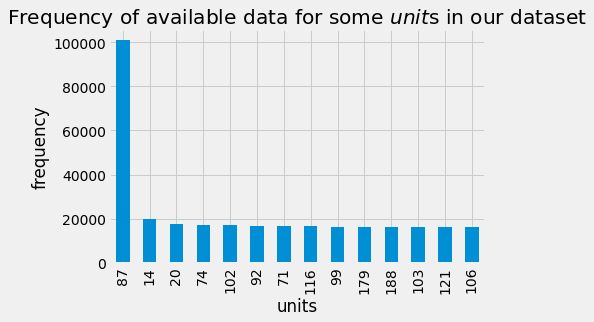

In [ ]:
np.random.seed(42)
df[df.unit.isin(np.random.randint(0, 189, size=(15,)))]["unit"].\
value_counts().plot(kind="bar", title="Frequency of available data for \
some\
 $unit$s in our dataset",
                    xlabel="units", ylabel="frequency");

Records are relatively imbalanced (as high as ~1:10 between some units) and irregularly distributed over `unit`'s. This might introduce scarcity over some classes issues.

In [ ]:
type(df.unit.value_counts())

pandas.core.series.Series

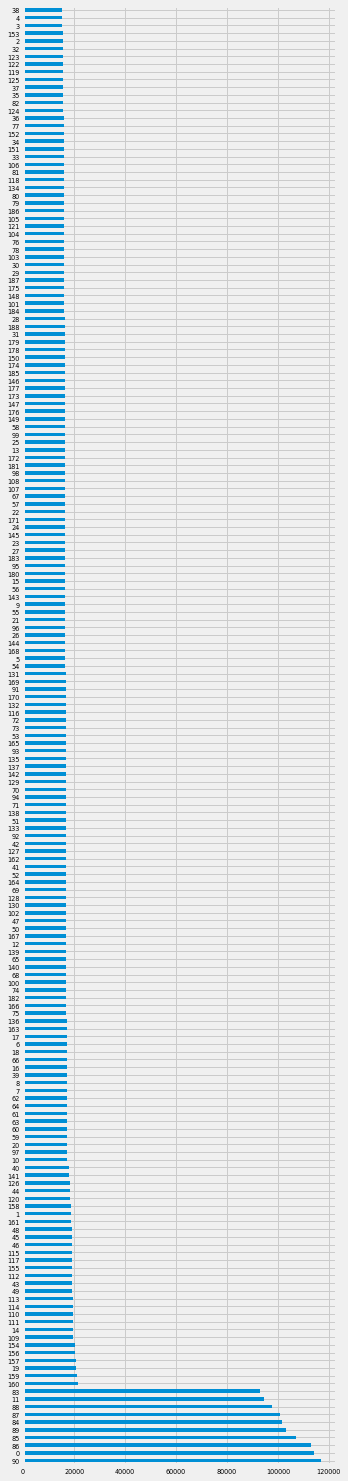

In [ ]:
df.unit.value_counts().plot(kind="barh", yticks=None,
                            figsize=(5, 25), fontsize=6.5,
                            width=0.45);

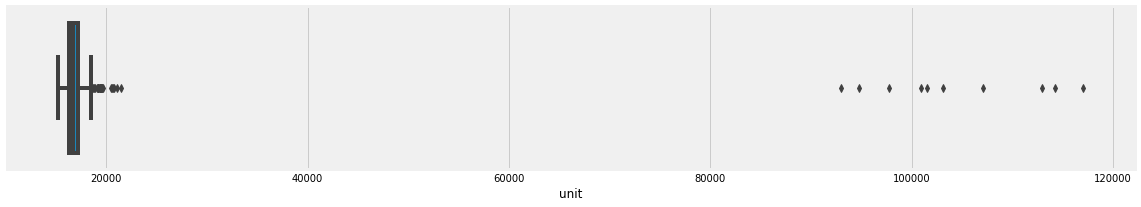

In [ ]:
plt.figure(figsize=(18,3))
sns.boxplot(x=df.unit.value_counts(), orient="h");

In [ ]:
df.shape

(4083637, 9)

In [ ]:
df.unit.value_counts()

90     117072
0      114206
86     112913
85     107105
89     103110
        ...  
2       15483
153     15482
3       15468
4       15318
38      15254
Name: unit, Length: 189, dtype: int64

Taking these major units (this is especially useful for scraping data form energybill.ir):

In [ ]:
major_units = df.unit.value_counts().index[(df.unit.value_counts() > 80000)].tolist()

In [ ]:
major_units

[90, 0, 86, 85, 89, 84, 87, 88, 11, 83]

In [ ]:
original_units[90]

'48'

In [ ]:
vahed_true_names.loc[vahed_true_names.unit.isin([48]), 
                     "code"]

40    5600
Name: code, dtype: int64

In [ ]:
df.unit.nunique()

189

### Checking Negative Values

In [ ]:
df[df["consumption"]<0]

Empty DataFrame
Columns: [consumption, standard, valley, peak, total_hours, error, unit, jdatetime, code]
Index: []

In [ ]:
df[df["peak"]<0]

Empty DataFrame
Columns: [consumption, standard, valley, peak, total_hours, error, unit, jdatetime, code]
Index: []

In [ ]:
df[df["valley"]<0]

Empty DataFrame
Columns: [consumption, standard, valley, peak, total_hours, error, unit, jdatetime, code]
Index: []

In [ ]:
df[(df["standard"]<0)].sort_values(by='standard', ascending=False)

consumption       standard        valley          peak  \
datetime                                                                      
2019-04-07 08:49:00        0.010        -10.730         0.002        10.737   
2019-09-22 14:35:00        0.010        -10.730         0.002        10.737   
2019-09-22 16:37:00        0.010        -10.730         0.002        10.737   
2019-09-22 17:39:00        0.010        -10.730         0.002        10.737   
2019-09-22 18:41:00        0.010        -10.730         0.002        10.737   
...                          ...            ...           ...           ...   
2020-11-09 08:58:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2020-11-09 10:01:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2020-11-09 11:03:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2020-11-09 12:05:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2020-08-04 03:22:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   

                     total_hours  error  unit            jdatetime  code  
datetime                                                                  
2019-04-07 08:49:00        32166  False    16  1398-01-18 08:49:00  5523  
2019-09-22 14:35:00        36205  False    16  1398-06-31 14:35:00  5523  
2019-09-22 16:37:00        36207  False    16  1398-06-31 16:37:00  5523  
2019-09-22 17:39:00        36208  False    16  1398-06-31 17:39:00  5523  
2019-09-22 18:41:00        36209  False    16  1398-06-31 18:41:00  5523  
...                          ...    ...   ...                  ...   ...  
2020-11-09 08:58:00        46155  False   126  1399-08-19 08:58:00  5636  
2020-11-09 10:01:00        46157  False   126  1399-08-19 10:01:00  5636  
2020-11-09 11:03:00        46158  False   126  1399-08-19 11:03:00  5636  
2020-11-09 12:05:00        46159  False   126  1399-08-19 12:05:00  5636  
2020-08-04 03:22:00        43821  False   126  1399-05-14 03:22:00  5636  

[253535 rows x 9 columns]

Not good! For how many units did this disaster happen?

In [ ]:
df[(df["standard"]<0)].sort_values(by='standard', ascending=False).unit.nunique()

44

### A Few Noteworthy Issues

The following code reveals to us that some data have unusual entries!

In [ ]:
df[(df.standard == 0) & (df.valley == 0 ) \
   & (df.peak == 0) & (df.consumption == 0)]

consumption  standard  valley  peak  total_hours  error  \
datetime                                                                       
2018-02-06 19:22:00        0.000     0.000   0.000 0.000        11113  False   
2018-02-07 07:00:00        0.000     0.000   0.000 0.000        11125  False   
2018-02-07 11:29:00        0.000     0.000   0.000 0.000        11129  False   
2018-02-07 22:01:00        0.000     0.000   0.000 0.000        11140  False   
2018-02-07 22:47:00        0.000     0.000   0.000 0.000        11140  False   
...                          ...       ...     ...   ...          ...    ...   
2019-06-25 10:18:00        0.000     0.000   0.000 0.000        33930  False   
2019-06-25 11:14:00        0.000     0.000   0.000 0.000        33931  False   
2019-06-25 12:08:00        0.000     0.000   0.000 0.000        33932  False   
2019-06-25 14:00:00        0.000     0.000   0.000 0.000        33934  False   
2019-06-25 14:55:00        0.000     0.000   0.000 0.000        33934  False   

                     unit            jdatetime   code  
datetime                                               
2018-02-06 19:22:00     0  1396-11-17 19:22:00  10277  
2018-02-07 07:00:00     0  1396-11-18 07:00:00  10277  
2018-02-07 11:29:00     0  1396-11-18 11:29:00  10277  
2018-02-07 22:01:00     0  1396-11-18 22:01:00  10277  
2018-02-07 22:47:00     0  1396-11-18 22:47:00  10277  
...                   ...                  ...    ...  
2019-06-25 10:18:00   161  1398-04-04 10:18:00   5671  
2019-06-25 11:14:00   161  1398-04-04 11:14:00   5671  
2019-06-25 12:08:00   161  1398-04-04 12:08:00   5671  
2019-06-25 14:00:00   161  1398-04-04 14:00:00   5671  
2019-06-25 14:55:00   161  1398-04-04 14:55:00   5671  

[569518 rows x 9 columns]

In [ ]:
# the following shows while the consumption of a row was zero, other 
# features were not!
df[(df.consumption == 0)&(~((df.standard == 0)&(df.valley == 0)&\
                            (df.peak == 0)))]

consumption       standard        valley          peak  \
datetime                                                                      
2019-01-22 10:45:00        0.000 -2,147,483.640         0.000 2,147,483.640   
2019-01-22 13:52:00        0.000 -2,147,483.640         0.000 2,147,483.640   
2019-01-22 18:53:00        0.000 -2,147,483.640         0.000 2,147,483.640   
2019-01-23 11:12:00        0.000 -2,147,483.640         0.000 2,147,483.640   
2019-01-28 15:50:00        0.000 -2,147,483.640         0.000 2,147,483.640   
...                          ...            ...           ...           ...   
2021-12-19 11:04:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2021-12-19 12:06:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2021-12-19 13:08:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2021-12-19 14:10:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   
2021-12-19 15:12:00        0.000 -4,294,967.280 2,147,483.640 2,147,483.640   

                     total_hours  error  unit            jdatetime  code  
datetime                                                                  
2019-01-22 10:45:00        30389  False   118  1397-11-02 10:45:00  5628  
2019-01-22 13:52:00        30392  False   118  1397-11-02 13:52:00  5628  
2019-01-22 18:53:00        30397  False   118  1397-11-02 18:53:00  5628  
2019-01-23 11:12:00        30414  False   118  1397-11-03 11:12:00  5628  
2019-01-28 15:50:00        30538  False   118  1397-11-08 15:50:00  5628  
...                          ...    ...   ...                  ...   ...  
2021-12-19 11:04:00        55878  False   126  1400-09-28 11:04:00  5636  
2021-12-19 12:06:00        55879  False   126  1400-09-28 12:06:00  5636  
2021-12-19 13:08:00        55880  False   126  1400-09-28 13:08:00  5636  
2021-12-19 14:10:00        55881  False   126  1400-09-28 14:10:00  5636  
2021-12-19 15:12:00        55882  False   126  1400-09-28 15:12:00  5636  

[16709 rows x 9 columns]

Checking cumulative nature of our variables for a specific `unit`:

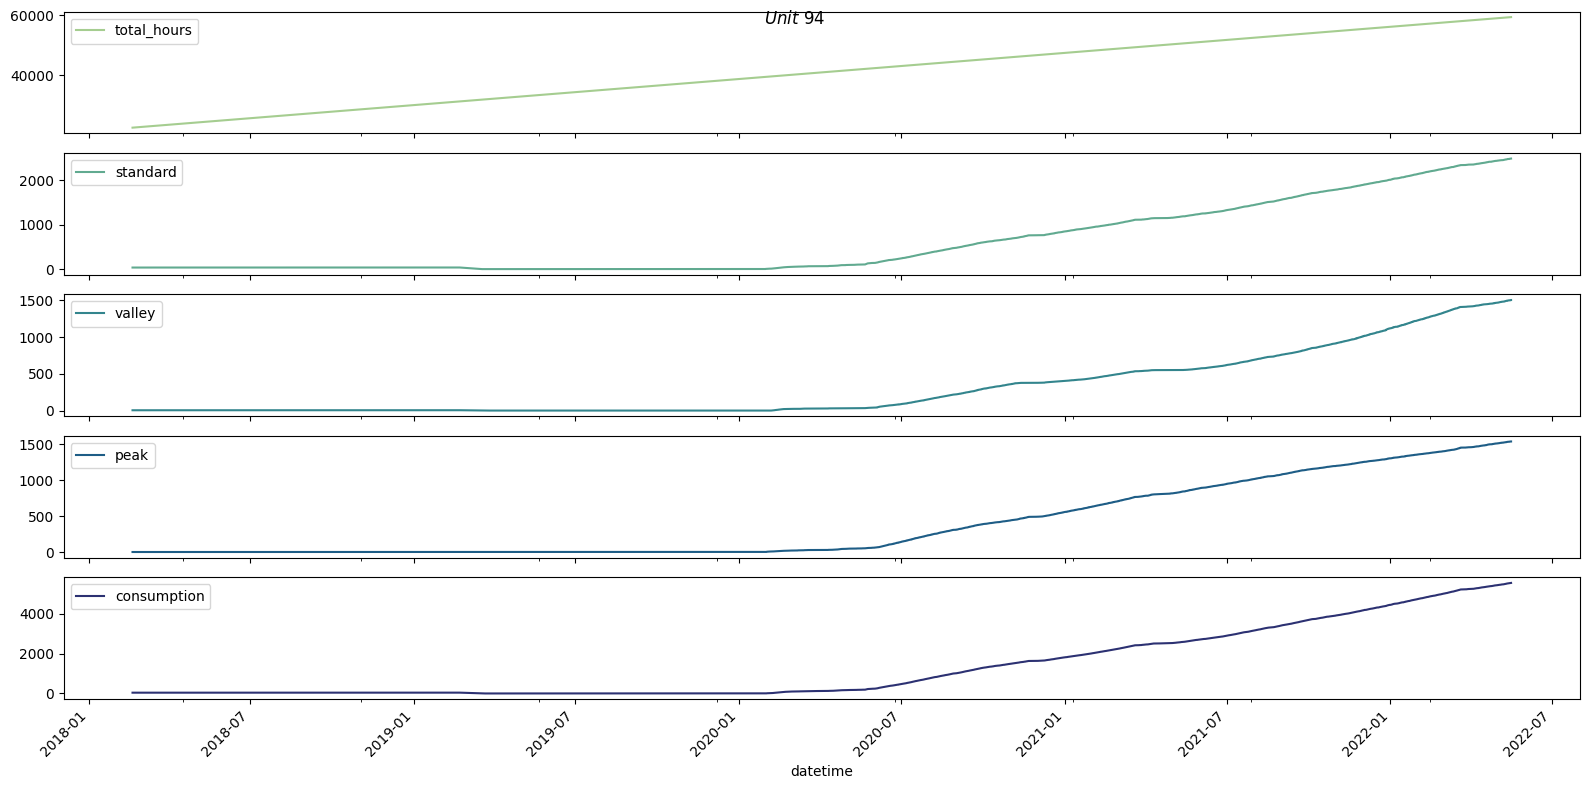

In [ ]:
unit = np.random.choice(np.arange(189))
plt.style.use('default')
date_mask = df.index != '0'
# date_mask = (df.index <= '2019-06-01') & (df.index >= '2019-02-01')
unit_mask = df.unit == unit
mask = unit_mask \
& date_mask
df[mask][['total_hours', 
        'standard', 
        'valley',
        'peak', 
        'consumption']].plot(subplots=True, 
                            title="$Unit$ " + str(unit),
                            legend=True,
                            figsize=(16, 8), 
                            colormap="crest",
                            rot=45);
plt.tight_layout();

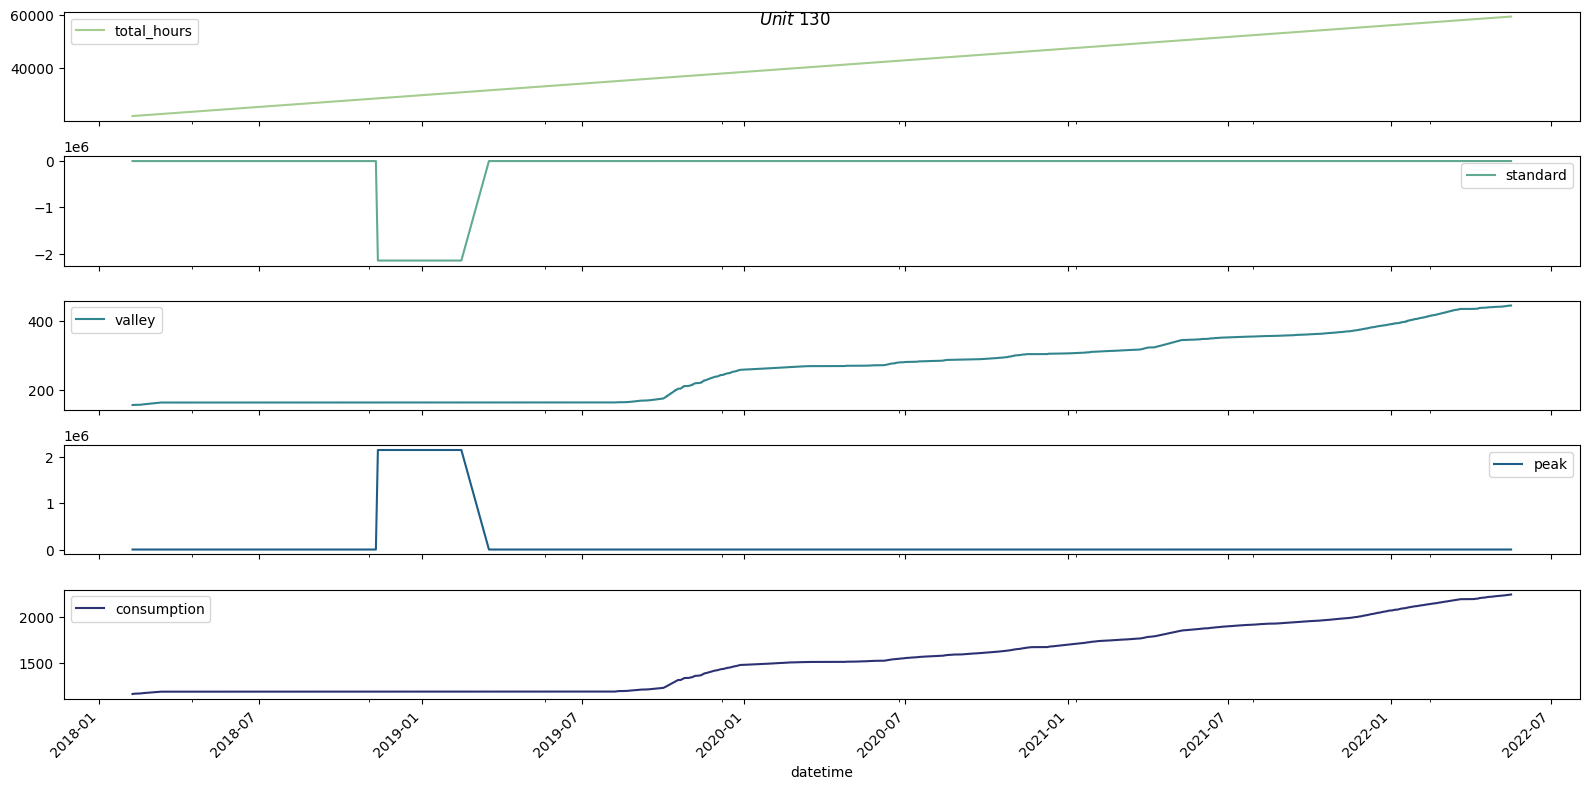

In [ ]:
unit = np.random.choice(np.arange(189))
date_mask = df.index != '0'
# date_mask = (df.index <= '2019-06-01') & (df.index >= '2019-02-01')
unit_mask = df.unit == unit
mask = unit_mask \
& date_mask
df[mask][['total_hours', 
        'standard', 
        'valley',
        'peak', 
        'consumption']].plot(subplots=True, 
                            title="$Unit$ " + str(unit),
                            legend=True,
                            figsize=(16, 8), 
                            colormap="crest",
                            rot=45);
plt.tight_layout();

#### A few inspection into the high frequent units

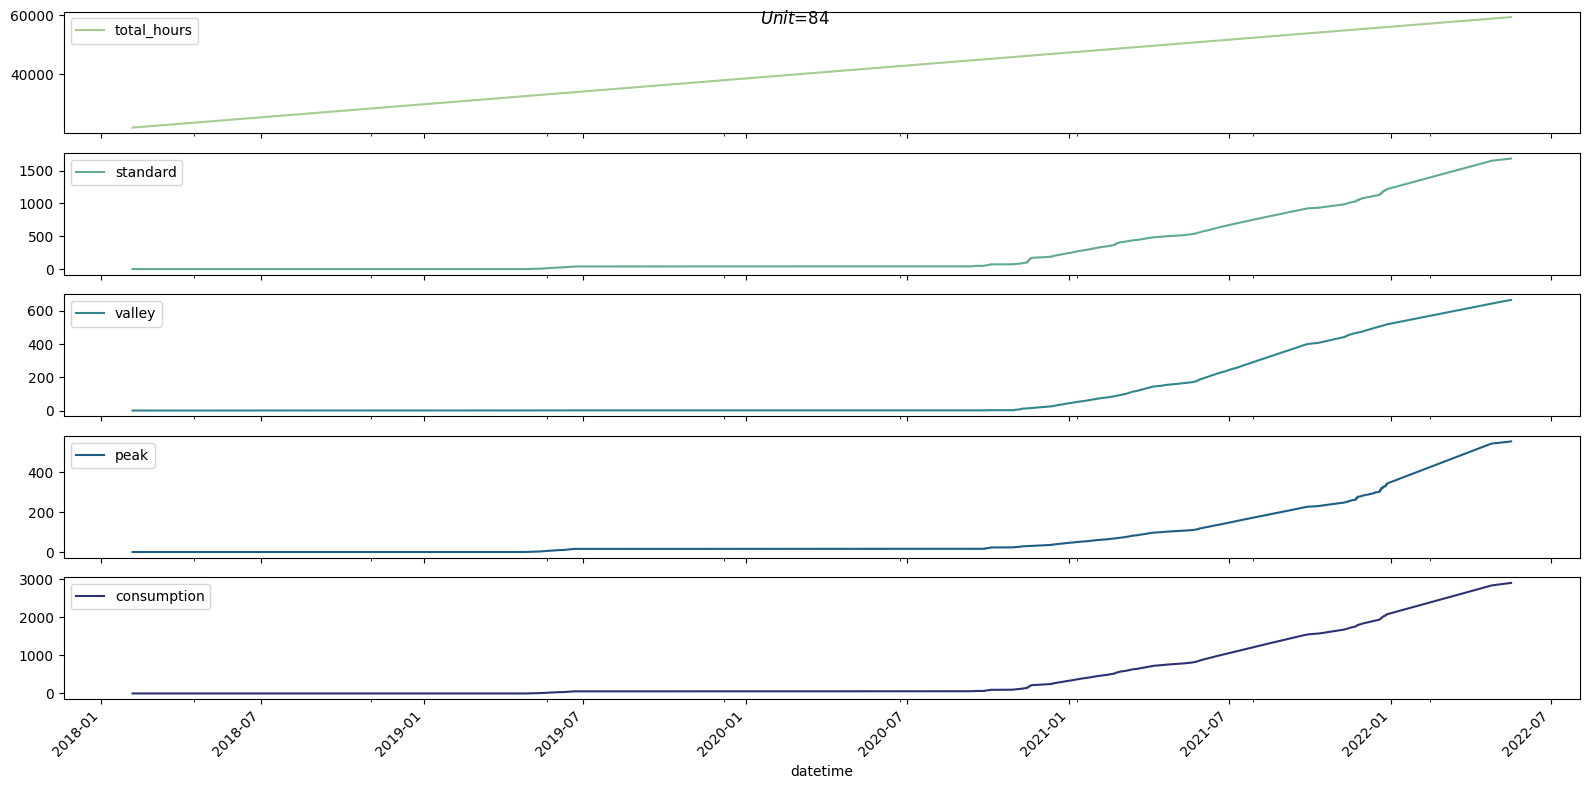

In [ ]:
some_unit = np.random.choice(major_units)

# date_mask = (df.index <= '2019-06-01') & (df.index >= '2019-02-01')

date_mask = True
unit_mask = df.unit == some_unit
mask = unit_mask \
& date_mask
df[mask][['total_hours', 
        'standard', 
        'valley', 
        'peak', 
        'consumption']].plot(subplots=True, 
                            figsize=(16, 8), 
                            title=
                            "$Unit$={}".format(some_unit),
                            colormap = 'crest',
                            rot=45);
plt.tight_layout();


## Taking Differences Into Consideration

In [ ]:
df.head(1)

consumption  standard  valley  peak  total_hours  error  \
datetime                                                                       
2018-02-06 19:22:00        0.000     0.000   0.000 0.000        11113  False   

                     unit            jdatetime   code  
datetime                                               
2018-02-06 19:22:00     0  1396-11-17 19:22:00  10277

### For Loop

We followed two approaches, one using `.groupby()` (then `.diff()`) and the other is separately (by `unit`) calculating diffs via a `for` loop.

Let's start with the latter:

In [ ]:
## Wrapping it all together
try:
  df.set_index("datetime", inplace=True)
except:
  pass  

dfs = {}

for i in df.unit.unique():

    dfs[f"df_{i}"] = df[df.unit == i][["consumption", "unit"]].copy()
    
    dfs[f"df_{i}"] = dfs[f"df_{i}"].sort_values(by="datetime")

    # dfs[f"df_{i}"]["lag_1"] = dfs[f"df_{i}"][
    #                                          "consumption"
    #                                          ].diff().fillna(0)
    # or
    dfs[f"df_{i}"]["lag_1"] = dfs[f"df_{i}"][
                                             "consumption"
                                             ].diff().fillna(
                                                 method="bfill"
                                                 )

    # # Calculating IQR, Q1, Q2 and Upper whisker in order
    # # to remove outliers
    # Q1 = np.percentile(dfs[f"df_{i}"]["lag_1"], 25,
    #                 interpolation = 'midpoint')
    
    # Q3 = np.percentile(dfs[f"df_{i}"]["lag_1"], 75,
    #                 interpolation = 'midpoint')
    
    # IQR = Q3 - Q1

    # upper_whisker = Q3 + 1.5 * IQR

    # dfs[f"df_{i}"].loc[(dfs[f"df_{i}"].lag_1 < 0)|\
    #                (dfs[f"df_{i}"].lag_1 > upper_whisker), 
    #                "lag_1"] = np.nan

    # dfs[f"df_{i}"].lag_1.fillna(method="ffill", inplace=True)
    # # dfs[f"df_{i}"].lag_1.fillna(method="bfill")

dfs = list(dfs.values())
df_consumption = pd.concat(dfs, axis=0)

In [ ]:
df_consumption.describe()

consumption          unit          lag_1
count 4,083,637.000 4,083,637.000  4,083,637.000
mean    109,087.303        89.018          2.220
std     467,853.635        51.567      6,196.302
min           0.000         0.000 -2,147,483.640
25%          10.737        49.000          0.000
50%         907.676        87.000          0.000
75%       2,535.854       129.000          0.016
max   2,147,483.640       188.000  2,147,483.640

We ended up with ~280 rows with negative diff's:

In [ ]:
df_consumption[(df_consumption.lag_1 < 0)]

consumption  unit      lag_1
datetime                                         
2019-04-24 19:42:00        0.000     0 -1,073.742
2019-04-27 17:00:00        2.379     1 -1,071.363
2019-05-09 11:24:00        0.000     1 -1,073.742
2019-01-09 21:16:00      980.000     2    -28.810
2019-01-12 13:48:00      759.730     3     -6.010
...                          ...   ...        ...
2018-12-13 02:47:00    1,342.050   185     -1.880
2019-01-10 12:39:00    1,312.210   185   -150.540
2018-12-13 05:19:00    6,519.930   186    -27.100
2019-01-10 12:39:00    6,503.930   186    -96.540
2019-01-11 13:38:00    1,123.480   187     -0.280

[284 rows x 3 columns]

In [ ]:
from IPython.core.display import display, HTML
display(HTML(
    f'<font size="4" color="green">There are \
      {df_consumption[np.abs(df_consumption.lag_1) > 20000].shape[0]}\
       elements with huge values of <code>lag_1</code>, these are:'))
df_consumption[np.abs(df_consumption.lag_1) > 20000]

consumption  unit          lag_1
datetime                                              
2019-01-21 21:05:00 2,147,483.640    14  2,147,480.530
2021-07-19 13:34:00         0.000    14 -2,147,483.640
2019-03-21 12:14:00 2,147,483.640    40  2,147,483.640
2019-04-27 18:47:00         0.000    40 -2,147,483.640
2019-03-17 07:38:00 2,147,483.640    43  2,147,483.640
2020-11-24 15:42:00         0.000    43 -2,147,483.640
2019-03-21 15:21:00 2,147,483.640    44  2,147,483.640
2020-11-24 22:10:00         0.000    44 -2,147,483.640
2019-03-17 07:38:00 2,147,483.640    45  2,147,483.640
2020-11-25 23:57:00         0.000    45 -2,147,483.640
2019-03-17 07:39:00 2,147,483.640    46  2,147,483.640
2020-11-24 15:43:00         0.000    46 -2,147,483.640
2019-03-21 01:34:00 2,147,483.640    49  2,147,483.640
2020-11-24 15:54:00         0.000    49 -2,147,483.640
2019-03-17 07:52:00 2,147,483.640    97  2,146,297.600
2019-10-02 12:42:00         0.080    97 -2,147,483.560
2019-02-01 18:51:00 2,147,483.640   109  2,146,921.980
2019-02-12 21:13:00 2,147,483.640   110  2,147,398.760
2019-01-30 11:09:00 2,147,483.640   111  2,147,483.640
2019-01-22 09:08:00 2,147,483.640   112  2,147,476.570
2021-07-19 12:34:00         0.010   112 -2,147,483.630
2019-01-21 21:06:00 2,147,483.640   113  2,147,426.690
2019-01-30 14:33:00 2,147,483.640   114  2,147,483.640
2022-03-09 20:36:00         0.000   114 -2,147,483.640
2019-01-21 21:07:00 2,147,483.640   115  2,147,483.380
2021-07-18 17:01:00         0.000   115 -2,147,483.640
2019-02-13 17:38:00 2,147,483.640   116  2,147,448.940
2019-09-07 12:24:00         0.090   116 -2,147,483.550
2019-02-09 12:06:00 2,147,483.640   117  2,147,382.870
2021-10-25 18:48:00         0.070   117 -2,147,483.570
2019-03-05 01:18:00 2,147,483.640   141  2,147,428.190
2020-01-20 13:16:00         0.000   141 -2,147,483.640
2019-03-17 07:39:00 2,147,483.640   167  2,147,199.440
2019-04-16 22:57:00         0.010   167 -2,147,483.630

Let's get rid of negative values:

In [ ]:
df_consumption[df_consumption.lag_1 < 0].shape[0]

284

In [ ]:
df[np.abs(df_consumption.lag_1) > 2_000_000].shape[0]

34

We tried assigning them to zero, the results wasn't that satisfying, now we try addressing them as `NaN` and interpolate the results afterward to see the result:

In [ ]:
df_consumption.loc[df_consumption.lag_1 < 0, "lag_1"] = np.nan #or 0

# errors/extreme outliers having very huge values
df_consumption.loc[df_consumption.lag_1 > 2_000_000, "lag_1"] = np.nan #or 0

In [ ]:
df_consumption[df_consumption.lag_1 > 200].shape[0]

117

Also let's see what's the distribution among nonzero values:

In [ ]:
df_consumption_nonzero = df_consumption.loc[(df_consumption.lag_1!=0)]

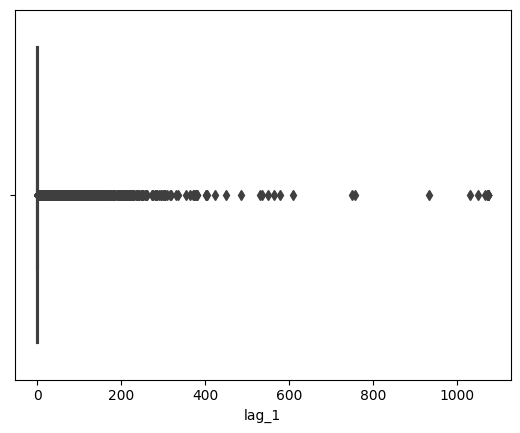

In [ ]:
sns.boxplot(data=df_consumption_nonzero, x="lag_1", orient="h");

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
df_consumption_nonzero.describe()

consumption          unit         lag_1
count 1,265,795.000 1,265,795.000 1,265,492.000
mean      3,081.484        92.002         0.489
std       9,000.090        52.966         5.327
min           0.000         0.000         0.000
25%         695.290        54.000         0.020
50%       1,841.828        86.000         0.070
75%       4,393.050       138.000         0.240
max   2,147,483.640       188.000     1,073.742

In [ ]:
df_consumption[df_consumption.lag_1 > 0].lag_1.describe()

count   1,265,492.000
mean            0.489
std             5.327
min             0.000
25%             0.020
50%             0.070
75%             0.240
max         1,073.742
Name: lag_1, dtype: float64

In [ ]:
display(HTML(
    f"""<font size="4" color="cyan"> There are {df_consumption[
      df_consumption.lag_1 == 0].shape[0]} <code>lag_1</code>'s with
      zero value"""))

In [ ]:
df_consumption.lag_1.isnull().sum()

303

In [ ]:
df_consumption[(df_consumption.lag_1 > 600)]

consumption  unit     lag_1
datetime                                        
2019-03-18 10:00:00    1,073.742     0 1,073.742
2022-04-23 19:21:00    4,774.783     0   750.028
2019-04-01 22:29:00    1,073.742     1 1,073.668
2019-05-05 19:56:00    1,073.742     1 1,066.236
2022-04-24 01:13:00    2,835.948    84   756.008
2019-03-17 07:38:00    1,073.742    86 1,073.713
2022-04-23 18:34:00    7,904.490    86   932.562
2019-03-17 07:39:00    1,073.742    87 1,073.692
2019-03-21 01:24:00    1,073.742    88 1,073.660
2018-06-28 10:25:00    2,556.360   153   607.800
2019-04-22 13:04:00    1,073.742   154 1,072.204
2019-04-22 13:04:00    1,073.742   157 1,072.303
2019-04-01 22:29:00    1,073.742   159 1,072.711
2019-04-01 22:29:00    1,073.742   160 1,072.122
2019-04-03 14:02:00    1,073.742   161 1,073.742
2019-05-06 23:28:00    1,073.742   161 1,029.786
2018-04-16 05:11:00    3,968.790   175 1,048.020

In [ ]:
display(HTML(
    f"""<font size="4" color="cyan"> Among all these {(df_consumption.lag_1 > 600).sum()} with negative <code>lag_1</code> value,
    only {((df_consumption.lag_1 > 600)&(df.consumption.index > '2020-07')).sum()} happened after 2020-07"""))


In [ ]:
df_consumption[(df_consumption.unit == 161) & \
               (df_consumption.index < "2019-05-06 23:28:00")].tail(10)

consumption  unit  lag_1
datetime                                     
2019-05-05 15:52:00       43.449   161  0.053
2019-05-05 15:59:00       43.501   161  0.052
2019-05-05 16:07:00       43.563   161  0.062
2019-05-05 16:23:00       43.678   161  0.114
2019-05-05 16:31:00       43.734   161  0.056
2019-05-05 16:38:00       43.781   161  0.047
2019-05-05 16:45:00       43.836   161  0.055
2019-05-05 16:52:00       43.874   161  0.038
2019-05-05 16:59:00       43.911   161  0.037
2019-05-05 17:07:00       43.956   161  0.044

In [ ]:
(df_consumption.lag_1 == 0).sum()

2817842

### Imputing `NaN` Values

In [ ]:
df_consumption.lag_1.isnull().sum()

303

The imputation is very much like the way we took difference into account, except this time we're going to impute missing values for each unit separately, then concate them again.

In [ ]:
dfs = {}

for i in df_consumption.unit.unique():
    dfs[f"df_{i}"] = df_consumption.loc[df_consumption.unit == i, :].copy()
    dfs[f"df_{i}"].sort_values(by=["datetime"], ascending=[True], inplace=True)
    dfs[f"df_{i}"].lag_1 = \
    dfs[f"df_{i}"]["lag_1"].interpolate("time")

del df_consumption
dfs = list(dfs.values())
df_consumption = pd.concat(dfs, axis=0)

In [ ]:
df_consumption.lag_1.isnull().sum()

0

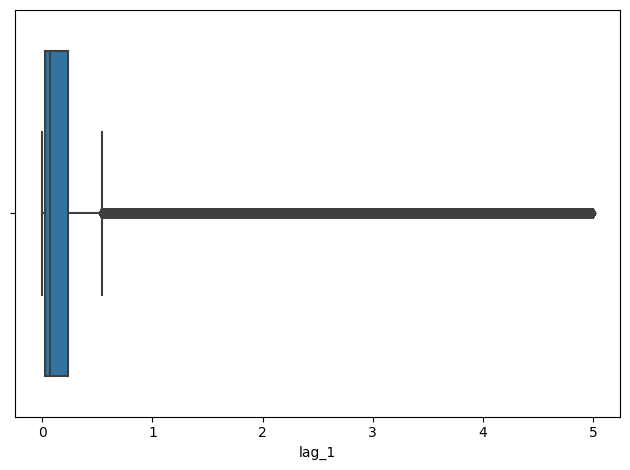

In [ ]:
plt.style.use('default')
sns.boxplot(x = df_consumption[(df_consumption.lag_1 < 5)&\
                        (df_consumption.lag_1 > 0)].lag_1, 
            orient="h");
plt.tight_layout();

In [ ]:
df_consumption[df_consumption.lag_1 > 300].shape[0]

45

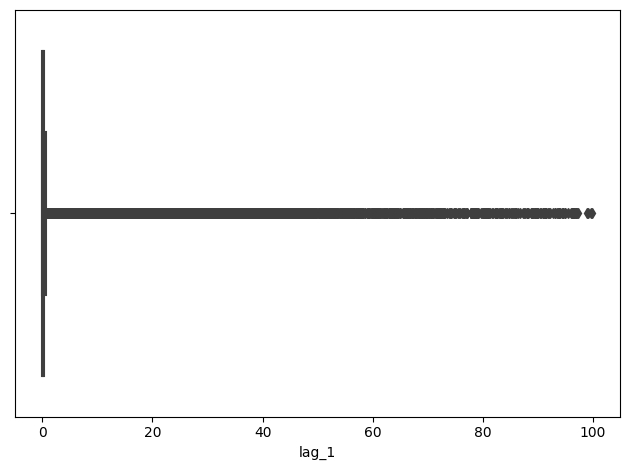

In [ ]:
sns.boxplot(x = df_consumption_nonzero[(df_consumption_nonzero.lag_1 < 100)&\
                        (df_consumption_nonzero.lag_1 >= 0)].lag_1, 
            orient="h");
plt.tight_layout();

In [ ]:
# # This is the workaround for the issue discussed above (read the orange text)
# Q1 = np.percentile(df["lag_1"], 25,
#                     interpolation = 'midpoint')

# Q3 = np.percentile(df["lag_1"], 75,
#                     interpolation = 'midpoint')

# IQR = Q3 - Q1
# upper_whisker = Q3 + 1.5 * IQR

# dfs = {}
# for i in df.unit.unique():
#     dfs[f"df_{i}"] = df[df.unit == i][["consumption", 
#                                                  "unit",
#                                                  "lag_1"]].copy()

#     dfs[f"df_{i}"]

### Creating Diff's Using `.groupby()`

In [ ]:
df_consumption_new = df[["consumption", "unit"]].copy()
df_consumption_new = df_consumption_new.sort_values(by=["unit", "datetime"])
# the following method might be needed to be tracked carefully!
# I'm skeptic about its accuracy, see the below suspicious examples
df_consumption_new["lag_1"] = df_consumption_new.groupby(["unit"])["consum\
ption"].diff().fillna(0)

df_consumption_new.loc[df_consumption_new.lag_1 < 0, "lag_1"] = 0



# errors/outliers very huge numbers
df_consumption_new.loc[df_consumption_new.lag_1 > 2_000_000, "lag_1"] = 0

df_consumption_new.info()

# or df_consumption_new = df_temp[["lag_1", "unit"]].copy()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4083637 entries, 2018-02-06 19:22:00 to 2022-05-16 17:28:00
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   consumption  float64
 1   unit         int64  
 2   lag_1        float64
dtypes: float64(2), int64(1)
memory usage: 124.6 MB


Checking MAE and RMSE between two methods of calculating differences (<font color="green">Did you apply the same imputation?</font>): 

In [ ]:
df_consumption.lag_1.sum() - (df_consumption_new.lag_1).sum()

522.6721394936321

In [ ]:
np.abs(df_consumption.lag_1 - df_consumption_new.lag_1).sum()

527.3121394932843

In [ ]:
np.sqrt(((df_consumption.lag_1 - df_consumption_new.lag_1)**2).sum(axis=0))

130.71733806583632

### What is the Best Time Step?

Transforming data into a proper time series mean we must create equally spaced time steps, however choosing the right time step is crucial both to our modeling and analysis sections.

In [ ]:
selected_unit = 12

graph_data = pd.DataFrame(df_consumption.loc[(df_consumption.unit == selected_unit)&\
                                                 (df_consumption.index <\
                                                  "2022-05-16")]\
    .resample('D')["lag_1"].sum())

fig = px.line(graph_data, title=f"Unit {selected_unit}")
fig.show()

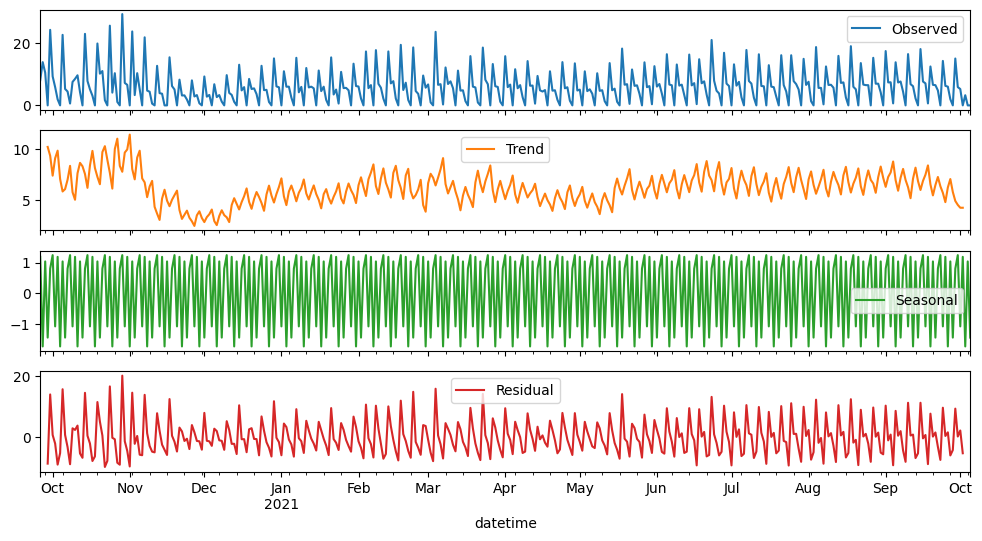

In [ ]:
start_date = '2020-09-25'
stop_date = '2021-10-06'

go_for_it = graph_data.loc[
                           (graph_data.index > start_date)& \
                           (graph_data.index < stop_date)
                           ,
                           :]
decomposition = seasonal_decompose(go_for_it, model='additive');
decomposition = pd.concat(
    [
     decomposition.observed,
     decomposition.trend,
     decomposition.seasonal,
     decomposition.resid
    ],
    axis = 1
)
decomposition.columns = ["Observed", "Trend", "Seasonal", "Residual"]
decomposition.plot(figsize=(12,6), subplots=True);

In [ ]:
df_consumption.index = pd.DatetimeIndex(df_consumption.index)

plt.style.use('default')

sns.set(rc={"figure.figsize":(13, 4)})

for i in df_consumption.unit.unique():
    graph_data = pd.DataFrame(df_consumption.loc[(df_consumption.unit == i)&\
                                                 (df_consumption.index <\
                                                  "2022-05-16")]\
    .resample('D')["lag_1"].sum()) #.plot(figsize=(12,4), title=f"Unit {i}",
                                    #   colormap='cividis')
    plt.xticks(rotation=30)

    
    ax = sns.lineplot(data=graph_data, x = 'datetime', 
                 y='lag_1', palette='viridis');
    
    plt.title(f"unit {i}")
    plt.pause(0.001)
    # plt.clf()

Output hidden; open in https://colab.research.google.com to view.

Plotting the Autocorrelation plot of a single unit:

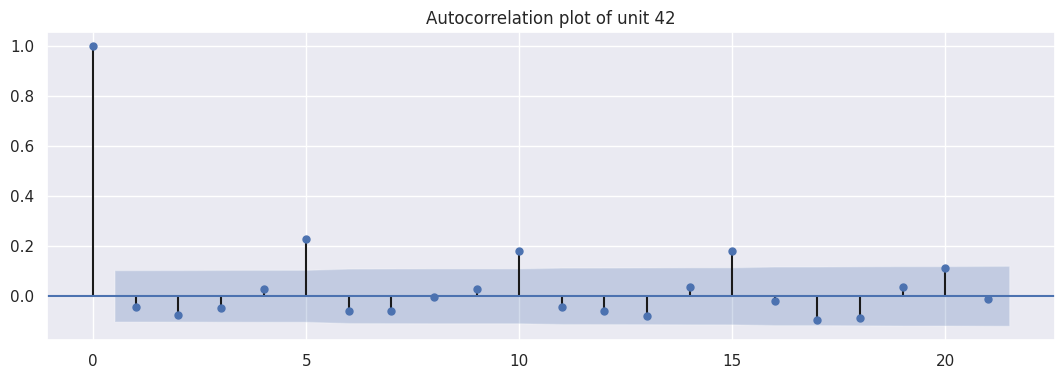

In [ ]:
selected_unit = 42
start_date = '2019-01'
end_date = '2020-01'
lags = 21

graph_data = pd.DataFrame(df_consumption.loc[(df_consumption.unit == selected_unit)&\
                                                 (df_consumption.index <\
                                                  end_date) &\
                                             (df_consumption.index > start_date)]\
    .resample('D')["lag_1"].sum())

plot_acf(graph_data, title=f"Autocorrelation plot of unit {selected_unit}",
         lags=lags);

In [ ]:
df_consumption

consumption  unit  lag_1
datetime                                     
2018-02-06 19:22:00        0.000     0  0.000
2018-02-07 07:00:00        0.000     0  0.000
2018-02-07 11:29:00        0.000     0  0.000
2018-02-07 22:01:00        0.000     0  0.000
2018-02-07 22:47:00        0.000     0  0.000
...                          ...   ...    ...
2022-05-16 13:22:00    1,934.830   188  0.000
2022-05-16 14:23:00    1,934.830   188  0.000
2022-05-16 15:25:00    1,934.830   188  0.000
2022-05-16 16:27:00    1,934.830   188  0.000
2022-05-16 17:28:00    1,934.830   188  0.000

[4083637 rows x 3 columns]

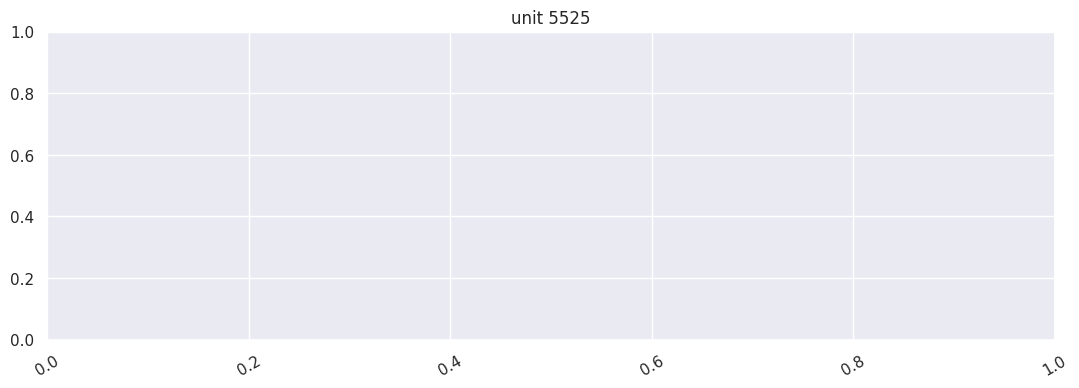

In [ ]:
# checking for some particular unit i
i = 5525 # 5511

df_consumption.index = pd.DatetimeIndex(df_consumption.index)

plt.style.use('default')

sns.set(rc={"figure.figsize":(13, 4)})

graph_data = pd.DataFrame(np.log(df_consumption.loc[(df_consumption.unit == i)&
                                             (df_consumption.index >\
                                              '2021-11-01')&\
                                             (df_consumption.index <\
                                              '2021-11-16')] + 1)\
    .resample('1H')["lag_1"].sum()) #.plot(figsize=(12,4), title=f"Unit {i}",
                                    #   colormap='cividis')
plt.xticks(rotation=30)


ax = sns.lineplot(data=graph_data, x = 'datetime', 
                y='lag_1', palette='viridis');

plt.title(f"unit {i}")
plt.pause(0.001)

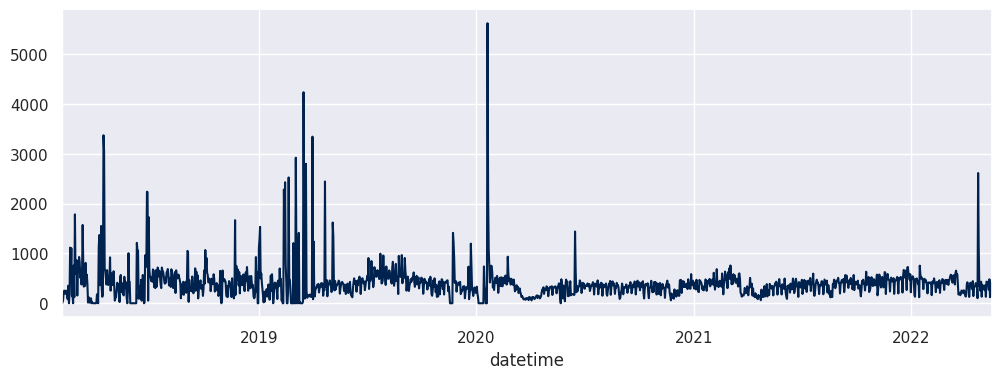

In [ ]:
df_consumption.index = pd.DatetimeIndex(df_consumption.index)
df_consumption.resample('D')["lag_1"].sum().plot(figsize=(12,4),
                                                 colormap='cividis');

This doesn't look any good! As discussed with the team, it's decided to replace negative plus extreme values with their one-step before value:

In [ ]:
extreme_value = 2500
df_consumption.loc[(df_consumption.lag_1 < 0)|\
                   (df_consumption.lag_1 > extreme_value), "lag_1"] = np.nan

Now filling these `nan` values, we need to reframe the `DataFrame` into groups separated by `unit`s:

In [ ]:
df_consumption.lag_1 = df_consumption.groupby("unit")["lag_1"].\
fillna(method="ffill")

## Needs sanity check!

## Overview Visualizations

In [ ]:
better_mapping[original_units[42]]

5551

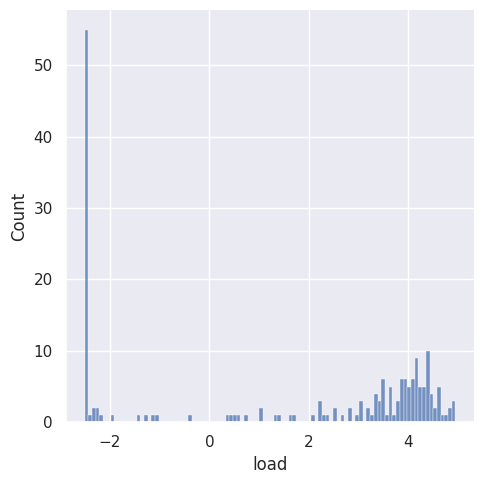

In [ ]:
x = (np.log(graph_data["load"] + 0.03)\
 /np.abs(np.log(graph_data["load"] + 0.03))) *\
 np.abs(np.log(graph_data["load"] + 0.03)) ** (11/15)
sns.displot(x=x, bins=100);

In [ ]:
selected_units = list(df.unit.unique(),)
# selected_units = major_units
start_date = "2021-01-01"
end_date = "2022-01-01"
# additionally having their corresponding code (when we were scraping)
# is also nice to have and visualize

def widnlen(n):
    if math.sqrt(n) - int(math.sqrt(n)):
        width = int(math.sqrt(n))
        length = math.ceil(n / width)
        # return (int(math.sqrt(n) + 1),) * 2
        return width, length
    else:
        return (int(math.sqrt(n)),) * 2

width, length = widnlen(len(selected_units))

# 5 is for Yrows, Xcols, unit, code, and load + np.log(graph_data["load"] + 1) ** (7/5)
graph_data = pd.DataFrame(np.zeros(shape=(width * length, 5)))
graph_data.columns = ["Yrows", "Xcols", "unit", "code", "load"]

for i in range(len(selected_units)):
    graph_data.iloc[i] = (i // length, i % length, int(i),
                          original_units[i], # vahed_name, or web scraping's code
                          df_consumption.loc[
                                (df_consumption.unit==i)&\
                                (df_consumption.index >= start_date)&\
                                (df_consumption.index <= end_date),
                                        "lag_1"].sum()
                          )
  
i += 1

while i < width * length:    
    graph_data.iloc[i] = (i // length, i % length, np.nan, np.nan, np.nan)
    i += 1

    
# graph_data.iloc[:, :-1] = graph_data.iloc[:, :-1].astype(np.int32)

In [ ]:
# Create a pivot table
result = graph_data.pivot(index='Yrows', columns='Xcols' , values='load')

# Create an array to annotate the heatmap
labels = (np.array(["{0} \n {1:.2f}".format(symb, value)
                      for symb, value in zip(graph_data.code,
                                               graph_data.load)])
         ).reshape(width, length)

In [ ]:
# default color palette of Seaborn
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
# Make your own kind of color map
##use html color codes
gyr = ['#FF003C', '#FD2F14', '#F86127', '#F38C3B', '#F1A652',
       '#EFC961', '#ECDC70', '#E4E980', '#CFE688', '#C0E38F',
       '#B6DB98', '#AAD09A', '#A1C79B', '#99B99B', '#8EA493',
       "#808D86", "#666C6A"][::-1]
sns.color_palette(gyr)

[(0.4, 0.4235294117647059, 0.41568627450980394),
 (0.5019607843137255, 0.5529411764705883, 0.5254901960784314),
 (0.5568627450980392, 0.6431372549019608, 0.5764705882352941),
 (0.6, 0.7254901960784313, 0.6078431372549019),
 (0.6313725490196078, 0.7803921568627451, 0.6078431372549019),
 (0.6666666666666666, 0.8156862745098039, 0.6039215686274509),
 (0.7137254901960784, 0.8588235294117647, 0.596078431372549),
 (0.7529411764705882, 0.8901960784313725, 0.5607843137254902),
 (0.8117647058823529, 0.9019607843137255, 0.5333333333333333),
 (0.8941176470588236, 0.9137254901960784, 0.5019607843137255),
 (0.9254901960784314, 0.8627450980392157, 0.4392156862745098),
 (0.9372549019607843, 0.788235294117647, 0.3803921568627451),
 (0.9450980392156862, 0.6509803921568628, 0.3215686274509804),
 (0.9529411764705882, 0.5490196078431373, 0.23137254901960785),
 (0.9725490196078431, 0.3803921568627451, 0.15294117647058825),
 (0.9921568627450981, 0.1843137254901961, 0.0784313725490196),
 (1.0, 0.0, 0.23529411764705882)]

In [ ]:
result

Xcols     0.000     1.000     2.000     3.000     4.000     5.000     6.000   \
Yrows                                                                          
0.000  2,339.520     0.009 1,101.490 1,672.660 1,212.650     4.680 1,039.550   
1.000      1.320     0.000   531.070   159.980   576.992   612.800   320.820   
2.000  3,048.190 1,927.840     0.000   326.390     1.640   555.550     0.000   
3.000      0.000     0.000 1,511.620     0.000     0.000   739.380   171.260   
4.000      0.000     0.000     0.000     0.000     0.000     7.490     0.000   
5.000      0.000     1.510   238.760     0.000     0.000     0.000   218.050   
6.000    565.210 2,003.520   502.600   623.060 2,619.230 3,293.820 2,205.190   
7.000     65.920     1.900     0.000     0.000     0.000     0.000     0.000   
8.000      0.000     4.420     0.000   121.840     0.000   181.640   103.260   
9.000      0.320   458.530 1,156.140 1,778.930   243.950   877.380 1,058.580   
10.000     0.050 1,139.580    35.780   168.670 1,483.713   957.036   975.106   
11.000 2,333.810   591.360 7,027.290 6,253.460 1,128.500   819.300   764.920   
12.000     0.000    14.560 3,301.060 1,739.680     0.210     1.260   103.520   

Xcols     7.000     8.000     9.000     10.000    11.000    12.000    13.000  \
Yrows                                                                          
0.000    199.010     2.760 1,969.170     0.000     0.000 1,718.840    98.060   
1.000    776.730     0.160    35.480 1,127.350   245.690     0.020     0.020   
2.000      0.000     0.000     0.000     0.000 5,245.090 5,960.400     0.000   
3.000      0.000 1,304.480 1,460.380 5,791.920     2.750   348.200   972.280   
4.000  3,822.640     0.000     0.000     0.000     0.000     0.000     0.000   
5.000     62.980    21.067 1,746.231   513.127 3,282.453 1,201.961   241.131   
6.000    259.110   796.240 4,321.980    43.230     0.000     0.000     0.000   
7.000      0.000     0.000     0.000     0.000   174.740    27.450   123.090   
8.000    670.560 1,141.880   269.470   371.940 3,410.100 1,029.590   332.090   
9.000      6.700 1,813.740 2,188.350    20.520    84.230 1,001.270   614.920   
10.000   580.610   637.429 1,353.279     0.024     0.000 1,911.630 1,531.070   
11.000   249.970    19.200   855.410   227.740   343.620     0.710     0.010   
12.000     0.000     0.010       NaN       NaN       NaN       NaN       NaN   

Xcols     14.000  
Yrows             
0.000      0.000  
1.000  1,980.310  
2.000      0.000  
3.000      0.000  
4.000      0.000  
5.000    718.042  
6.000      0.000  
7.000      0.290  
8.000  1,310.080  
9.000     22.710  
10.000 2,448.890  
11.000     0.000  
12.000       NaN

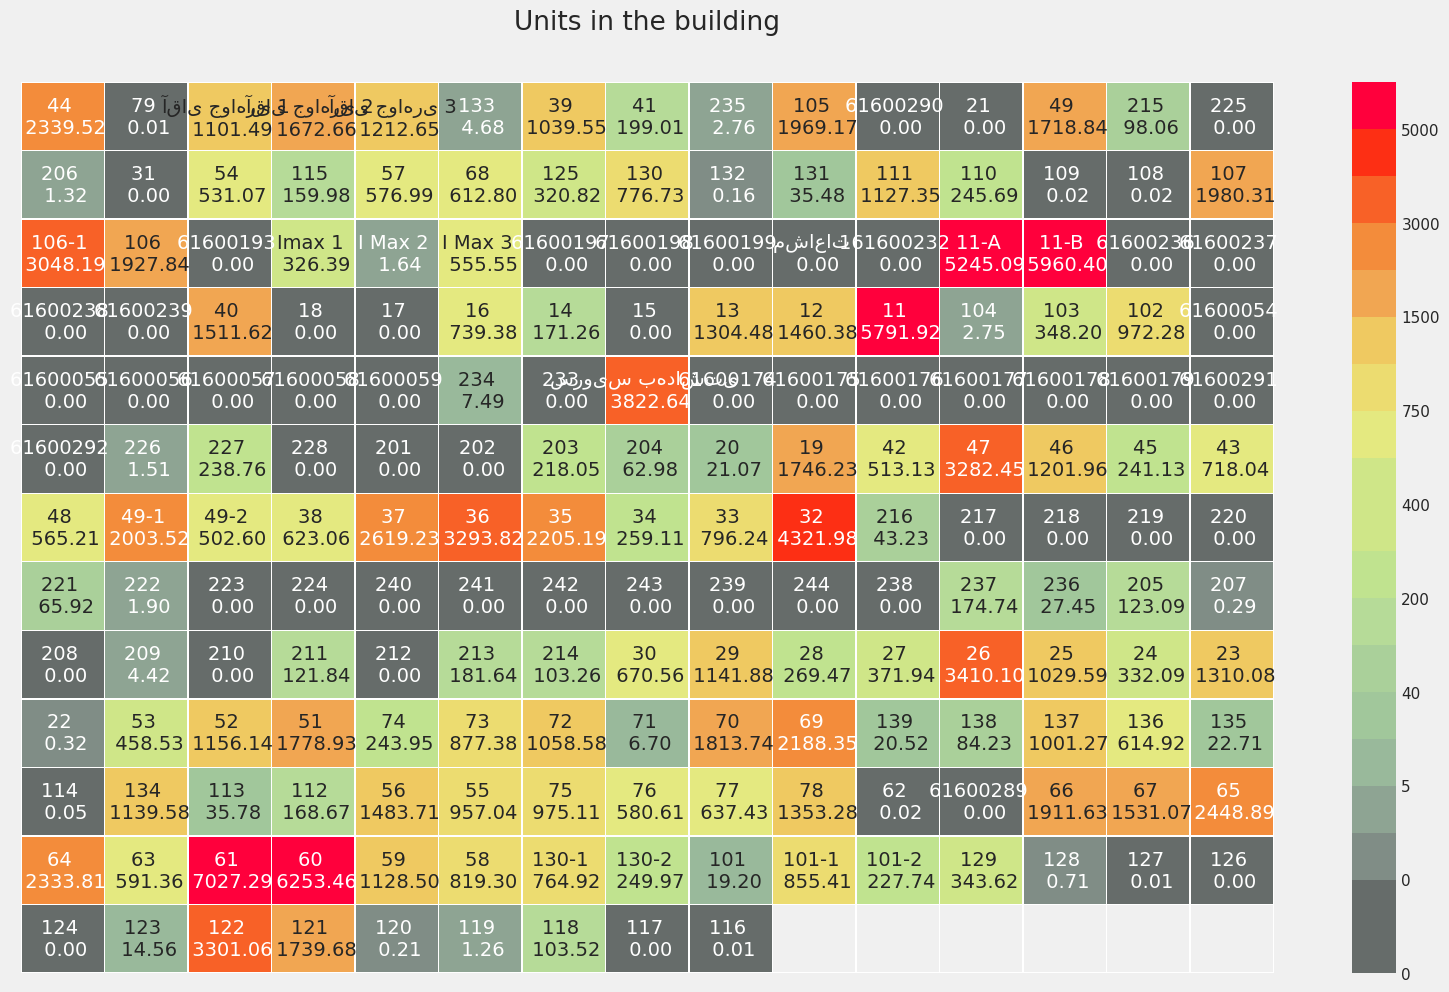

In [ ]:
# Define the plot
fig, ax = plt.subplots(figsize=(18,11))

# Add title to the Heat map
title = "Units in the building"

# Set the font size and the distance of the title from the plot
plt.title(title, fontsize=19)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')


my_colors = ListedColormap(sns.color_palette(gyr))
bounds = np.percentile(result.fillna(0).values,
                       q=np.arange(0,100,100/(len(gyr) + 20)),
                       axis=None)
bounds = [0, 0.01, 0.05, 1, 5, 20, 40, 100, 
          200, 300, 400, 500, 750, 1000, 1500, 
          2000, 3000, 4000, 5000, 7500]
my_norm = BoundaryNorm(bounds, ncolors=len(gyr))

# sns.

# Use the heatmap function from the seaborn package
sns.heatmap(result, annot=labels, fmt="", cmap=my_colors,
            norm=my_norm, 
            linewidths=0.30, ax=ax,
            vmin=result.fillna(0).values.min(),
            vmax=result.fillna(0).values.max())

# Display the Pharma Sector Heatmap
plt.show()

In [ ]:
list(original_units).index('11-A')

41

In [ ]:
mapping_to_code['11-A']

5550

In [ ]:
!pip install jupyter-dash -q

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Load Data
df = df_consumption

# Some variables
selected_units = list(df.unit.unique())
start_date = ""
end_date = ""
time_steps = {"daily": "D", "hourly": "H", "weekly": "W"}

# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Overview of the Whole Building"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.line(
        df, x=df.index, y="lag_1", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline',host="0.0.0.0",port=1005)

<IPython.core.display.Javascript object>

# Important

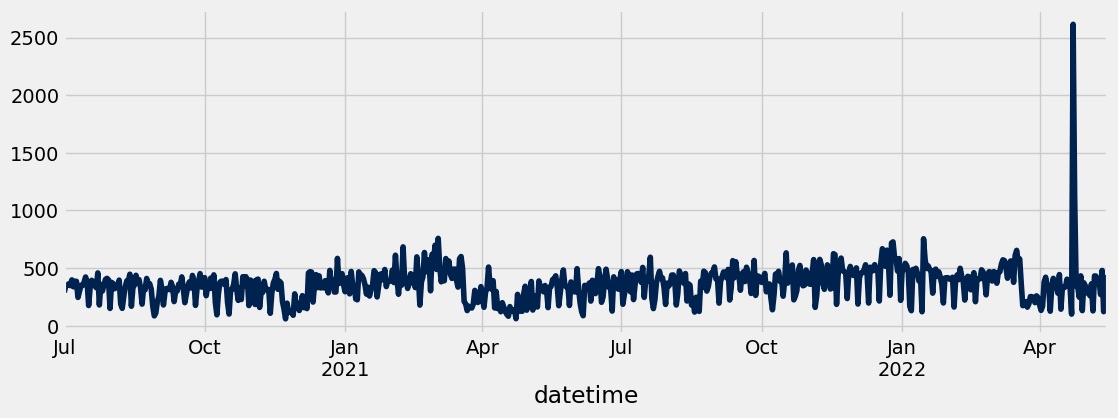

In [ ]:
df_consumption[df_consumption.index > "2020-07"].resample('D')["lag_1"].sum().plot(figsize=(12,4),
                                                 colormap='cividis');

In [ ]:
fig = px.line(df_consumption[df_consumption.index > "2022-04"].resample('D')["lag_1"].sum())
fig.show()

In [ ]:
loads = []
for i in df.unit.unique():
    bitch = df_consumption[(df_consumption.unit == i)&\
                          (df_consumption.index > "2022-04-08")&\
                          (df_consumption.index < "2022-04-28")].lag_1.sum()
    loads.append((i, bitch))

In [ ]:
loads.sort(key=lambda x:x[1], reverse=True)
loads

[(168, 452.3600000000006),
 (151, 242.9300000000003),
 (55, 234.90000000000146),
 (42, 214.47000000000116),
 (30, 160.64000000000033),
 (99, 155.8099999999995),
 (95, 145.5),
 (154, 123.85400000000027),
 (96, 123.60999999999967),
 (67, 122.09000000000015),
 (94, 110.60999999999967),
 (4, 98.73999999999978),
 (6, 98.42000000000007),
 (86, 92.25750000000062),
 (165, 88.42999999999938),
 (31, 85.64999999999964),
 (2, 83.19999999999982),
 (182, 79.55999999999767),
 (131, 77.92000000000007),
 (183, 77.76999999999998),
 (35, 74.04999999999995),
 (0, 72.7539999999999),
 (29, 71.38000000000102),
 (9, 70.29999999999927),
 (176, 64.46000000000004),
 (51, 63.76000000000022),
 (143, 60.63999999999942),
 (54, 59.159999999999854),
 (134, 54.55000000000018),
 (162, 54.02000000000044),
 (136, 51.98999999999978),
 (3, 51.590000000000146),
 (140, 50.83999999999969),
 (106, 50.089999999999975),
 (141, 49.850000000000136),
 (137, 49.36000000000058),
 (65, 46.16999999999999),
 (159, 45.5654999999997),
 (17

In [ ]:
len([i for i in loads if i[1]==0])

88

In [ ]:
loads.sort(key=lambda x:x[1], reverse=True)
bitches = [element[0] for element in loads[:20]]
bitches

[168,
 151,
 55,
 42,
 30,
 99,
 95,
 154,
 96,
 67,
 94,
 4,
 6,
 86,
 165,
 31,
 2,
 182,
 131,
 183]

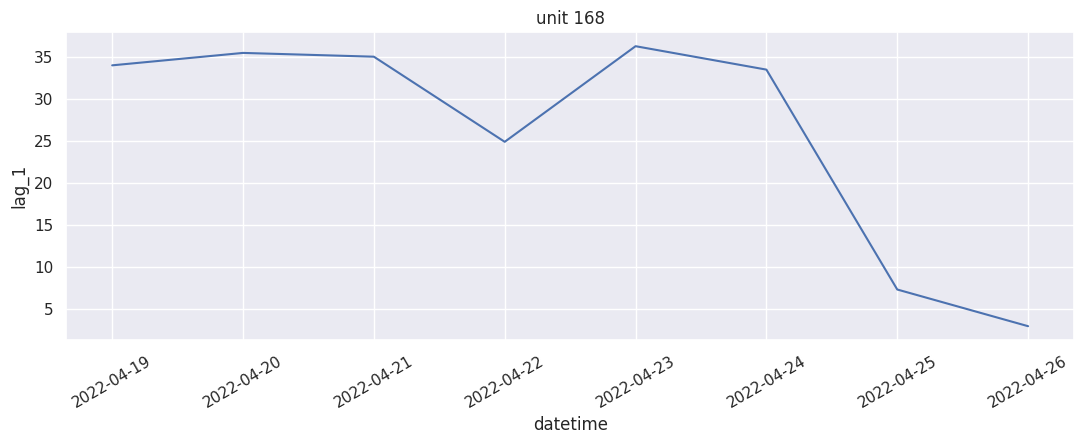

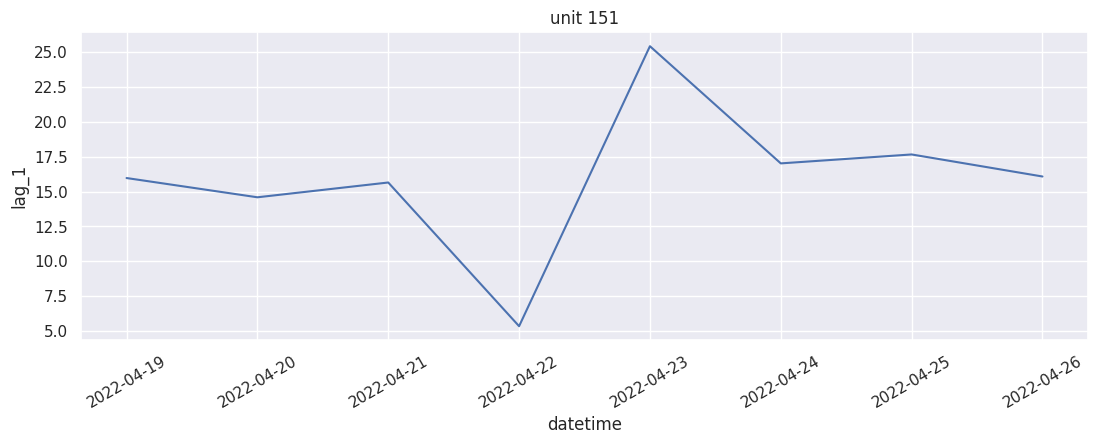

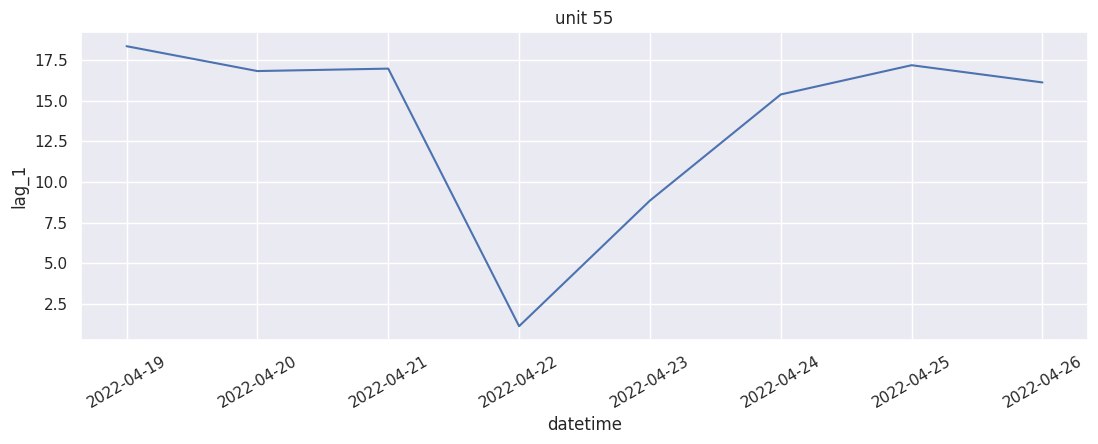

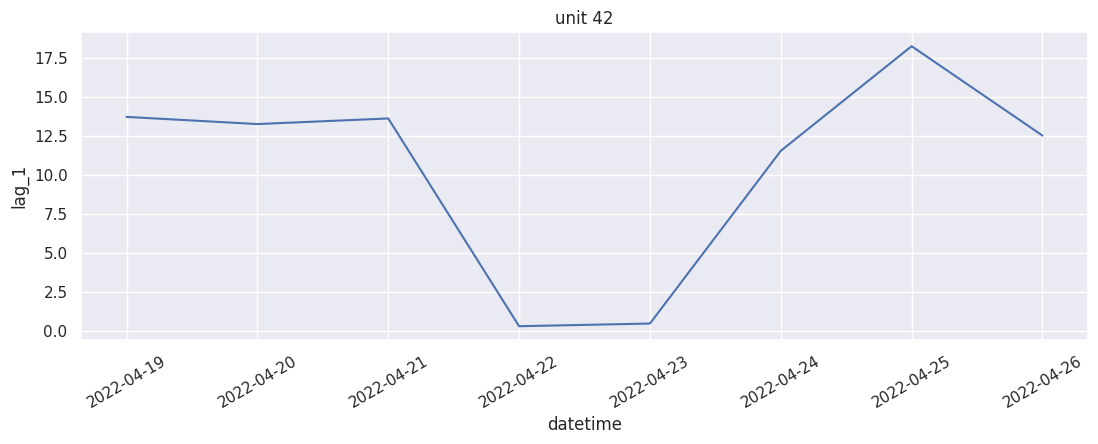

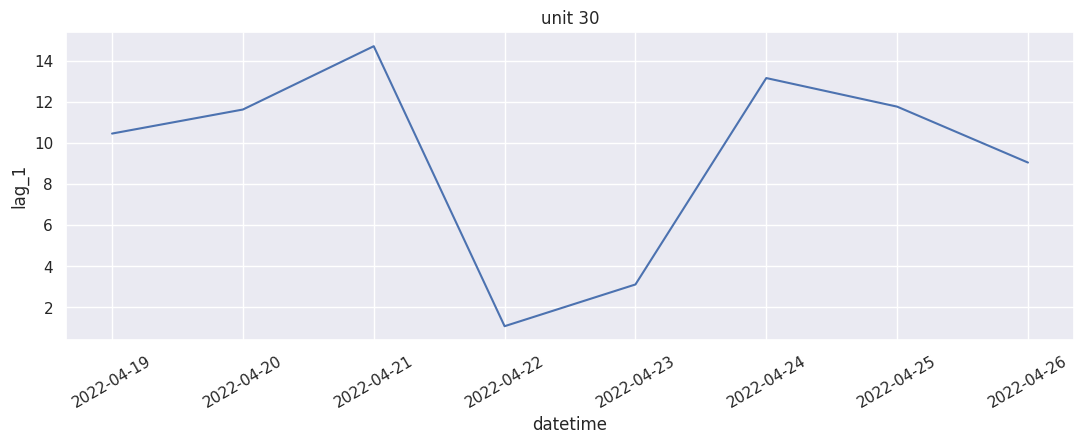

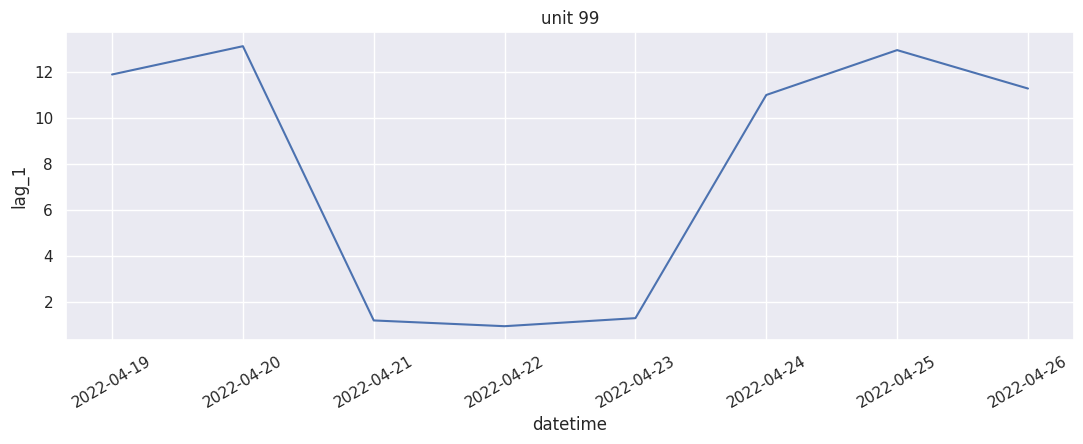

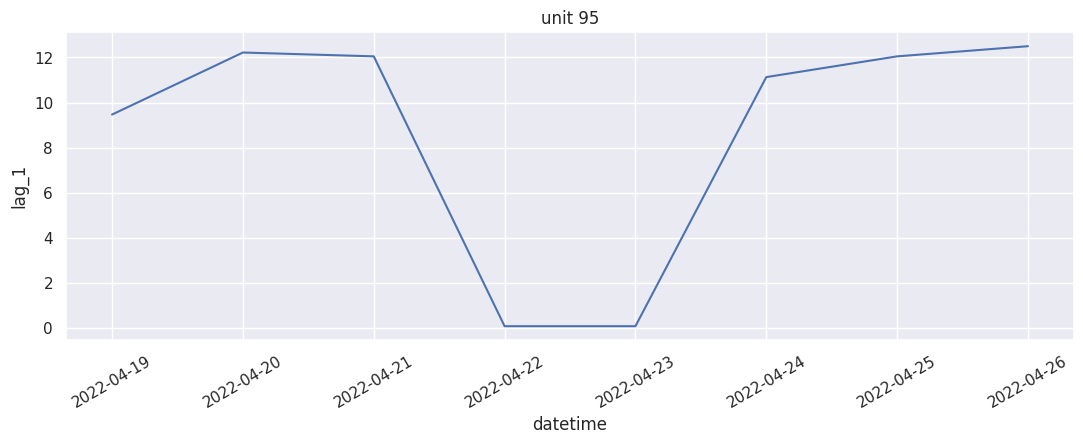

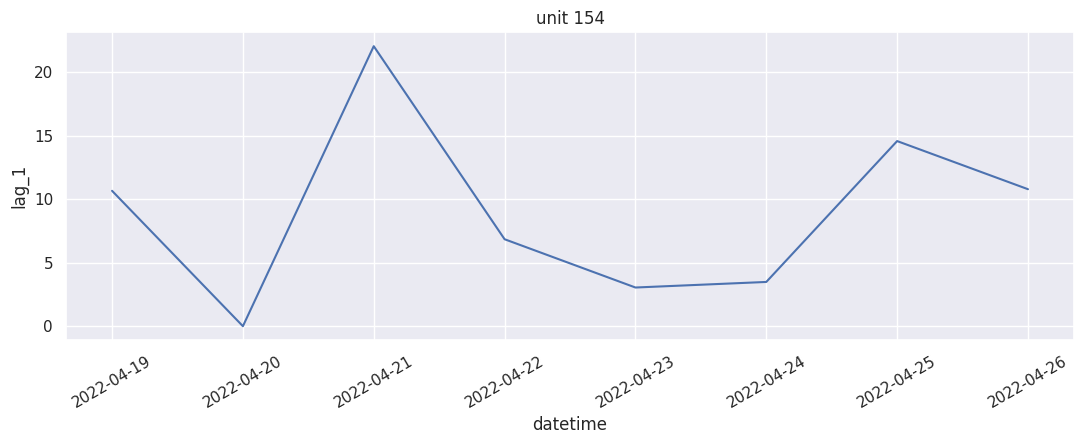

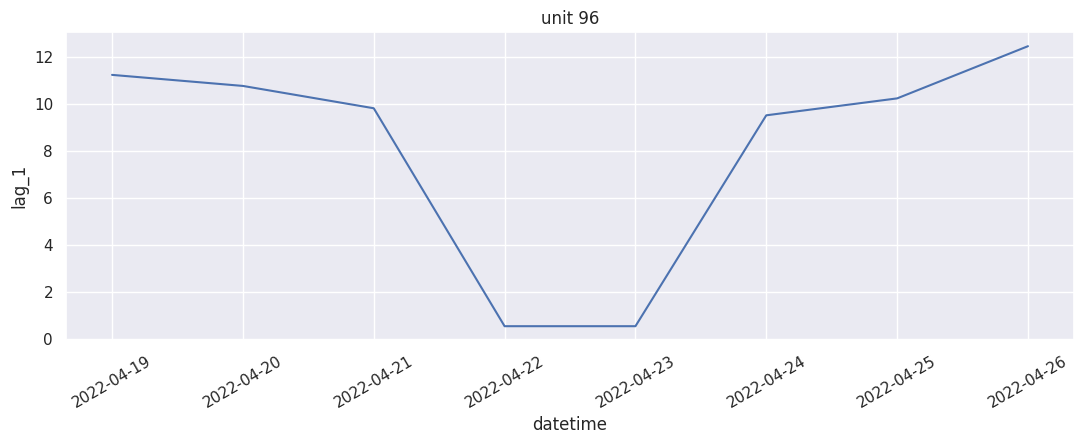

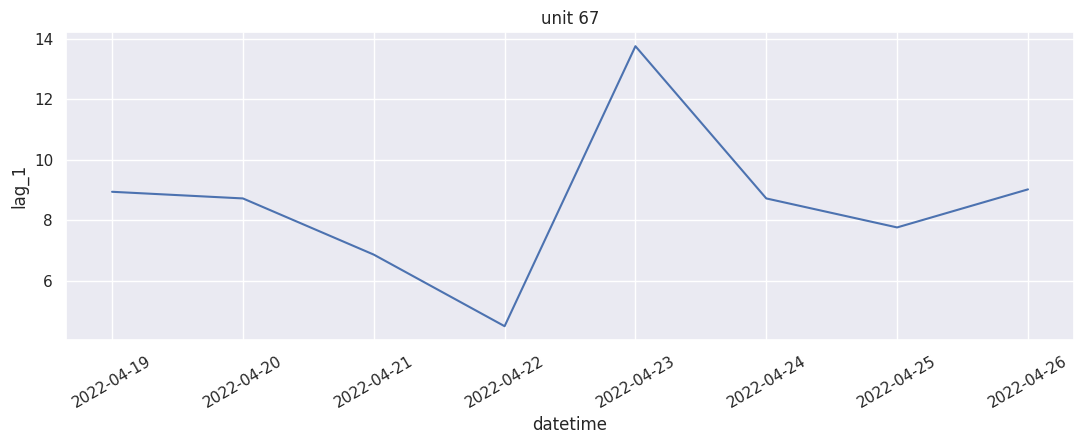

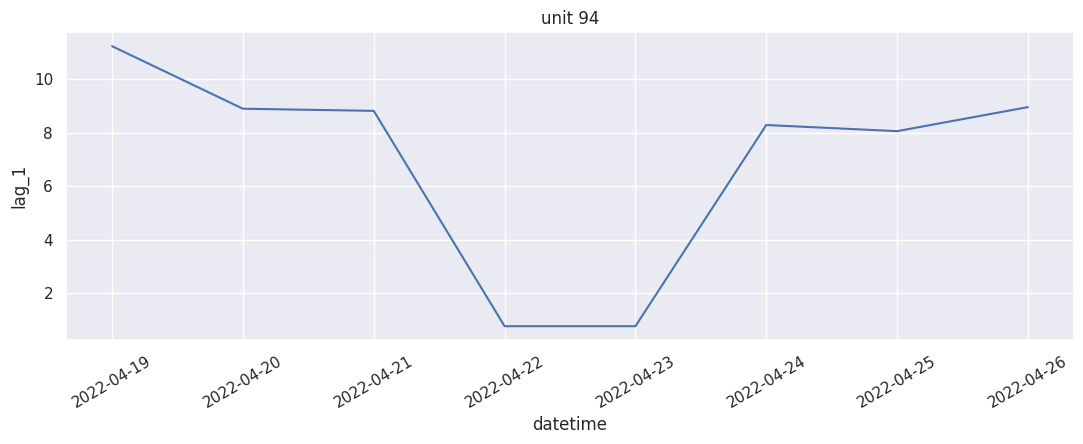

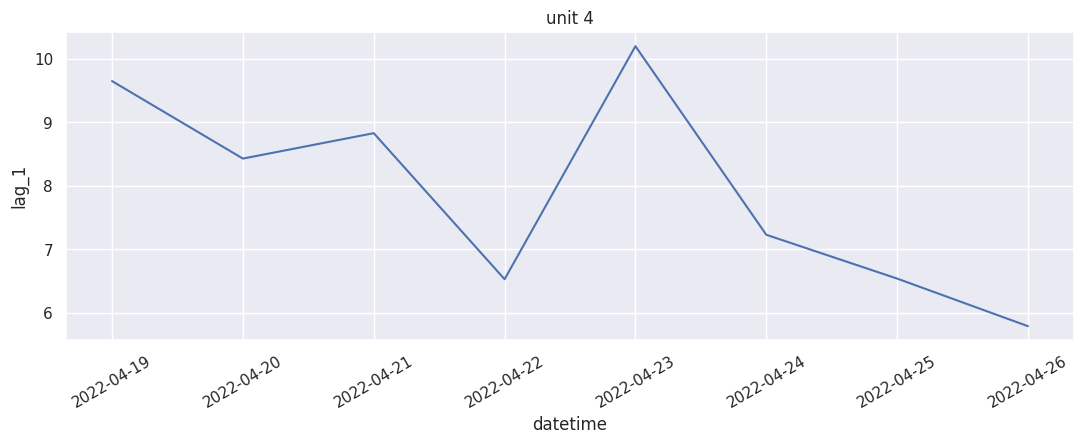

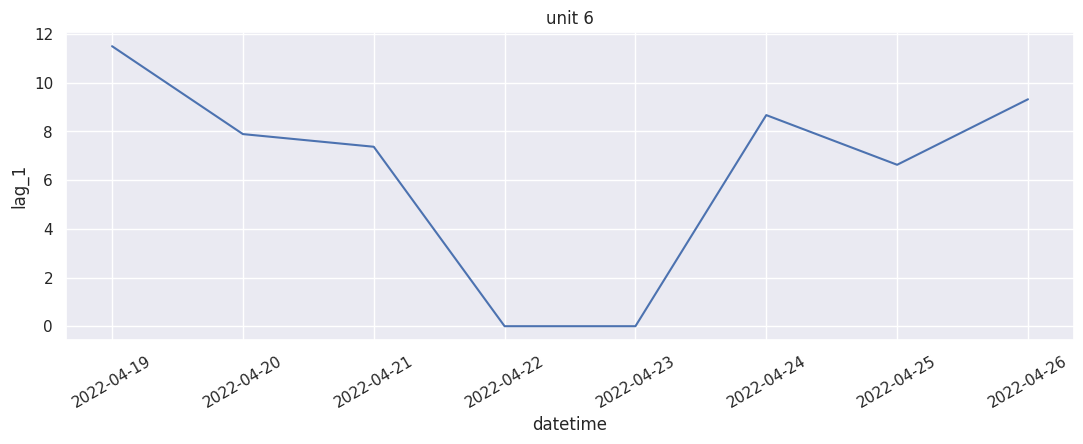

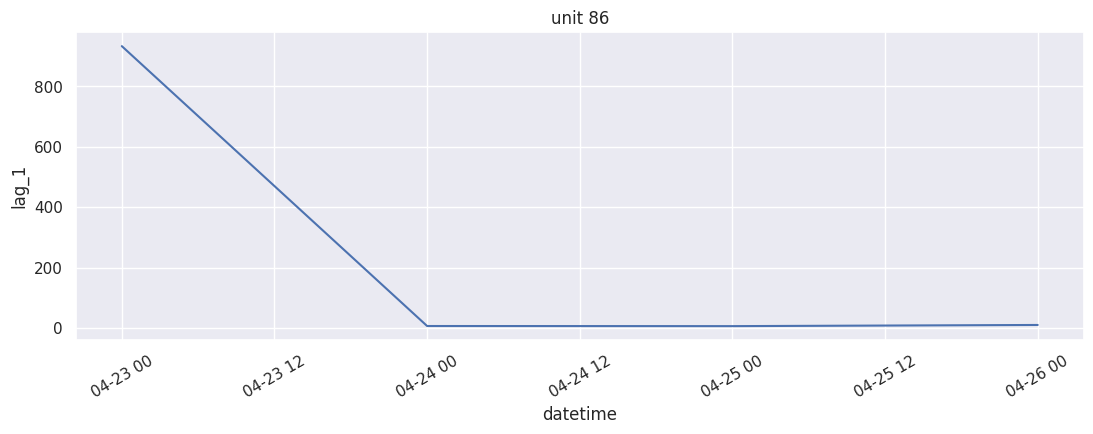

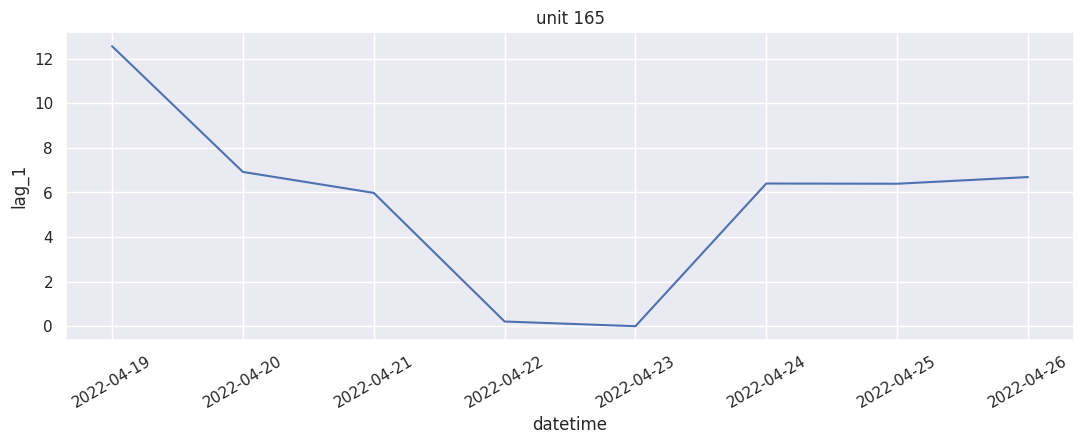

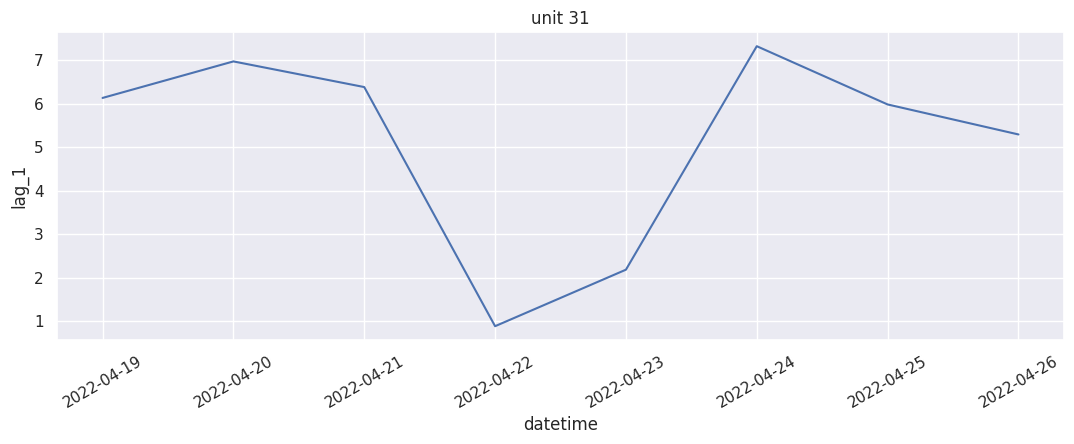

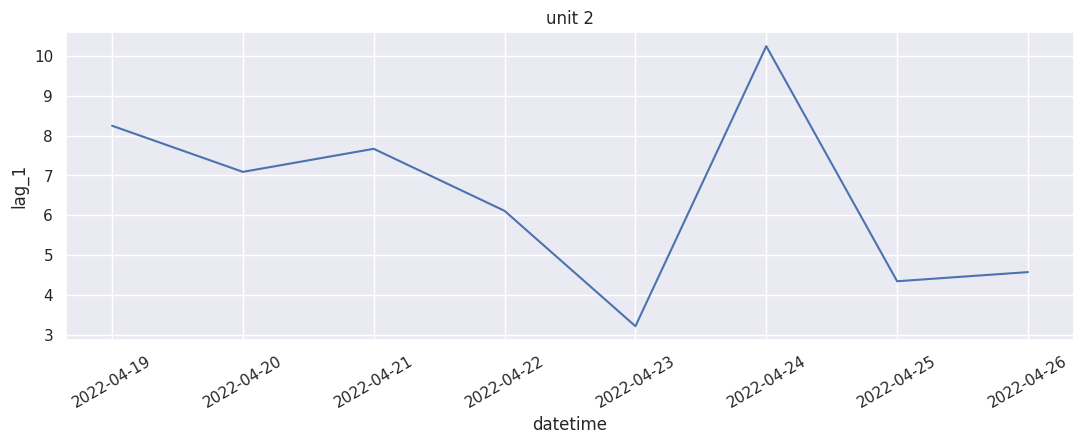

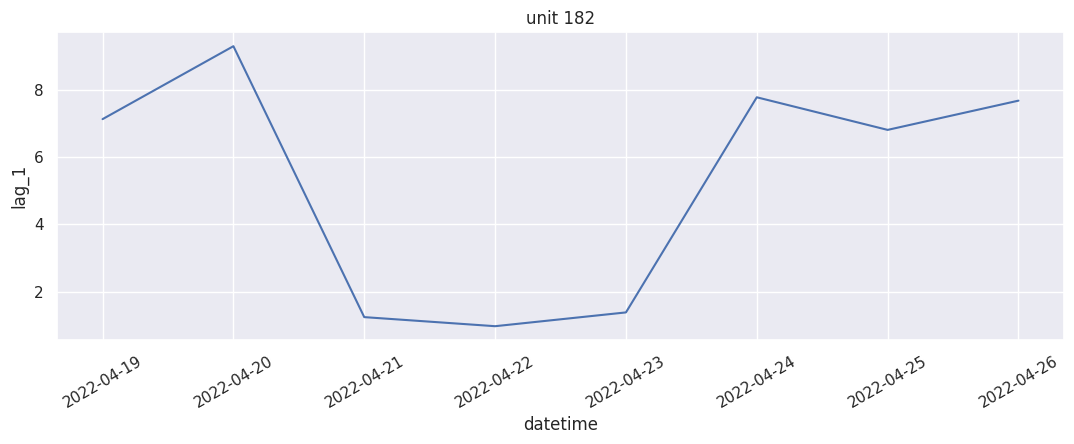

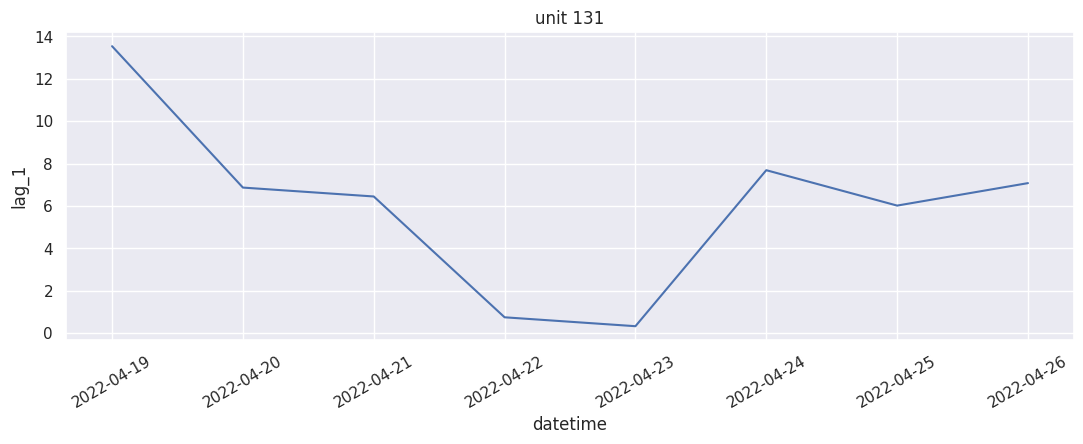

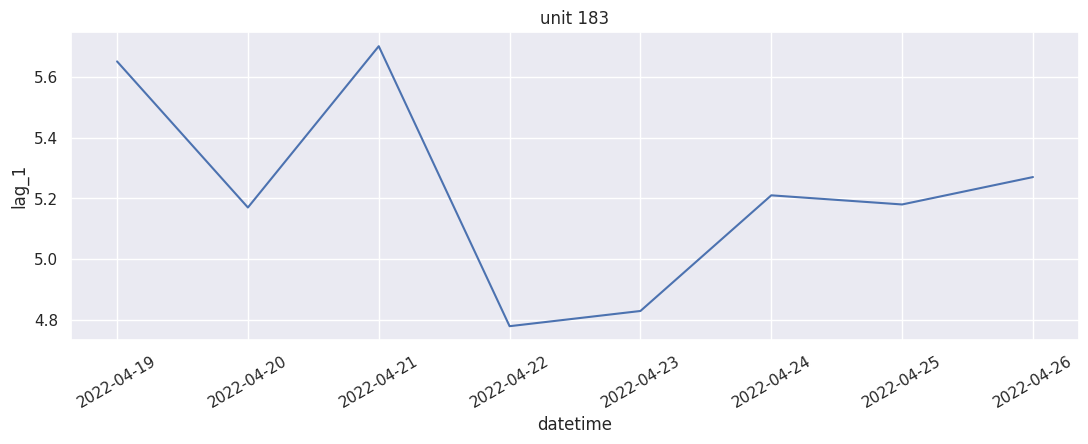

In [ ]:
df_consumption.index = pd.DatetimeIndex(df_consumption.index)

plt.style.use('default')

sns.set(rc={"figure.figsize":(13, 4)})

for i in bitches:
    graph_data = df_consumption.loc[(df_consumption.unit == i)&\
                                                 (df_consumption.index >\
                                                  "2022-04-19")&\
                                                 (df_consumption.index <\
                                                  "2022-04-27")]\
    .resample('D')["lag_1"].sum() #.plot(figsize=(12,4), title=f"Unit {i}",
                                    #   colormap='cividis')
    plt.xticks(rotation=30)

    
    ax = sns.lineplot(data=graph_data.to_frame(), x = 'datetime', 
                 y='lag_1', palette='viridis');
    
    plt.title(f"unit {i}")
    plt.pause(0.001)

In [ ]:
df_temp = df_consumption.copy()

Plotting hourly consumption:

In [ ]:
df_consumption.index = pd.DatetimeIndex(df_consumption.index)
fig = px.line(df_consumption[df_consumption.unit == 42].resample('W')["lag_1"].sum())
fig.show()

In [ ]:
df_consumption.index = pd.DatetimeIndex(df_consumption.index)
fig = px.line(df_consumption[df_consumption.unit == 42].resample('W')["lag_1"].sum())
fig.show()

In [ ]:
df_consumption[(df_consumption.index >= "2019-11-18")&(df_consumption.index <= "2019-11-22")]

Empty DataFrame
Columns: [consumption, unit, lag_1]
Index: []

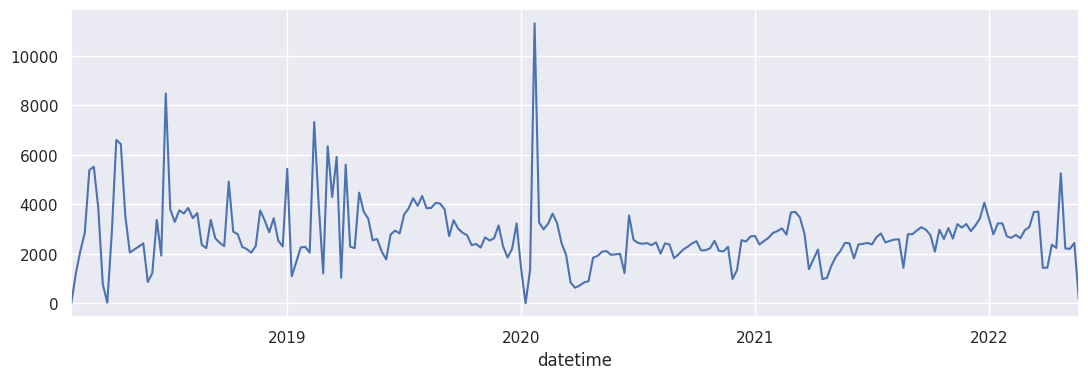

In [ ]:
df_consumption.resample("W").sum()["lag_1"].plot();

#### Summary Statistics

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
df_consumption.lag_1.describe()

count   4,083,637.000
mean            0.152
std             2.974
min             0.000
25%             0.000
50%             0.000
75%             0.016
max         1,073.742
Name: lag_1, dtype: float64

In [ ]:
ex_kurt = kurtosis(df_consumption.lag_1)
skewness = skew(df_consumption.lag_1)

print("Skewness: {} \nKurtosis: {}".format(skewness, ex_kurt))

Skewness: 200.6688799071206 
Kurtosis: 61569.471769232834


In [ ]:
ex_kurt = kurtosis(df_consumption_new.lag_1)
skewness = skew(df_consumption_new.lag_1)

print("Skewness: {} \nKurtosis: {}".format(skewness, ex_kurt))

df_consumption_new.lag_1.describe()

NameError: ignored

### Data Transformation 
<font style="font-size:7vw">(to make it more normal-looking)</font>

Still not a very satisfactory looking time series. The next appropriate steps might involve transforming data, either using classical known transformation like *Box Cox transformation* or *Logarithmic Scaling*, or invent something of our own. I'll go with [Box-Cox transform](https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/#:~:text=Log%20transforms%20are%20popular%20with,effective%20at%20removing%20exponential%20variance.&text=Where%20transform%20is%20the%20transformed,x%20is%20the%20time%20series.) using `scipy.stats` package:

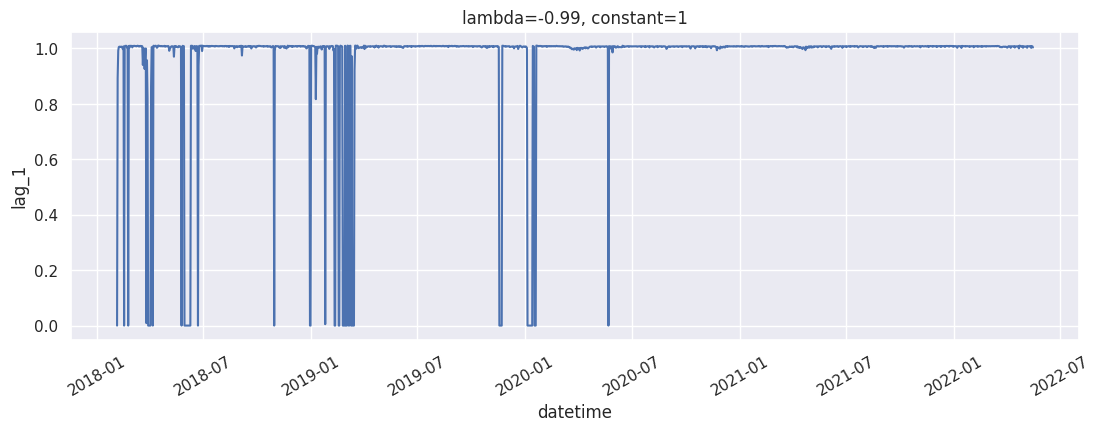

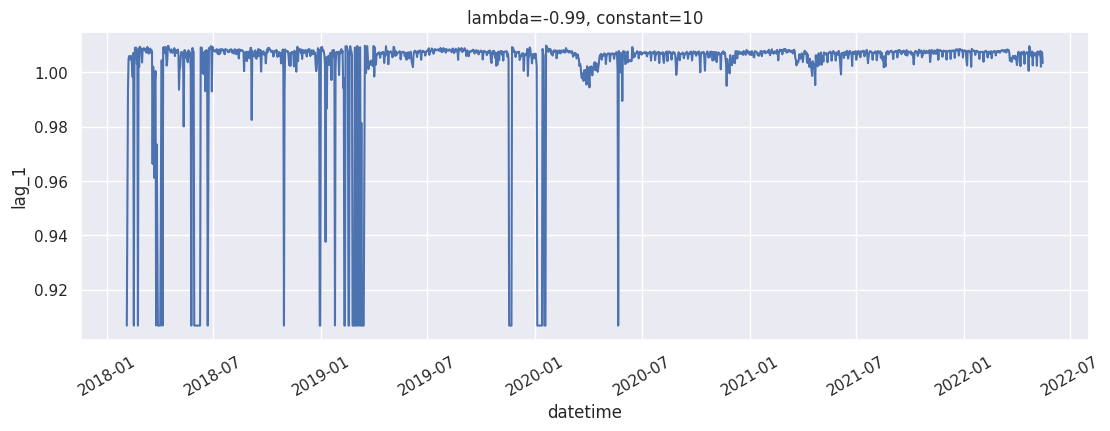

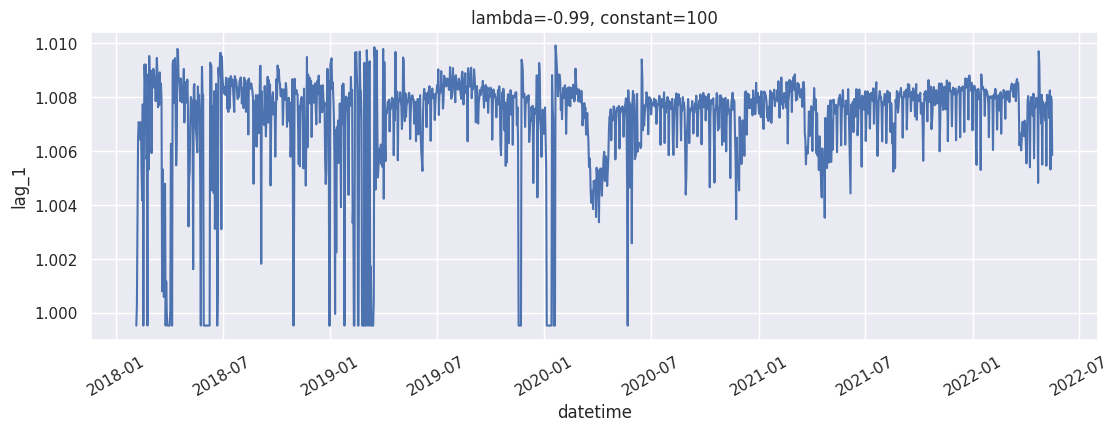

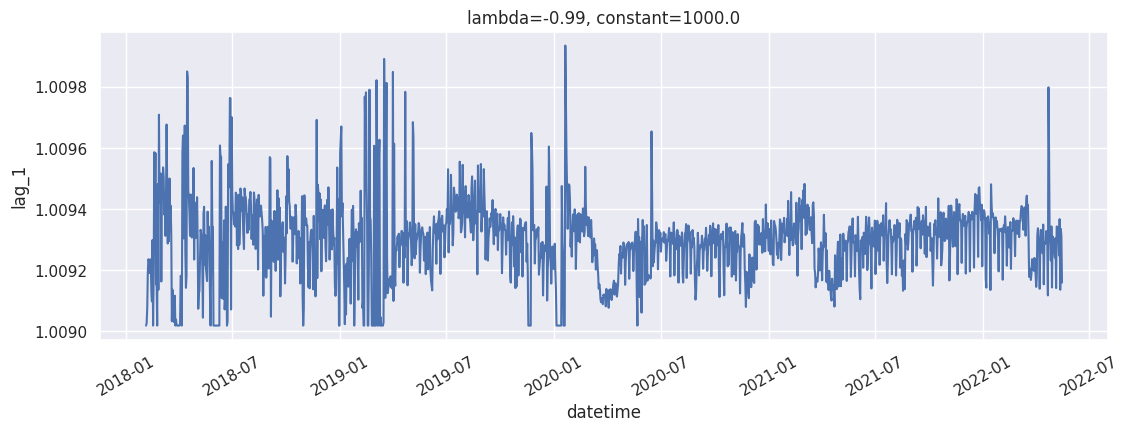

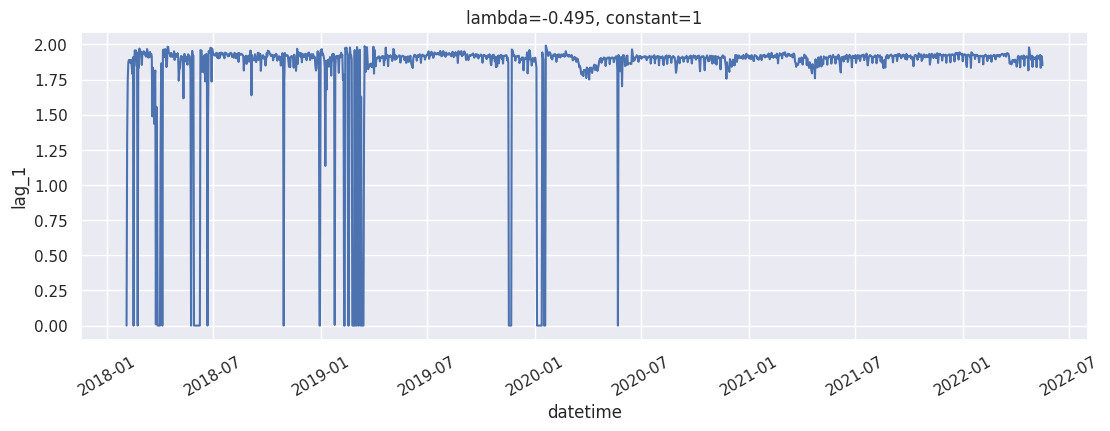

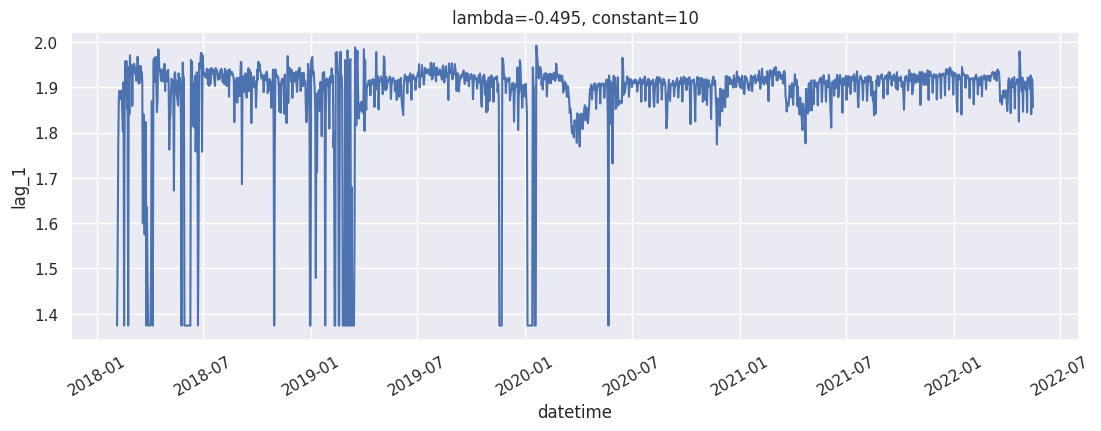

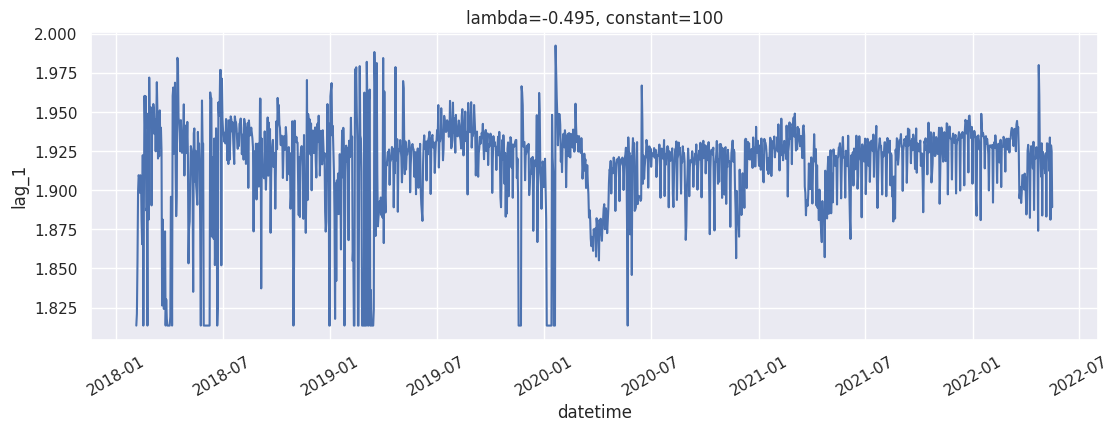

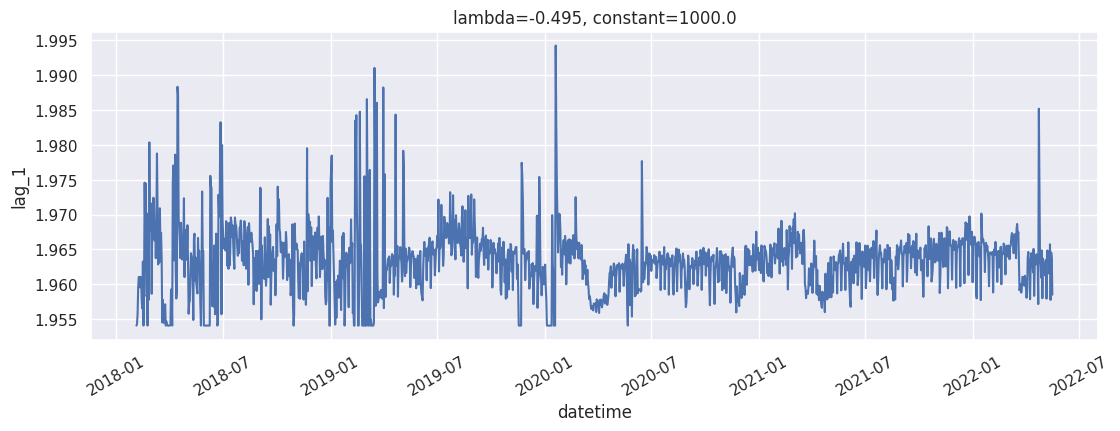

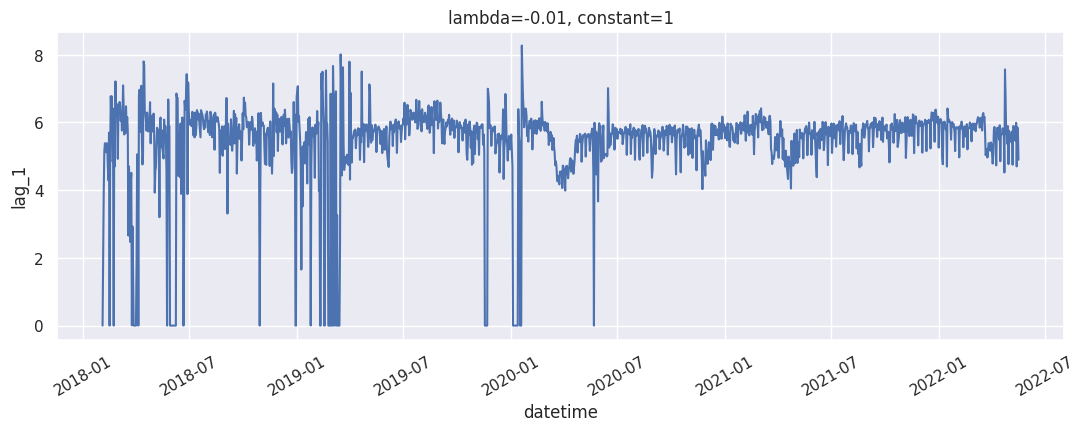

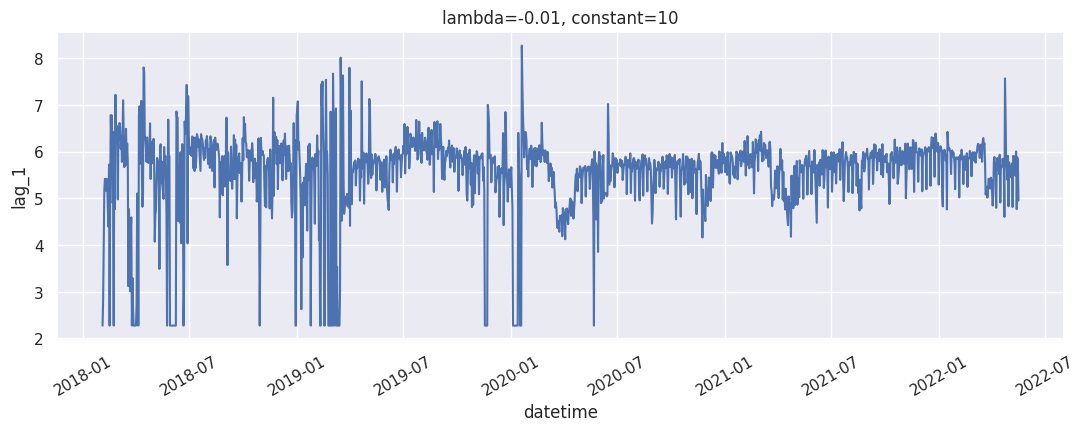

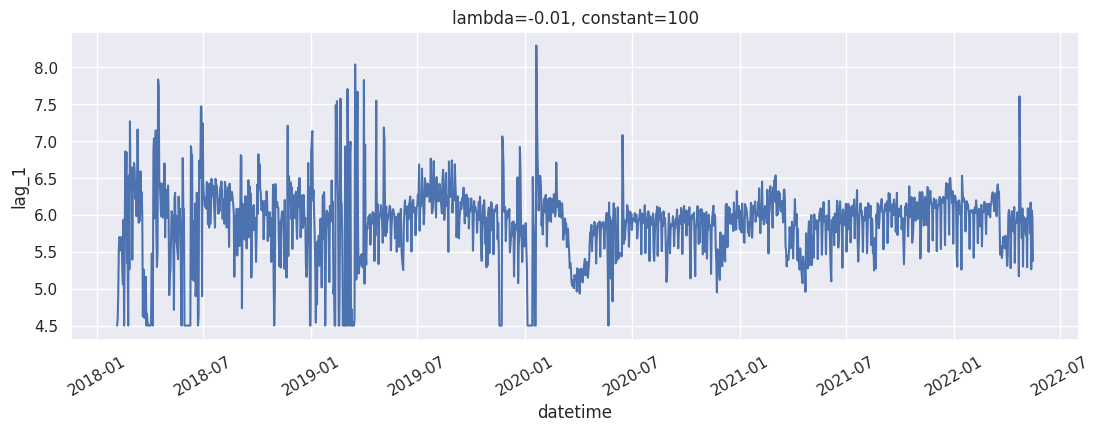

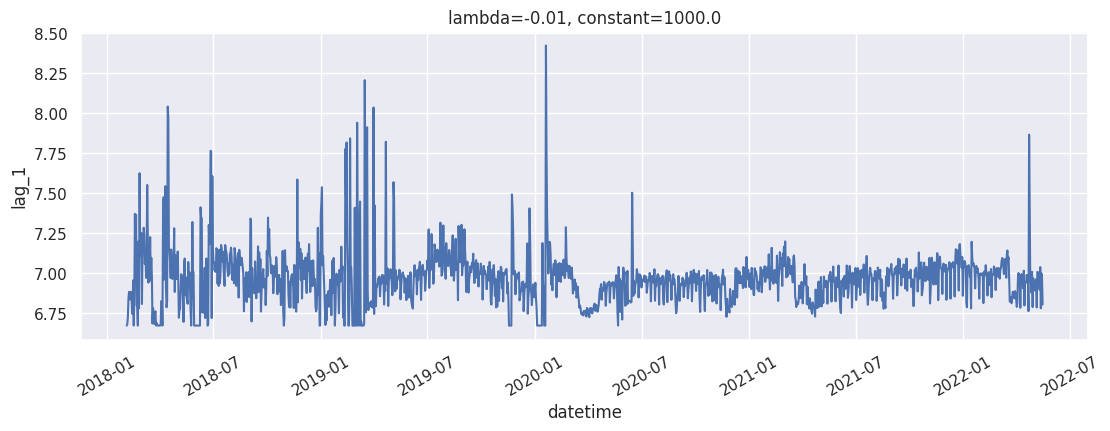

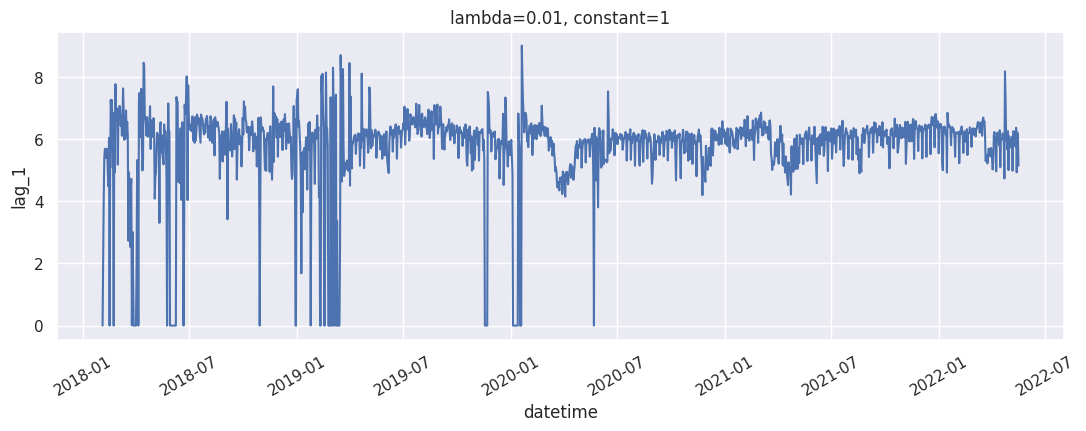

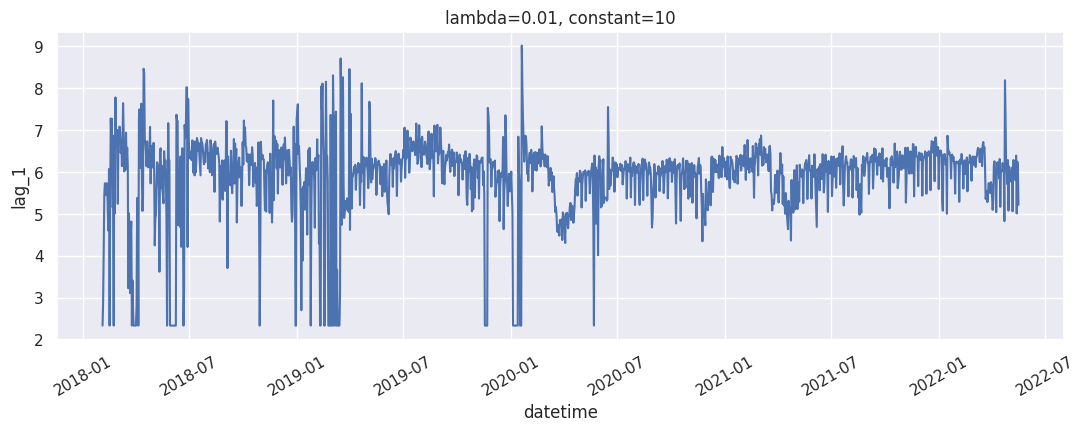

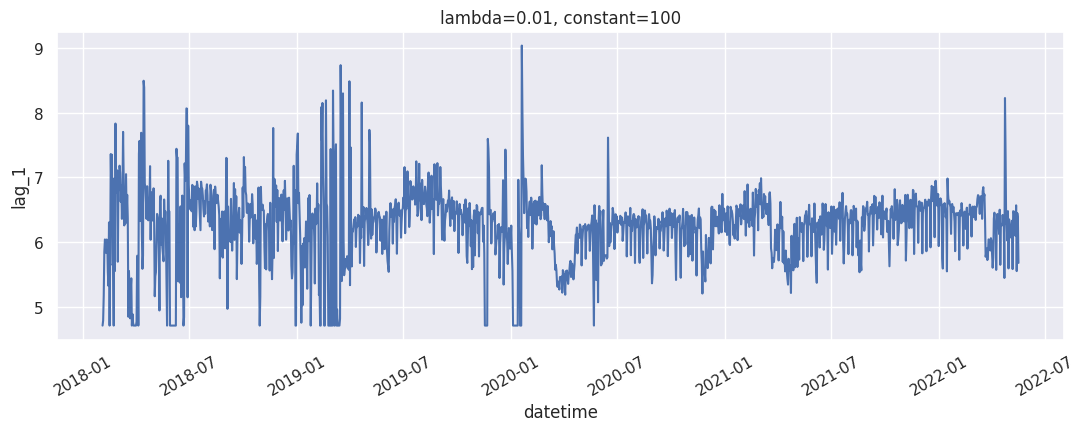

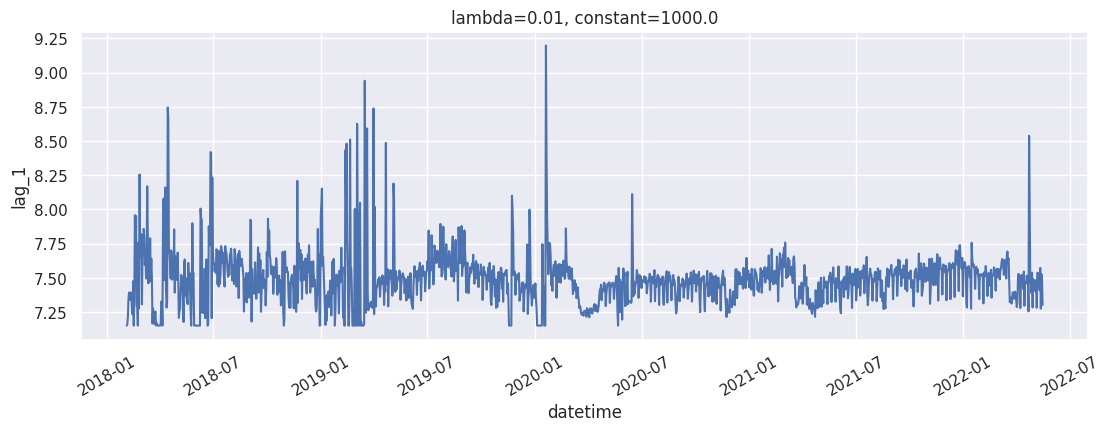

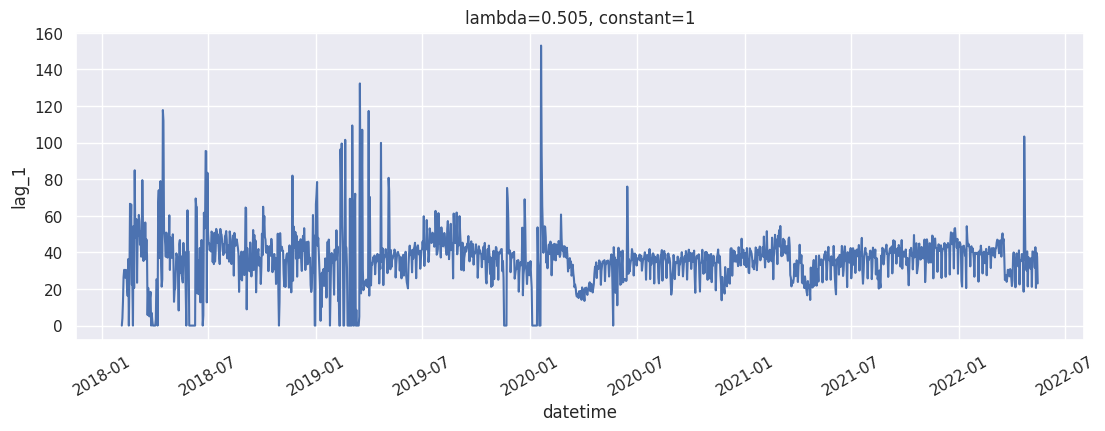

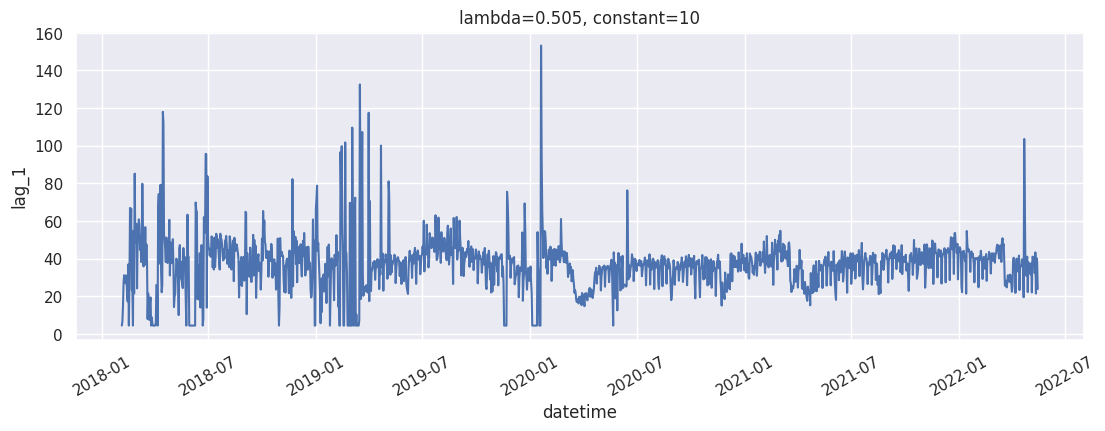

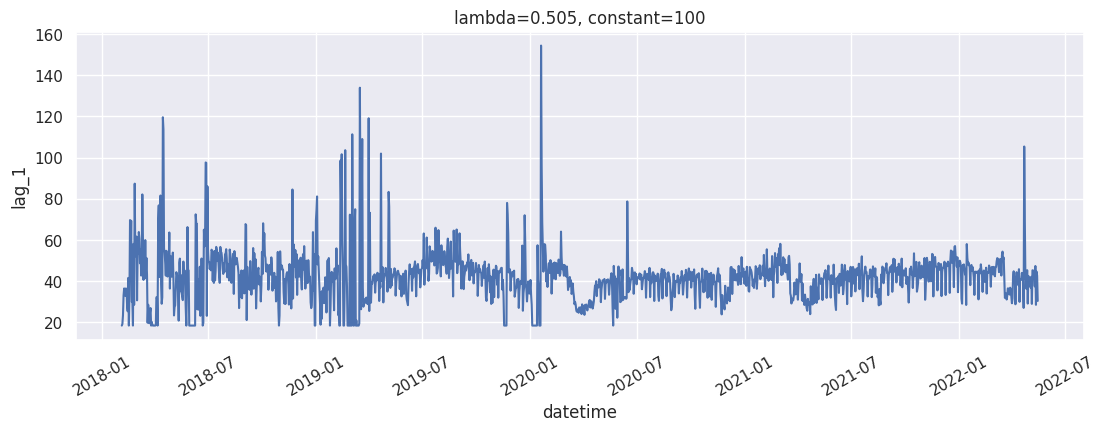

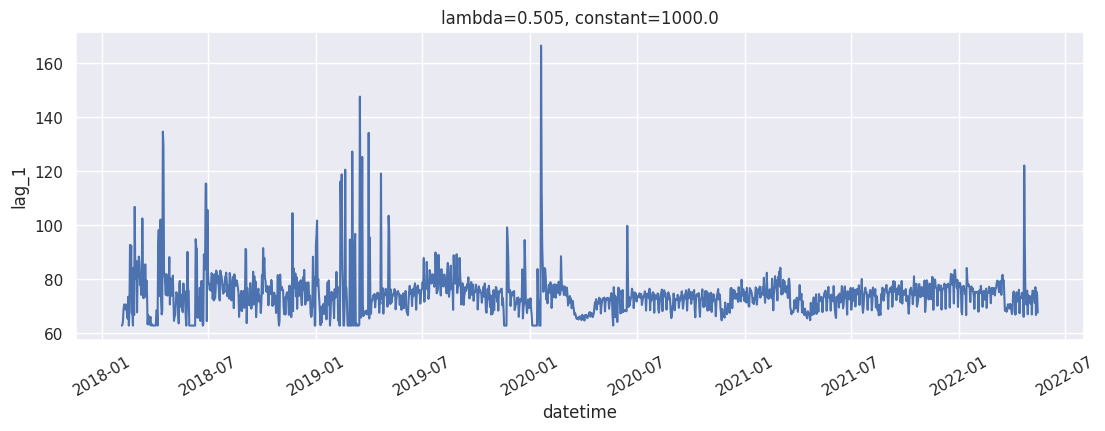

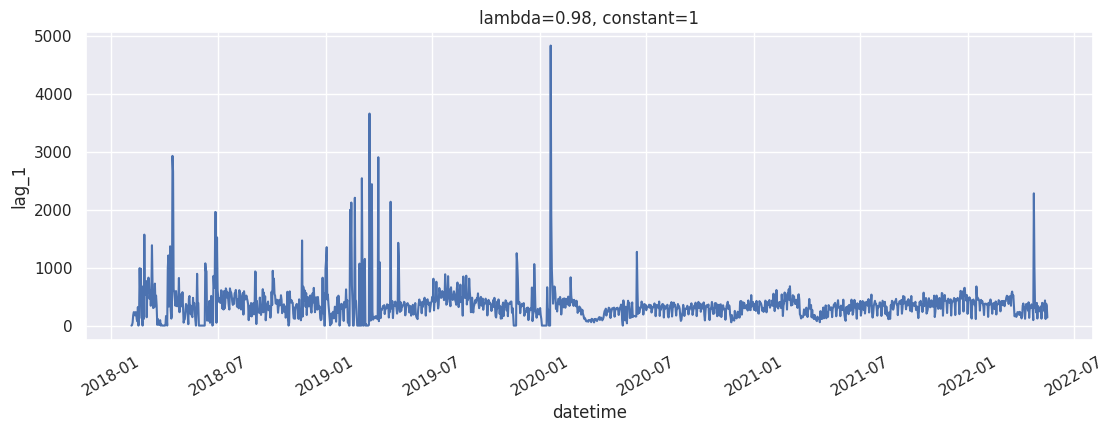

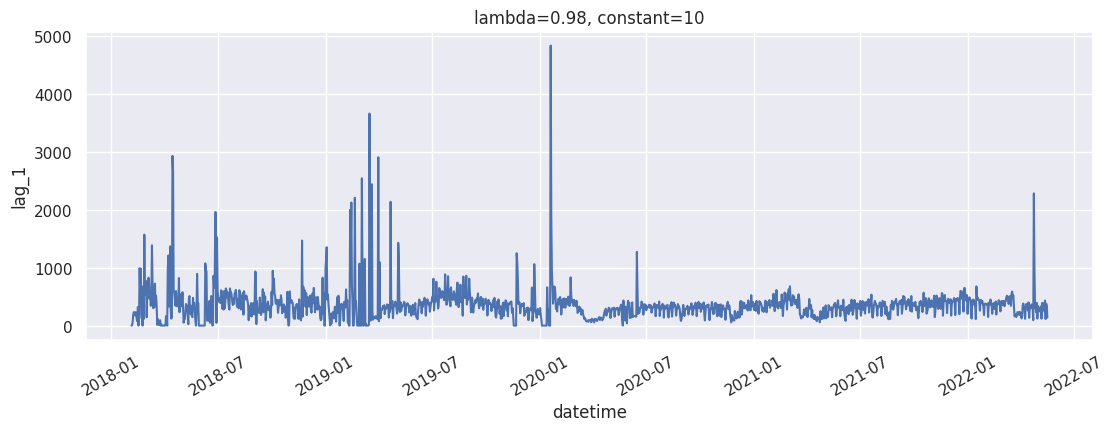

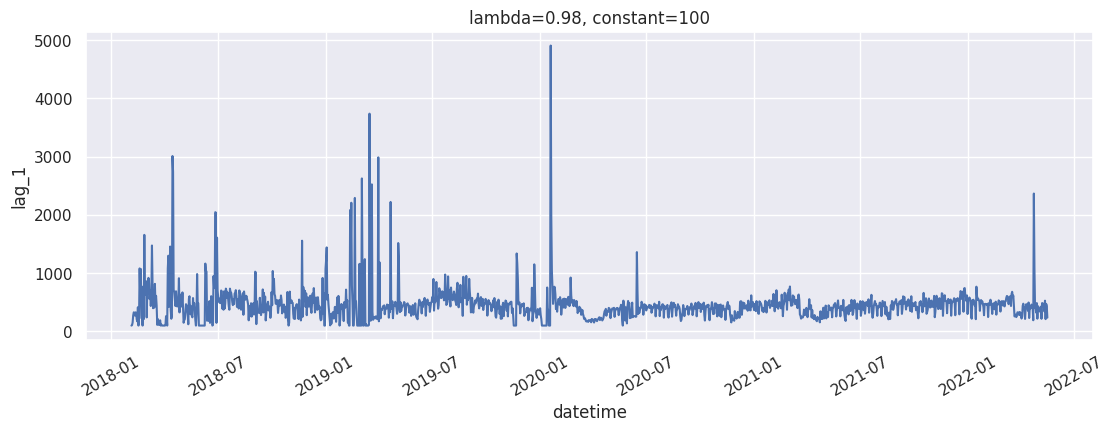

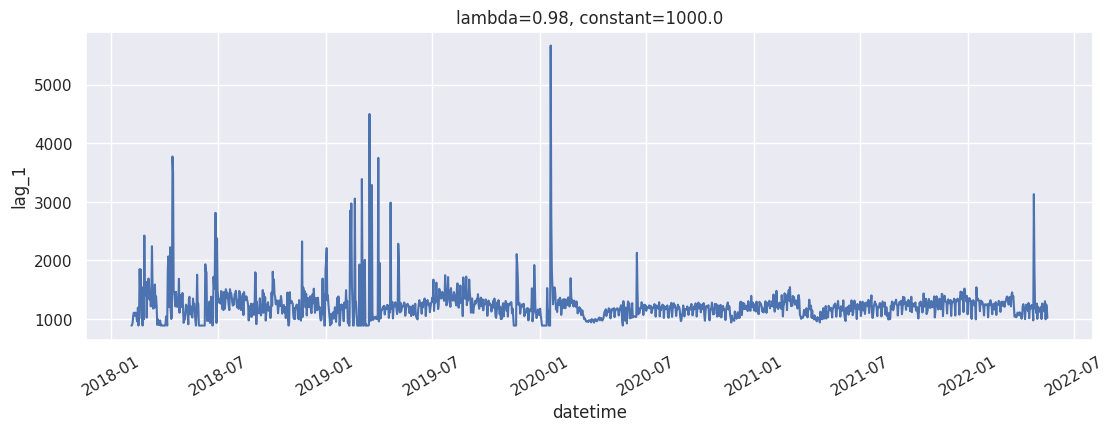

In [ ]:
lambdies = [
            -0.99, 
            -0.495, 
            -0.01, 
            0.01, 
            0.505, 
            0.98,
            ]
constants = [
             1, 
             10, 
             100,
             1000.
             ]

plt.style.use('default')

sns.set(rc={"figure.figsize":(13, 4)})

daily_consumption = df_consumption.resample('D')["lag_1"].sum()

for lambdy in lambdies:
    for constant in constants:
        graph_data = boxcox(daily_consumption + constant, lmbda = lambdy)
        graph_data = pd.DataFrame(graph_data, 
                                  index=daily_consumption.index)
        graph_data.columns = ["lag_1"]
        plt.xticks(rotation=30)

        
        ax = sns.lineplot(data=graph_data, x = 'datetime', 
                    y='lag_1', palette='viridis');
        
        plt.title(f"lambda={lambdy}, constant={constant}")
        plt.pause(0.0001)
        # plt.clf()

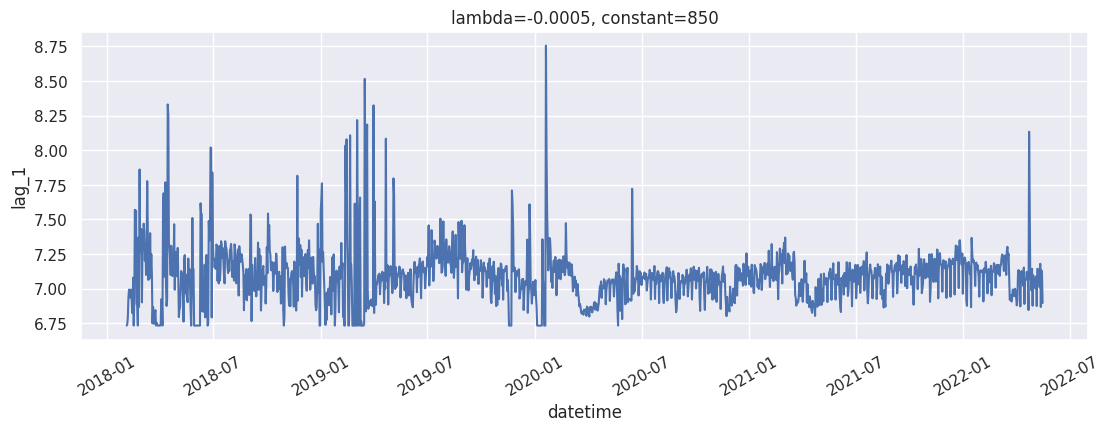

In [ ]:
constant = 850
lambdy = -0.0005

graph_data = boxcox(daily_consumption + constant, lmbda = lambdy)
graph_data = pd.DataFrame(graph_data, 
                            index=daily_consumption.index)

graph_data.columns = ["lag_1"]
plt.xticks(rotation=30)

ax = sns.lineplot(data=graph_data, x = 'datetime', 
            y='lag_1', palette='viridis');

plt.title(f"lambda={lambdy}, constant={constant}");

<div style="alert alert-info"> Make it more beautiful by introducting sub plots!

$$x ↦ \log(x ^{-\frac{5}{3}} + 11)$$

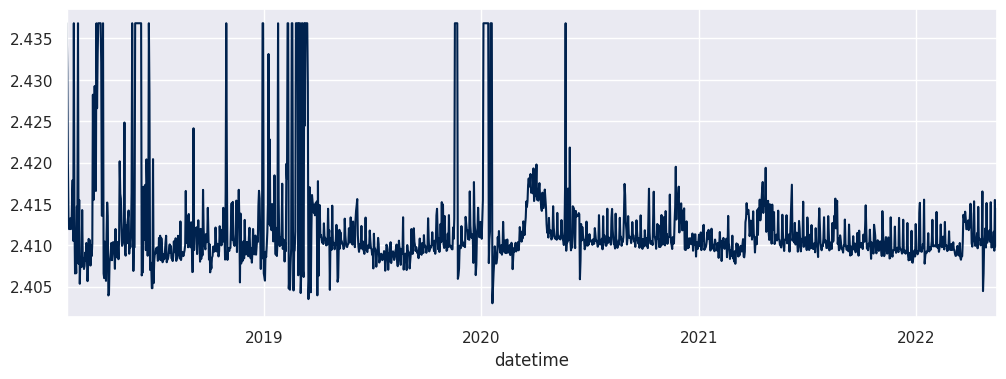

In [ ]:
np.log((df_consumption.resample('D')["lag_1"].sum() + 12) ** (-1/3) + 11).plot(figsize=(12,4),
                                                 colormap='cividis');

In [ ]:
daily_consumption = df_consumption.resample('D')["lag_1"].sum()
hourly_consumption = df_consumption.resample('1H')["lag_1"].sum()
# daily_consumption.to_csv()

### For Major Units

What do we mean by major units?
```Python
major_units = df.unit.value_counts().index[(df.unit.value_counts() > 80000)].tolist()
```

In [ ]:
major_df = df[df.unit.isin(major_units)][["consumption", "unit"]]
major_df['difference'] = major_df.groupby(['unit'])['consumption'].diff().fillna(0)
major_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042345 entries, 2018-02-06 19:22:00 to 2022-05-16 20:08:00
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   consumption  1042345 non-null  float64
 1   unit         1042345 non-null  int64  
 2   diff         1042345 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 31.8 MB


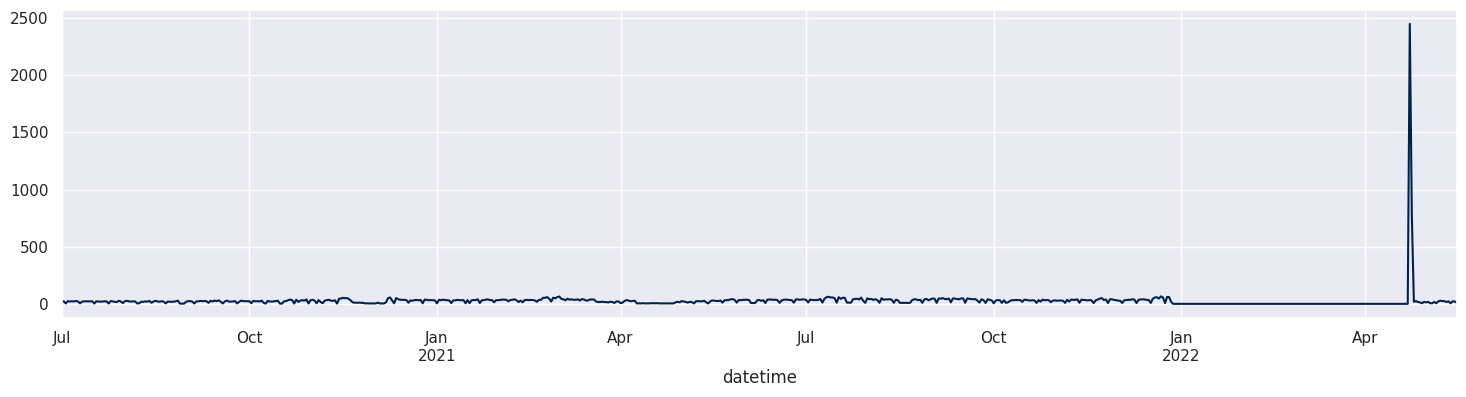

In [ ]:
major_df.index = pd.DatetimeIndex(major_df.index)
major_df[major_df.index >= '2020-07-01'].\
resample('24H')["difference"].sum().plot(figsize=(18,4),
                                   colormap='cividis');

Here we consider the total consumption of all major units:

In [ ]:
major_df = major_df[major_df.index >= '2020-07-01'].resample('24H')["difference"].sum()

In [ ]:
major_df

datetime
2020-07-01   21.943
2020-07-02   22.086
2020-07-03    3.459
2020-07-04   23.849
2020-07-05   19.982
              ...  
2022-05-12   21.966
2022-05-13    5.079
2022-05-14   22.489
2022-05-15   20.187
2022-05-16   12.638
Freq: 24H, Name: diff, Length: 685, dtype: float64

### Decomposition

In [ ]:
daily_consumption = df_consumption[df_consumption.index >= '2020-07'].resample('24H')["lag_1"].sum()

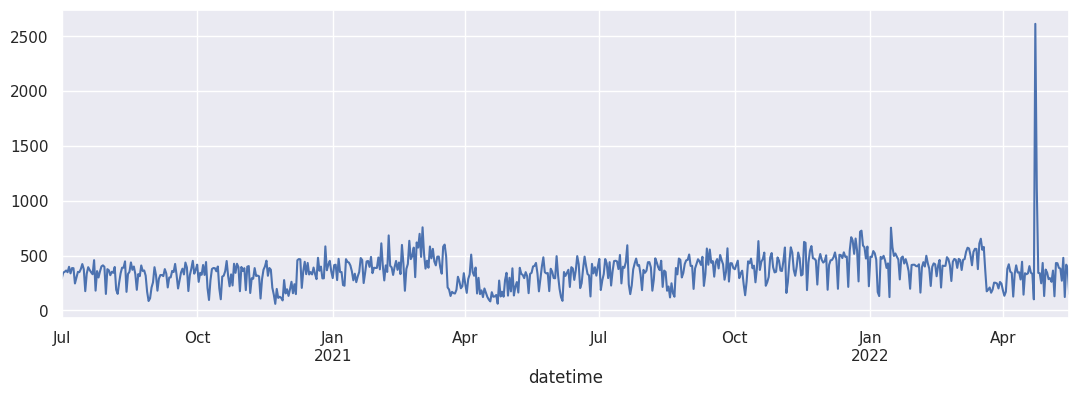

In [ ]:
daily_consumption.plot();

#### Additive Modeling

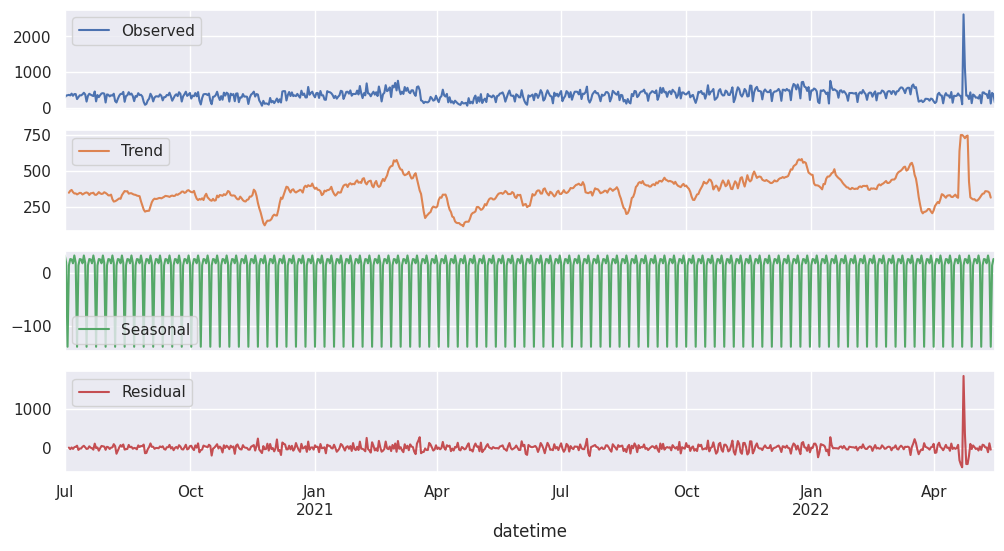

In [ ]:
decomposition = seasonal_decompose(daily_consumption, model='additive');
decomposition = pd.concat(
    [
     decomposition.observed,
     decomposition.trend,
     decomposition.seasonal,
     decomposition.resid
    ],
    axis = 1
)
decomposition.columns = ["Observed", "Trend", "Seasonal", "Residual"]
decomposition.plot(figsize=(12,6), subplots=True);

#### Multiplicative Modeling

This one gives us this error:
```Python
ValueError: Multiplicative seasonality is not appropriate for zero and negative values
```

In [ ]:
graph_data.index.min(), graph_data.index.max()

(Timestamp('2018-02-04 00:00:00', freq='D'),
 Timestamp('2022-05-16 00:00:00', freq='D'))

In [ ]:
graph_data

lag_1
datetime         
2018-02-04  6.734
2018-02-05  6.743
2018-02-06  6.797
2018-02-07  6.939
2018-02-08  6.994
...           ...
2022-05-12  7.180
2022-05-13  6.868
2022-05-14  7.132
2022-05-15  7.098
2022-05-16  6.897

[1563 rows x 1 columns]

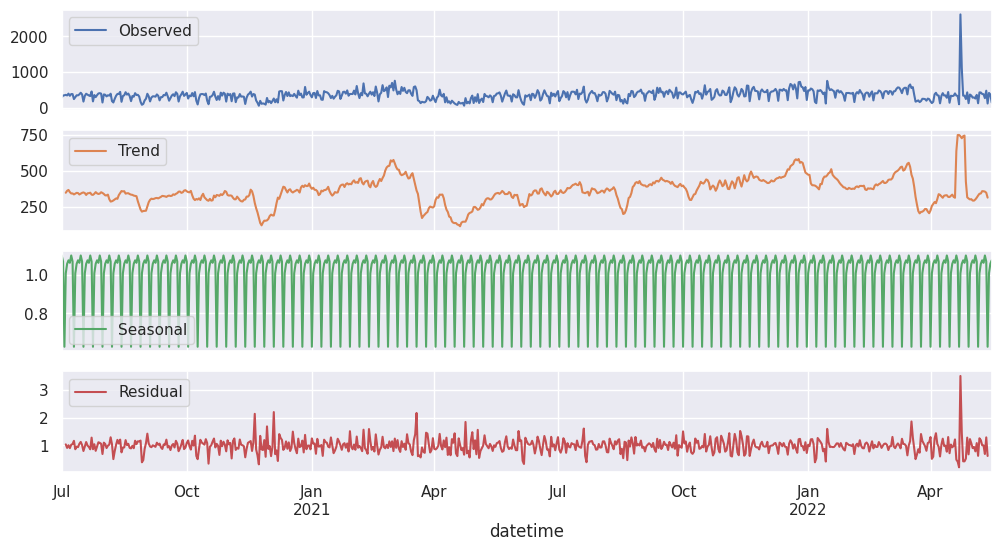

In [ ]:
constant = 850
lambdy = -0.0005

transformed_daily = pd.DataFrame(boxcox(daily_consumption + \
                                        constant, lmbda = lambdy),
                                 index=daily_consumption.index)

# or
transformed_daily = daily_consumption 

transformed_daily.index = pd.DatetimeIndex(transformed_daily.index)

decomposition = seasonal_decompose(transformed_daily, model='multiplicative',);
decomposition = pd.concat(
    [
     decomposition.observed,
     decomposition.trend,
     decomposition.seasonal,
     decomposition.resid
    ],
    axis = 1
)
decomposition.columns = ["Observed", "Trend", "Seasonal", "Residual"]
decomposition.plot(figsize=(12,6), subplots=True);

## Heatmaps To Check Correlations



### Creating Heatmap of Electricity Usage by Days of the Week

Text(0.5, 1.0, 'Heatmap - by Day of Week')

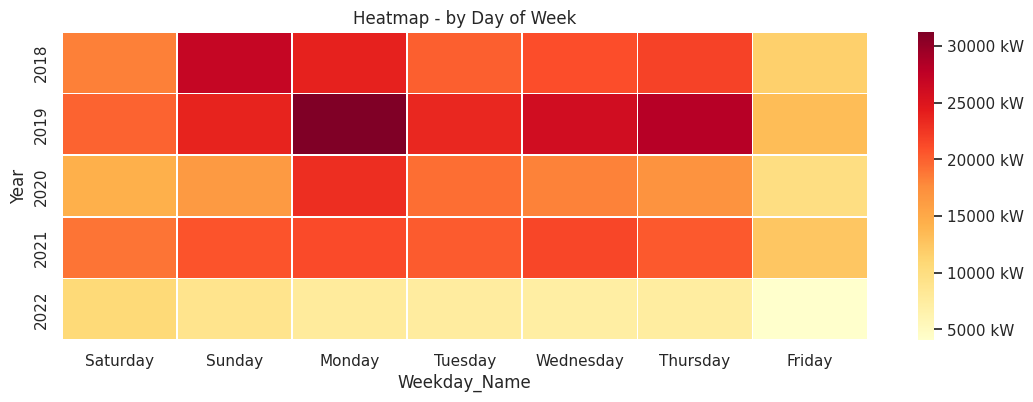

In [ ]:
# Create new dataset for heatmap
heatmap_data = pd.DataFrame(df_consumption).copy()

# First we need to add weekdays as a column
heatmap_data['Weekday_Name'] = df_consumption.index.day_name()

# Next we add the year as column and group the 
# data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 
                                     'Weekday_Name']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# We drop off some years where they're not a full year
# heatmap_data = heatmap_data[heatmap_data['Year'] != 2018]
# heatmap_data = heatmap_data[heatmap_data['Year'] != 2022]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', 
                                  columns='Weekday_Name', 
                                  values='lag_1')

# Reorder columns
heatmap_data = heatmap_data[['Saturday', 
                             'Sunday',
                             'Monday', 
                             'Tuesday', 
                             'Wednesday', 
                             'Thursday', 
                             'Friday',]]

# Visualise electricity load via Heatmap

sns.heatmap(heatmap_data, linewidths=.5, 
            cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f kW'}).\
            set_title('Heatmap - by Day of Week')

### Heatmap For Hourly Data

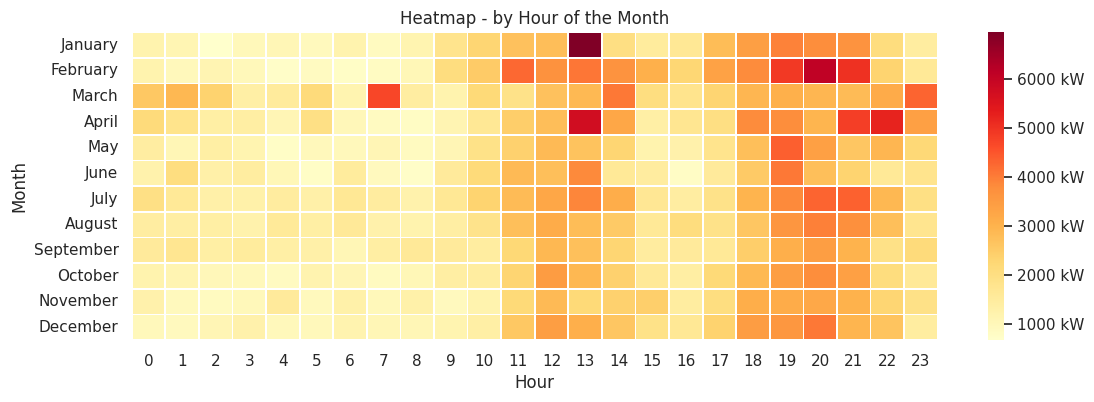

In [ ]:
# This is for obtaining month names
import calendar

# Starting over
heatmap_data = pd.DataFrame(df_consumption).copy()

# First we need to add hours as a column
heatmap_data['Hour'] = df_consumption.index.hour

# Next we add the year as column and group the 
# data up to annual day of week level
heatmap_data['Month'] =  heatmap_data.index.month_name()
heatmap_data = heatmap_data.groupby(['Month', 
                                     'Hour']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# # We drop off some years where they're not a full year
# heatmap_data.index = pd.DatetimeIndex(heatmap_data.index)
# heatmap_data = heatmap_data[heatmap_data.index.year != 2018]
# heatmap_data = heatmap_data[heatmap_data.index.year != 2022]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Month', 
                                  columns='Hour', 
                                  values='lag_1')

# Reordering rows
heatmap_data = heatmap_data.loc[list(calendar.month_name[1:])]


# Visualise electricity load via Heatmap

sns.heatmap(heatmap_data, linewidths=.5, 
            cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f kW'}).\
            set_title('Heatmap - by Hour of the Month');

### Heatmap For Monthly Data Over Years

Text(0.5, 1.0, 'Heatmap - by Month of the Year')

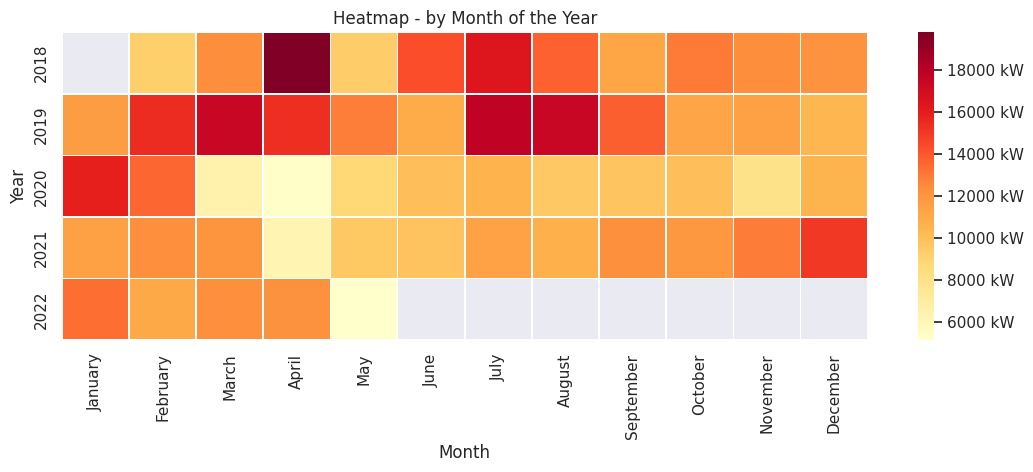

In [ ]:
# Starting over
heatmap_data = pd.DataFrame(df_consumption).copy()

# First we need to add hours as a column
heatmap_data['Month'] = df_consumption.index.month_name()

# Next we add the year as column and group the 
# data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Month', 
                                     'Year']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# We drop off some years where they're not a full year
heatmap_data.index = pd.DatetimeIndex(heatmap_data.index)
# heatmap_data = heatmap_data[heatmap_data.index.year != 2018]
# heatmap_data = heatmap_data[heatmap_data.index.year != 2022]

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', 
                                  columns='Month', 
                                  values='lag_1')


# Reordering columns
heatmap_data = heatmap_data[list(calendar.month_name[1:])]

# Visualise electricity load via Heatmap

sns.heatmap(heatmap_data, linewidths=.5, 
            cmap='YlOrRd', cbar=True, 
            cbar_kws={"format": '%1.0f kW'}).\
            set_title('Heatmap - by Month of the Year')

### Ignoring Earlier Data

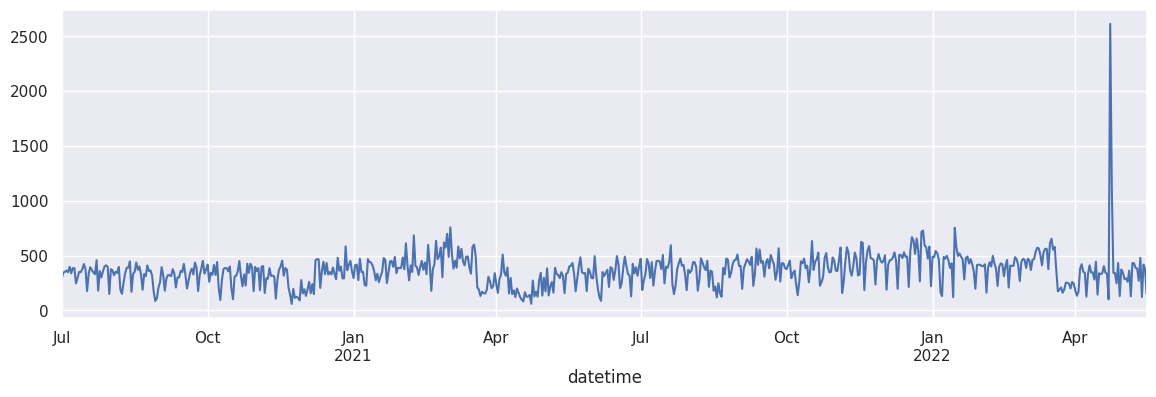

In [ ]:
daily_consumption[daily_consumption.index > '2020-06-30'].plot(figsize=(14,4));

That spike at the end can be really tough to handle! We obviously need more inspection to check why something like that happened.

In [ ]:
daily_ignored = daily_consumption[daily_consumption.index > '2020-07']

NameError: ignored

In [ ]:
graph_data = df_consumption.resample("1H")["lag_1"].sum()
graph_data.head(1)

datetime
2018-02-04 19:00:00   0.000
Freq: H, Name: lag_1, dtype: float64

In [ ]:
# !pip install --upgrade plotly -q

# import plotly.express as px

fig = px.line(graph_data)
fig.show()

## Adding Useful Features

<font size="3px" color='green'> 
### Time Features (Farsi)
We'll start with time features which are all available using our single `jdatetime` column.
In particular, jalali features. </font>

In [ ]:
# takes ~3 minutes to run
df.jdatetime = df.jdatetime.apply(lambda x: 
                                  jdatetime.datetime.strptime(x[:-3], 
                                                    '%Y-%m-%d %H:%M'))

In [ ]:
# Heavy computations ahead!
%%time
df["jquarter"] = df.jdatetime.jalali.quarter
df["jday"] = df.jdatetime.jalali.day
df["jmonth"] = df.jdatetime.jalali.month # .month()
df["jdow"] = df.jdatetime.jalali.weekday  # .weekday() for a jdatetime obj
df["jdoy"] = df.jdatetime.apply(lambda x: (x.yday()))
df["jwoy"] = df.jdatetime.apply(lambda x: x.weeknumber())
df["hour"] = df.jdatetime.apply(lambda x: x.hour)

CPU times: user 2min 30s, sys: 553 ms, total: 2min 31s
Wall time: 2min 32s


## Queries to Answer Questions

Try to think of interesting questions:

What is the average consumed hours for each day of the week for this `unit`?

What's the average consumed hours for each month of the year for a given `unit`?

<font color="orange">For each `unit`, how many big gaps (say more than 4 hours) are there between recordings? Among those gaps show the 10 most biggest gaps as well as their exact `datetime` happened?</font>

In [ ]:
cutoff = '2020-07'

df_consumption[df_consumption.index > cutoff].reset_index().to_csv(MAIN_PATH + f"df_{cutoff}.csv", 
                                                                   index=False)

# Data Preparation

Considering that a large portion of the building are vacant units, especially in the beginning of smart reading electricity loads, we ignore informations older than `2020-7` and will further our study in this period onward:d

In [ ]:
cutoff = '2020-07'

df = pd.read_csv(MAIN_PATH + f"df_{cutoff}.csv", low_memory=False,)
df.set_index("datetime", inplace=True)
df.index = pd.DatetimeIndex(df.index)
df.rename(columns={"lag_1":"difference"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2470925 entries, 2020-07-01 00:17:00 to 2022-05-16 18:03:00
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   consumption  float64
 1   unit         int64  
 2   difference   float64
dtypes: float64(2), int64(1)
memory usage: 75.4 MB


## Daily & Hourly Consumptions

After days of evaluation, we conclude that the best time step for this analysis might be `"D1"` since it results in nicer pattern. Also considering the emptiness of majority of units in this building, it can

In [ ]:
df_hourly = df["difference"].resample("H").sum()
df_daily = df["difference"].resample("1D").sum()

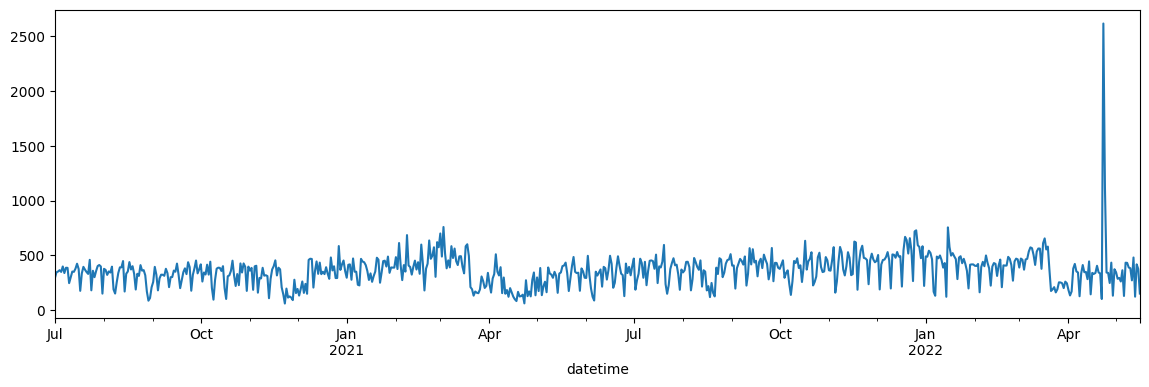

In [ ]:
plt.style.use("default")
df_daily.plot(kind="line", figsize=(14, 4));

In [ ]:
fig = px.line(df_hourly)
fig.show()

From Above plots, we see that dates `2022-04-23` and `2022-04-24` are troublesome, as for `hourly_data`, the time between `18:00`-`23:59` on April 23rd and the time of `01:00` on 24th show some inconsistency.

The problem of that spike (happened in `2022-04-23` and `2022-04-24`) in the <font color="darkpink">daily</font> and <font color="darkpink">hourly</font> data:

In [ ]:
outlier_dates = ["2022-04-23", "2022-04-24"]
outlier_datetimes = ["2022-04-23 18:00", "2022-04-23 19:00", "2022-04-23 20:00", 
                     "2022-04-23 21:00", "2022-04-23 22:00", "2022-04-23 23:00", 
                     "2022-04-24 01:00"]

In [ ]:
datetime.datetime(2022, 4, 3, 23, 4).strftime("%Y-%m-%d %H:%M:%S")
## >>> '2022-04-03 23:04:00'
datetime.datetime.fromisoformat("2022-04-23 23:04")
## >>> datetime.datetime(2022, 4, 23, 23, 4)

datetime.datetime(2022, 4, 23, 23, 4)

In [ ]:
# I replace the outlier value with the mean of their corresponding 
# values from 2 weeks earlier & 2 weeks later 
n_elements = 2

for datestr in outlier_dates:
    elements = []
    for i in range(n_elements):
        # get the value of the previous week's day
        elements.append(df_daily[
                                 (datetime.datetime.fromisoformat(datestr) -\
                                  datetime.timedelta(days=7*(i + 1))).strftime("%Y-%m-%d")
        ])
        # get the value of the next  week's day
        elements.append(df_daily[
                                 (datetime.datetime.fromisoformat(datestr) +\
                                  datetime.timedelta(days=7*(i + 1))).strftime("%Y-%m-%d")
        ])
    # getting the average over these days
    df_daily[datestr] = sum(elements) / len(elements)

for datetimestr in outlier_datetimes:
    elements = []
    for i in range(n_elements):
        # get the value of the previous week's day's hour
        elements.append(df_daily[
                                 (datetime.datetime.fromisoformat(datestr) -\
                                  datetime.timedelta(days=7*(i + 1))).strftime("%Y-%m-%d %H:%M:%S")
        ])
        # get the value of the next  week's day's hour
        elements.append(df_daily[
                                 (datetime.datetime.fromisoformat(datestr) +\
                                  datetime.timedelta(days=7*(i + 1))).strftime("%Y-%m-%d %H:%M:%S")
        ])
    df_hourly[datetimestr] = sum(elements) / len(elements)

`df_daily['2022-04-23'], df_daily['2022-04-24'] = (379.69437500000043, 369.5302499999986)`

## Checking Autocorrelation Plots

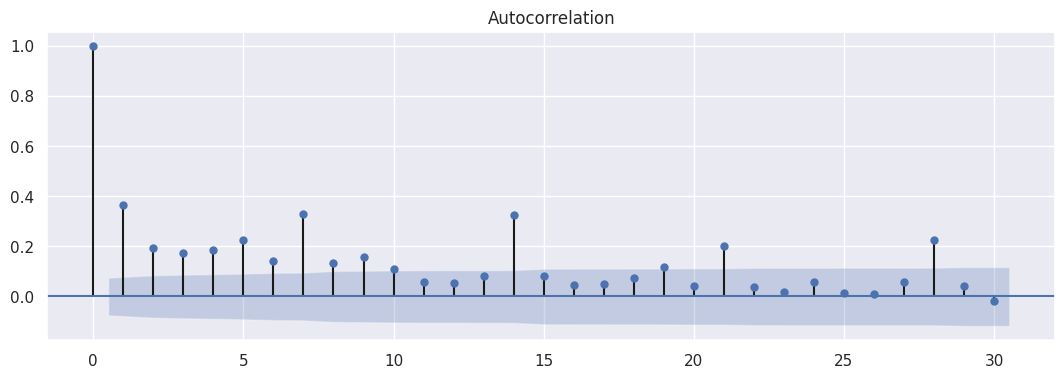

In [ ]:
plot_acf(df_daily, lags=30);
plt.show()

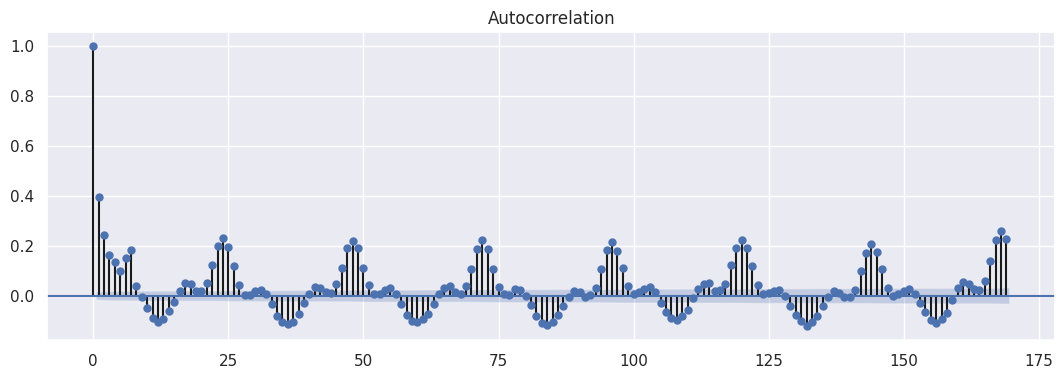

In [ ]:
plot_acf(df_hourly, lags=7 * 24 + 1,);
plt.show()

# Modeling (Forecasting)


In [ ]:
df = df_daily # or pd.read_csv("")
models_performance = {} # joblib, pickle, etc.

## Preprocessing

### External Data Source: Getting Weather Data

In [ ]:
df.index.min(), df.index.max()

(Timestamp('2020-07-01 00:00:00'), Timestamp('2022-05-16 00:00:00'))

In [ ]:
# # Set time period
# start = datetime.datetime(2018, 2, 4, 0, 0)
# end = datetime.datetime(2022, 5, 20, 23, 59)

# # Create Point for Qazvin
# qazvin = Point(LAT, LON)

# # Get daily and hourly data from Jan 1st 2018 up to now
# hourly_data = Hourly(qazvin, start, end)
# daily_data = Daily(qazvin, start, end)

# # hourly_data = hourly_data.normalize() # ridiculuously enough this does worse to the data :(
# # hourly_data = hourly_data.interpolate()

# daily_data = daily_data.normalize() # but for daily data, it's doing fine
# daily_data = daily_data.interpolate()

# hourly_data = hourly_data.fetch()
# daily_data = daily_data.fetch()

# hourly_data.drop(columns=["prcp", "snow", "wpgt",
#                   "tsun", "coco"], inplace=True)

# daily_data.drop(columns=["wpgt", "tsun"], inplace=True)

# daily_data.to_csv(WEATHER_DAILY, index=False)
# hourly_data.to_csv(WEATHER_HOURLY, index=False)

weather_daily = pd.read_csv(WEATHER_DAILY, index_col="time")
weather_hourly = pd.read_csv(WEATHER_HOURLY, index_col="time")

In [ ]:
# converting their index into proper format
weather_daily.index = pd.DatetimeIndex(weather_daily.index)
weather_hourly.index = pd.DatetimeIndex(weather_hourly.index)

In [ ]:
weather_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1604 entries, 2018-01-01 to 2022-05-23
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    1604 non-null   float64
 1   tmin    1604 non-null   float64
 2   tmax    1604 non-null   float64
 3   prcp    1604 non-null   float64
 4   snow    98 non-null     float64
 5   wdir    1491 non-null   float64
 6   wspd    1601 non-null   float64
 7   pres    1593 non-null   float64
dtypes: float64(8)
memory usage: 112.8 KB


In [ ]:
weather_daily.isnull().sum() / weather_daily.shape[0] * 100

tavg     0.000000
tmin     0.000000
tmax     0.000000
prcp     0.000000
snow    93.890274
wdir     7.044888
wspd     0.187032
pres     0.685786
dtype: float64

In [ ]:
# handling missing value
weather_daily[["wdir", 
               "wspd", 
               "pres"]] = weather_daily[["wdir", 
                                         "wspd", 
                                         "pres"]].interpolate()
weather_daily.snow = weather_daily.snow.isnull().astype(int)

In [ ]:
weather_daily.isnull().sum() / weather_daily.shape[0] * 100

tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
snow    0.0
wdir    0.0
wspd    0.0
pres    0.0
dtype: float64

In [ ]:
df = df.to_frame()
print(df.shape)
df.info()

(685, 1)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 685 entries, 2020-07-01 to 2022-05-16
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lag_1   685 non-null    float64
dtypes: float64(1)
memory usage: 26.9 KB


In [ ]:
weather_daily.merge(df, left_index=True, right_index=True)

tavg  tmin  tmax  prcp  snow   wdir   wspd    pres     lag_1
2020-07-01  24.3  14.2  33.5   0.0     1  297.0   7.60  1006.0  290.7183
2020-07-02  23.3  14.8  32.4   0.0     1  323.0   6.70  1008.6  344.4766
2020-07-03  24.1  13.0  34.7   0.0     1  284.0   6.65  1010.5  352.0815
2020-07-04  25.9  16.9  35.0   0.0     1  171.0   6.60  1009.4  364.3651
2020-07-05  25.6  18.0  33.1   0.0     1  241.0   7.90  1006.6  348.6706
...          ...   ...   ...   ...   ...    ...    ...     ...       ...
2022-05-12  16.1   8.0  25.3   0.0     1  287.0   7.90  1016.0  480.0660
2022-05-13  14.5   8.0  21.4   0.0     1  319.0   7.00  1017.6  122.6575
2022-05-14  16.1   4.8  25.0   0.0     1  141.0   6.70  1020.3  417.7365
2022-05-15  20.9   9.5  29.8   0.0     1   66.0   7.40  1018.1  374.8470
2022-05-16  23.2  15.0  32.7   0.0     1  300.0  14.60  1012.9  150.9293

[685 rows x 9 columns]

In [ ]:
df = df.merge(right=weather_daily, left_index=True, right_index=True)

In [ ]:
weather_hourly.isnull().sum() / df_hourly.shape[0] * 100

temp    1.216767
dwpt    1.216767
rhum    1.216767
wdir    8.054998
wspd    3.175762
pres    4.246517
dtype: float64

In [ ]:
weather_hourly = weather_hourly.interpolate()

In [ ]:
weather_hourly.isnull().sum() / df_hourly.shape[0] * 100

temp    0.0
dwpt    0.0
rhum    0.0
wdir    0.0
wspd    0.0
pres    0.0
dtype: float64

In [ ]:
# just renaming the column lag_1
df.rename(columns={"lag_1": "difference"}, inplace=True)

No handles with labels found to put in legend.


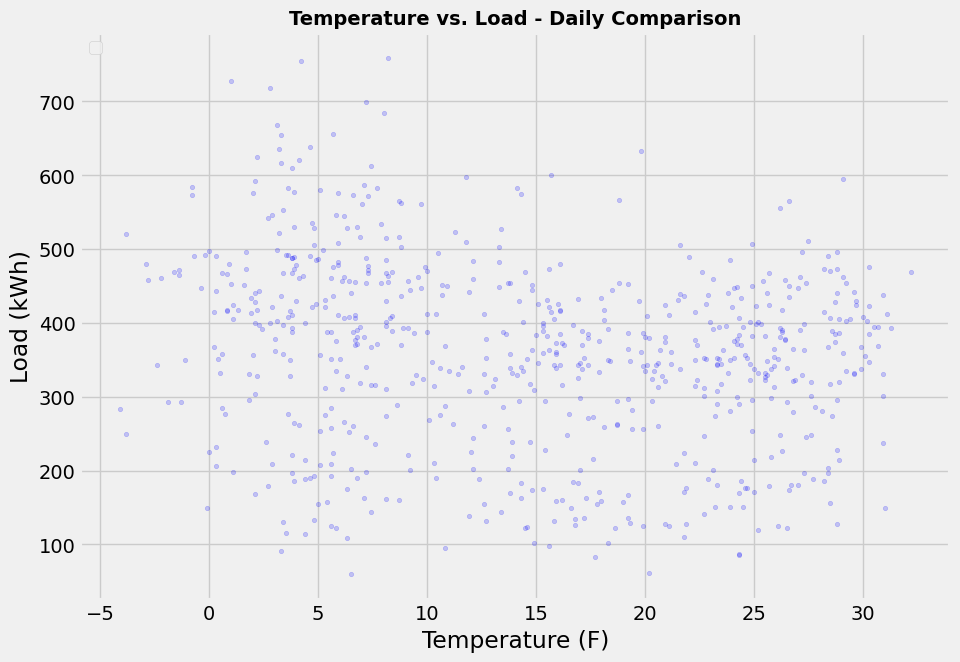

In [ ]:
# Plotting general temp-load relationship.

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

plt.scatter(df.tavg ,df.difference, alpha = 0.2, s=10, c='b')

ax.set_title("Temperature vs. Load - Daily Comparison", fontsize =14, fontweight='bold')
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Load (kWh)")

leg = plt.legend(frameon = True, loc = 'upper left', ncol =2, fontsize = 12)

In [ ]:
df_hourly.rename(columns={"lag_1": "difference"}, inplace=True)

No handles with labels found to put in legend.


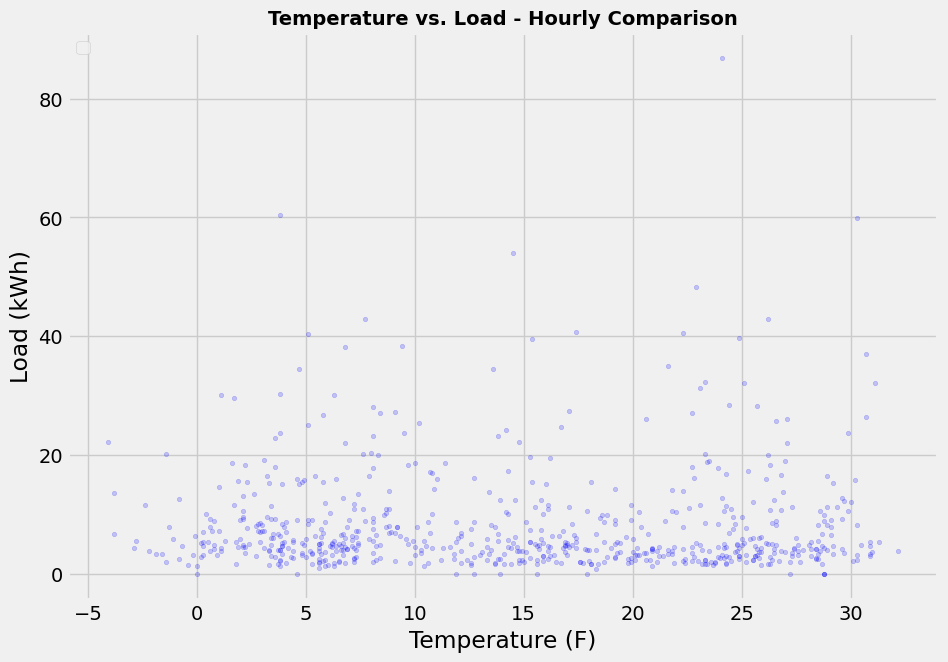

In [ ]:
# Plotting general temp-load relationship.

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

plt.scatter(df_hourly.tavg ,df_hourly.difference, alpha = 0.2, s=10, c='b')

ax.set_title("Temperature vs. Load - Hourly Comparison", fontsize =14, fontweight='bold')
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Load (kWh)")

leg = plt.legend(frameon = True, loc = 'upper left', ncol =2, fontsize = 12)

### External Data Source: Getting Holidays

In [ ]:
holidays = pd.read_csv(HOLIDAYS)
holidays["isHoliday"] = 1
holidays.head(3)

Year        Date   Day_Name                     Name              Type  \
0  2018  2018-02-11     Sunday           Revolution Day  National holiday   
1  2018  2018-02-21  Wednesday      Martyrdom of Fatima  National holiday   
2  2018  2018-03-20    Tuesday  Oil Nationalization Day  National holiday   

   isHoliday  
0          1  
1          1  
2          1

In [ ]:
holidays.set_index("Date", inplace=True)
holidays.index = pd.DatetimeIndex(holidays.index)

In [ ]:
df = df.merge(holidays[["isHoliday"]], how="left", 
              left_index=True, right_index=True)

In [ ]:
# it changes from (x, 9) to (x, 10)
df.shape

(687, 10)

In [ ]:
df.isnull().sum() / df.shape[0]

difference    0.000000
tavg          0.000000
tmin          0.000000
tmax          0.000000
prcp          0.000000
snow          0.000000
wdir          0.000000
wspd          0.000000
pres          0.000000
isHoliday     0.915575
dtype: float64

In [ ]:
df.isHoliday.fillna(0, inplace=True)

In [ ]:
df.isnull().sum() / df.shape[0]

difference    0.0
tavg          0.0
tmin          0.0
tmax          0.0
prcp          0.0
snow          0.0
wdir          0.0
wspd          0.0
pres          0.0
isHoliday     0.0
dtype: float64

In [ ]:
df.head()

difference  tavg  tmin  tmax  prcp  snow   wdir  wspd    pres  \
2020-07-01    290.7183  24.3  14.2  33.5   0.0     1  297.0  7.60  1006.0   
2020-07-02    344.4766  23.3  14.8  32.4   0.0     1  323.0  6.70  1008.6   
2020-07-03    352.0815  24.1  13.0  34.7   0.0     1  284.0  6.65  1010.5   
2020-07-04    364.3651  25.9  16.9  35.0   0.0     1  171.0  6.60  1009.4   
2020-07-05    348.6706  25.6  18.0  33.1   0.0     1  241.0  7.90  1006.6   

            isHoliday  
2020-07-01        0.0  
2020-07-02        0.0  
2020-07-03        0.0  
2020-07-04        0.0  
2020-07-05        0.0

#### Merging with Hourly Data is a Little Tricky!

In [ ]:
df_hourly

difference  tavg  tmin  tmax  prcp  snow   wdir   wspd    pres
2020-07-01      1.7982  24.3  14.2  33.5   0.0     1  297.0   7.60  1006.0
2020-07-02      1.6258  23.3  14.8  32.4   0.0     1  323.0   6.70  1008.6
2020-07-03     86.7860  24.1  13.0  34.7   0.0     1  284.0   6.65  1010.5
2020-07-04      3.6913  25.9  16.9  35.0   0.0     1  171.0   6.60  1009.4
2020-07-05      3.0687  25.6  18.0  33.1   0.0     1  241.0   7.90  1006.6
...                ...   ...   ...   ...   ...   ...    ...    ...     ...
2022-05-12     11.5890  16.1   8.0  25.3   0.0     1  287.0   7.90  1016.0
2022-05-13      5.1584  14.5   8.0  21.4   0.0     1  319.0   7.00  1017.6
2022-05-14     10.9139  16.1   4.8  25.0   0.0     1  141.0   6.70  1020.3
2022-05-15      4.4156  20.9   9.5  29.8   0.0     1   66.0   7.40  1018.1
2022-05-16      3.9503  23.2  15.0  32.7   0.0     1  300.0  14.60  1012.9

[685 rows x 9 columns]

In [ ]:
df.index.rename('datetime', inplace=True)

In [ ]:
df_hourly.rename('datetime', inplace=True)

### Train-Test Split

In [ ]:
split_date = '2022-04-16'
df_train = df.loc[df.index <= split_date].copy() 
df_test = df.loc[df.index > split_date].copy() 

In [ ]:
df.index.max()

Timestamp('2022-05-16 00:00:00')

In [ ]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(687, 10)
(657, 10)
(30, 10)


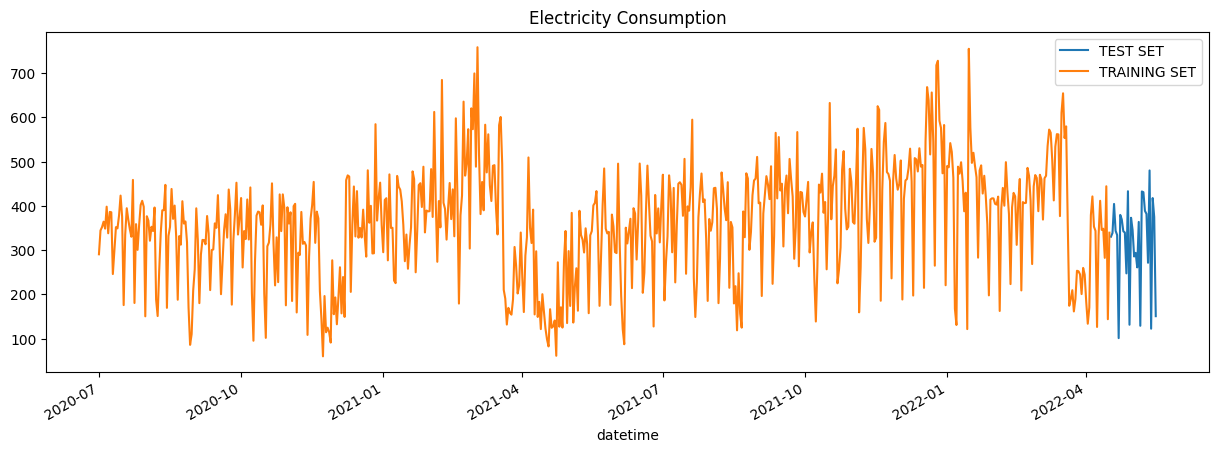

In [ ]:
_ = df_test[["difference"]]\
    .rename(columns={'difference': 'TEST SET'}) \
    .join(df_train[["difference"]].rename(columns={'difference': 'TRAINING SET'}), how='outer')\
    .plot(figsize=(15,5), title='Electricity Consumption')

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    
    X = df[['dayofweek','quarter','month','year',
            # 'hour',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
X_train, y_train = create_features(df_train, label="difference");
X_test, y_test = create_features(df_test, label="difference");

In [ ]:
X_train.drop(columns=['year'], inplace=True)
X_test.drop(columns=['year'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Statistical Methods

### Autoregression (AR)

The method is suitable for univariate time series without trend and seasonal components.

In [ ]:
# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))

## XGBoost

Normalisation is not needed for XGBoost.

Reason:

Decision Trees do not require normalization of their inputs; and since XGBoost is essentially en ensemble algorithm comprised of Decision Trees, it does not require normalization for the inputs either.

In [ ]:
reg = XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

output = reg.predict(X_test)

ValueError: ignored

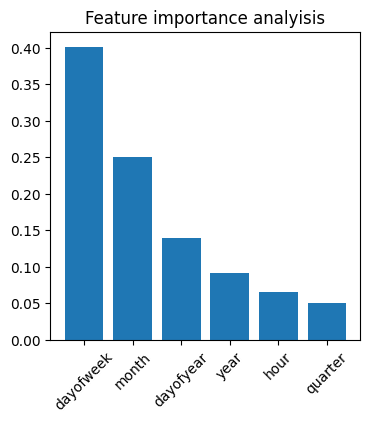

In [ ]:
features = ["dayofweek", 
            'hour',
            "quarter", "month", "year", 
            "dayofyear", "dayofmonth", "weekofyear"]

# Get feature importances from our random forest model
importances = reg.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[sorted_index_top]
plt.figure(figsize=(4, 4))
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
# Rotate tick labels to vertical
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

difference  tavg  tmin  tmax  prcp  snow   wdir   wspd    pres  \
datetime                                                                     
2020-07-01    290.7183  24.3  14.2  33.5   0.0     1  297.0   7.60  1006.0   
2020-07-02    344.4766  23.3  14.8  32.4   0.0     1  323.0   6.70  1008.6   
2020-07-03    352.0815  24.1  13.0  34.7   0.0     1  284.0   6.65  1010.5   
2020-07-04    364.3651  25.9  16.9  35.0   0.0     1  171.0   6.60  1009.4   
2020-07-05    348.6706  25.6  18.0  33.1   0.0     1  241.0   7.90  1006.6   
...                ...   ...   ...   ...   ...   ...    ...    ...     ...   
2022-05-12    480.0660  16.1   8.0  25.3   0.0     1  287.0   7.90  1016.0   
2022-05-13    122.6575  14.5   8.0  21.4   0.0     1  319.0   7.00  1017.6   
2022-05-14    417.7365  16.1   4.8  25.0   0.0     1  141.0   6.70  1020.3   
2022-05-15    374.8470  20.9   9.5  29.8   0.0     1   66.0   7.40  1018.1   
2022-05-16    150.9293  23.2  15.0  32.7   0.0     1  300.0  14.60  1012.9   

            isHoliday  
datetime               
2020-07-01        0.0  
2020-07-02        0.0  
2020-07-03        0.0  
2020-07-04        0.0  
2020-07-05        0.0  
...               ...  
2022-05-12        0.0  
2022-05-13        0.0  
2022-05-14        0.0  
2022-05-15        0.0  
2022-05-16        0.0  

[687 rows x 10 columns]

In [ ]:
# Predicted output will be in new colomn called diff predicted
df_test['diff_predicted'] = reg.predict(X_test)
# combining the 
diff_all = pd.concat([df_test, df_train], sort=False)

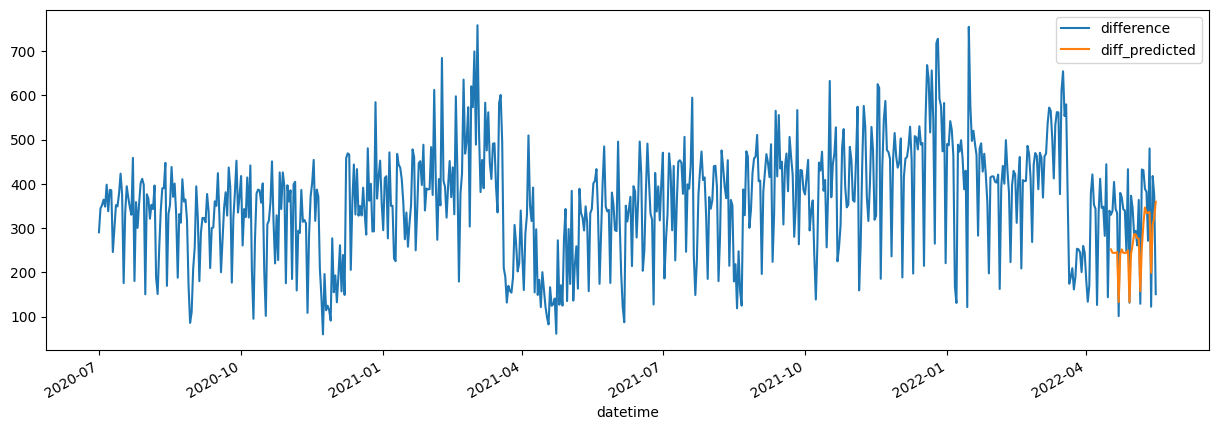

In [ ]:
_ = diff_all[['difference','diff_predicted']].plot(figsize=(15, 5))

In [ ]:
mae = mean_absolute_error(df_test["difference"], 
                          df_test["diff_predicted"])
mape = mean_absolute_percentage_error(df_test["difference"], 
                                      df_test["diff_predicted"])
mse = mean_squared_error(df_test["difference"], 
                         df_test["diff_predicted"])
r2 = r2_score(df_test["difference"], 
              df_test["diff_predicted"])
print("MAE of XGBoost model:", mae)
print("MAPE of XGBoost model:", mape)
print("MSE of XGBoost model:", mse)
print("R2 score of XGBoost model:", r2)
models_performance["XGBoost (simple)"] = [mae, mape, mse, r2]

MAE of XGBoost model: 86.29024737223253
MAPE of XGBoost model: 0.2830470115252729
MSE of XGBoost model: 10550.890762347215
R2 score of XGBoost model: -0.0365544207232642


### Introducing Lag Features

In [ ]:
def preprocess_data(df, lag_start=1, lag_end=365):
    '''
    Takes data and preprocesses for our model.
    
    :param lag_start default 1 : int
        Lag window start - 1 indicates one-day behind
    :param lag_end default 365 : int
        Lag window start - 365 indicates one-year behind
        
    Returns tuple : (data, target)
    '''
    # Default is add in lag of 365 days of data - ie make the model consider 365 days of prior data
    for i in range(lag_start,lag_end):
        df[f'lag_{i}'] = df['difference'].shift(periods=i)

    df.reset_index(inplace=True)

    # Split out attributes of timestamp - hopefully this lets the algorithm consider seasonality
    df['date_epoch'] = pd.to_numeric(df.datetime) # Easier for algorithm to consider consecutive integers, rather than timestamps
    # df['hour'] = df.datetime.hour
    df['dayofweek'] = df.datetime.dt.dayofweek
    df['dayofmonth'] = df.datetime.dt.day
    df['dayofyear'] = df.datetime.dt.dayofyear
    df['weekofyear'] = df.datetime.dt.weekofyear
    df['quarter'] = df.datetime.dt.quarter
    df['month'] = df.datetime.dt.month
    df['year'] = df.datetime.dt.year
    
    x = df.drop(columns=['datetime', 'difference']) # Don't need datetime column and the target
    y = df['difference'] # This is the target prediction
    
    return x, y

In [ ]:
df_train.head()

difference  tavg  tmin  tmax  prcp  snow   wdir  wspd    pres  \
datetime                                                                    
2020-07-01    290.7183  24.3  14.2  33.5   0.0     1  297.0  7.60  1006.0   
2020-07-02    344.4766  23.3  14.8  32.4   0.0     1  323.0  6.70  1008.6   
2020-07-03    352.0815  24.1  13.0  34.7   0.0     1  284.0  6.65  1010.5   
2020-07-04    364.3651  25.9  16.9  35.0   0.0     1  171.0  6.60  1009.4   
2020-07-05    348.6706  25.6  18.0  33.1   0.0     1  241.0  7.90  1006.6   

            isHoliday       date  dayofweek  quarter  month  year  dayofyear  \
datetime                                                                       
2020-07-01        0.0 2020-07-01          2        3      7  2020        183   
2020-07-02        0.0 2020-07-02          3        3      7  2020        184   
2020-07-03        0.0 2020-07-03          4        3      7  2020        185   
2020-07-04        0.0 2020-07-04          5        3      7  2020        186   
2020-07-05        0.0 2020-07-05          6        3      7  2020        187   

            dayofmonth  weekofyear  
datetime                            
2020-07-01           1          27  
2020-07-02           2          27  
2020-07-03           3          27  
2020-07-04           4          27  
2020-07-05           5          27

In [ ]:
# train-test split
split_date = '2022-04-16'
df_train = df.loc[df.index <= split_date].copy() 
df_test = df.loc[df.index > split_date].copy() 

train = df_train.copy() 
test = df_test.copy() 

X_train, y_train = preprocess_data(train, lag_end=4)
X_test, y_test = preprocess_data(test, lag_end=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



### XGBoost with Lags

In [ ]:
# We will try with 1000 trees and a maximum depth of each tree to be 5
# Early stop if the model hasn't improved in 100 rounds
model = XGBRegressor(
    max_depth=6 # Default - 6
    ,n_estimators=1000
    ,booster='gbtree'
    ,colsample_bytree=1 # Subsample ratio of columns when constructing each tree - default 1
    ,eta=0.3 # Learning Rate - default 0.3
    ,importance_type='weight' # Default is gain
)
model.fit(
    X_train
    ,y_train
    ,eval_set=[(X_train, y_train)]
    ,eval_metric='mae'
    ,verbose=True
    ,early_stopping_rounds=100 # Stop after 100 rounds if it doesn't after 100 times
)

[08:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:324.583
Will train until validation_0-mae hasn't improved in 100 rounds.
[1]	validation_0-mae:292.965
[2]	validation_0-mae:264.465
[3]	validation_0-mae:238.691
[4]	validation_0-mae:215.569
[5]	validation_0-mae:194.73
[6]	validation_0-mae:175.886
[7]	validation_0-mae:158.93
[8]	validation_0-mae:143.86
[9]	validation_0-mae:130.17
[10]	validation_0-mae:117.951
[11]	validation_0-mae:107.037
[12]	validation_0-mae:97.0708
[13]	validation_0-mae:88.5087
[14]	validation_0-mae:80.9137
[15]	validation_0-mae:74.1543
[16]	validation_0-mae:68.2464
[17]	validation_0-mae:63.0555
[18]	validation_0-mae:58.6513
[19]	validation_0-mae:54.7141
[20]	validation_0-mae:51.3697
[21]	validation_0-mae:48.3905
[22]	validation_0-mae:45.9128
[23]	validation_0-mae:43.603
[24]	validation_0-mae:41.921
[25]	validation_0-mae:40.3357
[26]	validation_0-mae:38.868
[27]	validation

XGBRegressor(eta=0.3, importance_type='weight', max_depth=6, n_estimators=1000)

In [ ]:
df_test["2"] = 1

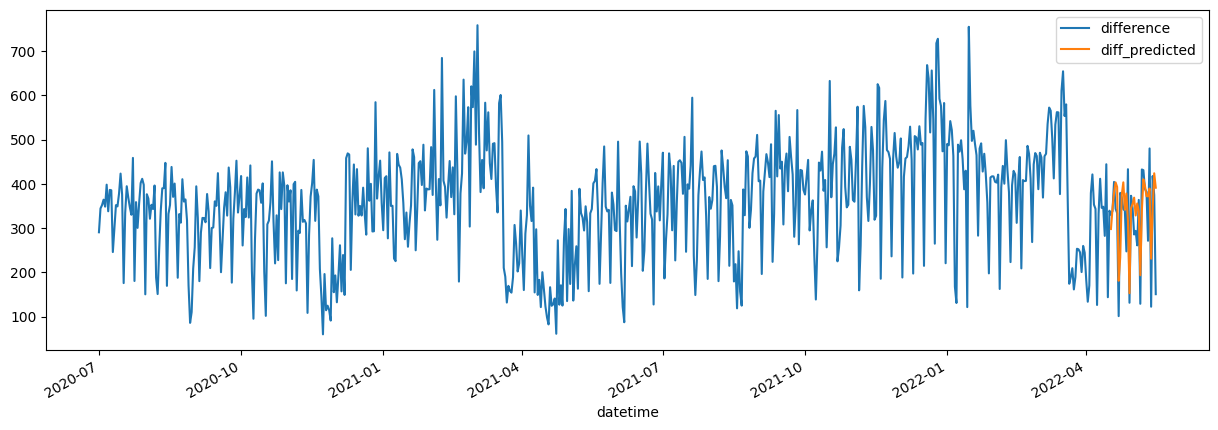

In [ ]:
# Predicted output will be in new colomn called diff predicted
df_test['diff_predicted'] = model.predict(X_test)
# combining the 
diff_all = pd.concat([df_test, df_train], sort=False)

_ = diff_all[['difference','diff_predicted']].plot(figsize=(15, 5))

In [ ]:
mae = mean_absolute_error(df_test["difference"], 
                          df_test["diff_predicted"])
mape = mean_absolute_percentage_error(df_test["difference"], 
                                      df_test["diff_predicted"])
mse = mean_squared_error(df_test["difference"], 
                         df_test["diff_predicted"])
r2 = r2_score(df_test["difference"], 
              df_test["diff_predicted"])
print("MAE of XGBoost model:", mae)
print("MAPE of XGBoost model:", mape)
print("MSE of XGBoost model:", mse)
print("R2 score of XGBoost model:", r2)

models_performance["XGBoost (with lags)"] = [mae, mape, mse, r2]

MAE of XGBoost model: 62.5621030957032
MAPE of XGBoost model: 0.26489284342899416
MSE of XGBoost model: 6636.023397575614
R2 score of XGBoost model: 0.3480551032404242


Without weather and calendar data:
```
MAE of XGBoost model: 64.46500039998412
MAPE of XGBoost model: 0.23458438226074776
MSE of XGBoost model: 7494.9971495332
R2 score of XGBoost model: 0.2636666795582888
```

## Neural Networks (RNN and LSTM)

#### Feature Scaling

Unlike Tree-based ensemble algorithms like above, neural networks work best when the data they're learning from have proper scales, hence feature scaling becomes an important part of preprocessing data before feeding them into nn.

In [ ]:
mm = MinMaxScaler()

df_normalized = pd.DataFrame(mm.fit_transform(df.values),
                                  index = df.index,
                             columns=df.columns
                             )

# train-test split
# split_date = '2021-07-31'
# df_train = df_normalized.loc[df_normalized.index <= split_date].copy() 
# df_test = df_normalized.loc[df_normalized.index > split_date].copy() 

# train = df_train.copy() 
# test = df_test.copy() 

# X_train, y_train = preprocess_data(train, lag_end=4)
# X_test, y_test = preprocess_data(test, lag_end=4)

For Both RNN and LSTM, we need to reshape input to be 3D `[samples, timesteps, features]`

In [ ]:
def load_data(data, seq_len, threshold = .8):
    X_train = []
    y_train = []
    for i in range(seq_len, len(data)-5):
        X_train.append(data.iloc[i-seq_len : i, 0])
        y_train.append(data.iloc[i+5, 0])

    #1 last 6189 days are going to be used in test
    X_test = X_train[math.floor(threshold * len(data)):]             
    y_test = y_train[math.floor(threshold * len(data)):]
    
    #2 first 110000 days are going to be used in training
    X_train = X_train[:math.floor(threshold * len(data))]           
    y_train = y_train[:math.floor(threshold * len(data))]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    X_train = np.reshape(X_train,
                         (math.floor(threshold * len(data)), seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [ ]:
# Create train, test data
seq_len = 6 # Choose sequence length

X_train, y_train, X_test, y_test = load_data(df_normalized, 
                                             seq_len, 
                                             threshold=1-0.06)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (645, 6, 1)
y_train.shape =  (645,)
X_test.shape =  (31, 6, 1)
y_test.shape =  (31,)


### RNN

In [ ]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn_model.add(Dropout(0.35))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.35))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.35))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 6, 40)             1680      
                                                                 
 dropout_3 (Dropout)         (None, 6, 40)             0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 6, 40)             3240      
                                                                 
 dropout_4 (Dropout)         (None, 6, 40)             0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

$$ 1\le\#\text{batch}\le m $$

In [ ]:
rnn_model.compile(optimizer="adam",loss="MAE")
history= rnn_model.fit(X_train, y_train, 
                       epochs=17, validation_data=(X_test, y_test.reshape(-1,1)), 
                       batch_size=1000)

Epoch 1/17
1/1 [==============================] - 3s 3s/step - loss: 0.5910 - val_loss: 0.3718
Epoch 2/17
1/1 [==============================] - 0s 53ms/step - loss: 0.5894 - val_loss: 0.4317
Epoch 3/17
1/1 [==============================] - 0s 67ms/step - loss: 0.6026 - val_loss: 0.2923
Epoch 4/17
1/1 [==============================] - 0s 53ms/step - loss: 0.5345 - val_loss: 0.1848
Epoch 5/17
1/1 [==============================] - 0s 52ms/step - loss: 0.5217 - val_loss: 0.2028
Epoch 6/17
1/1 [==============================] - 0s 52ms/step - loss: 0.5401 - val_loss: 0.2317
Epoch 7/17
1/1 [==============================] - 0s 54ms/step - loss: 0.5317 - val_loss: 0.2152
Epoch 8/17
1/1 [==============================] - 0s 50ms/step - loss: 0.4929 - val_loss: 0.1813
Epoch 9/17
1/1 [==============================] - 0s 51ms/step - loss: 0.4888 - val_loss: 0.1618
Epoch 10/17
1/1 [==============================] - 0s 50ms/step - loss: 0.4695 - val_loss: 0.1842
Epoch 11/17
1/1 [==============

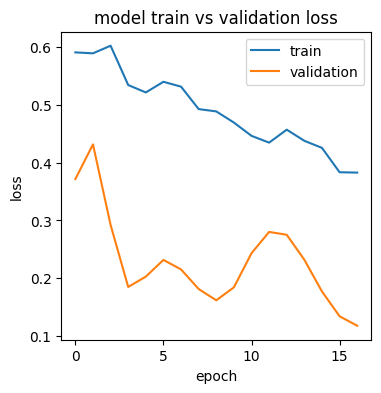

In [ ]:
# plot train and validation loss
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
rnn_preds = rnn_model.predict(X_test)

mae = mean_absolute_error(y_test, 
                          rnn_preds)
mape = mean_absolute_percentage_error(y_test, 
                                      rnn_preds)
mse = mean_squared_error(y_test, 
                         rnn_preds)
r2 = r2_score(y_test, 
              rnn_preds)
print("MAE of RNN model:", mae)
print("MAPE of RNN model:", mape)
print("MSE of RNN model:", mse)
print("R2 score of RNN model:", r2)

models_performance["Simple RNN"] = [mae, mape, mse, r2]

MAE of RNN model: 0.11776688041883793
MAPE of RNN model: 0.6664962169006822
MSE of RNN model: 0.02256568885586163
R2 score of RNN model: -0.1151519321200003


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



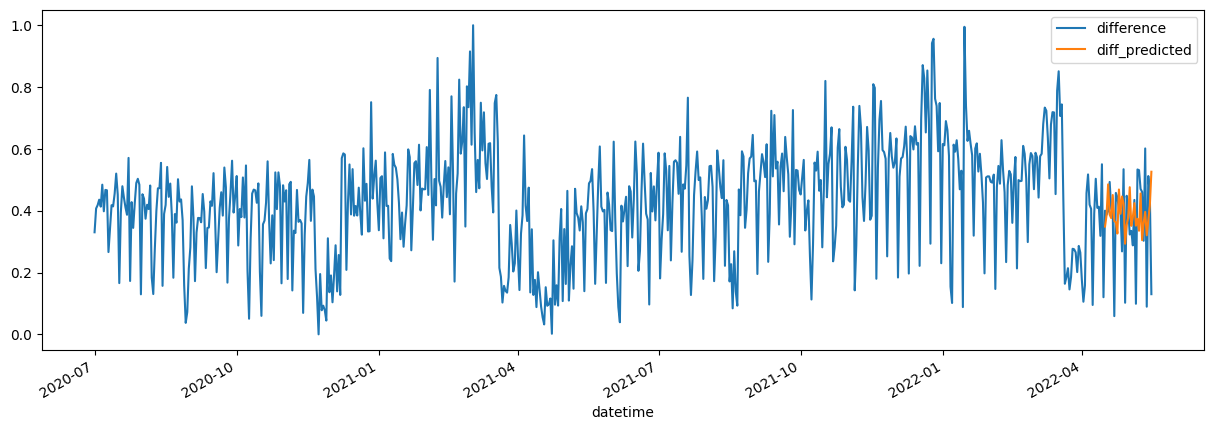

In [ ]:
plt.style.use('default')

df_train, df_test = df_normalized[:-y_test.shape[0]],\
df_normalized[-y_test.shape[0]:]

# Predicted output will be in new colomn called diff predicted
df_test['diff_predicted'] = rnn_preds
# combining the 
diff_all = pd.concat([df_test, df_train], sort=False)

_ = diff_all[['difference','diff_predicted']].plot(figsize=(15, 5))

### LSTM

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="relu",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.35))

lstm_model.add(LSTM(40,activation="relu",return_sequences=True))
lstm_model.add(Dropout(0.35))

lstm_model.add(LSTM(40,activation="relu",return_sequences=False))
lstm_model.add(Dropout(0.35))

lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 40)             6720      
                                                                 
 dropout_6 (Dropout)         (None, 6, 40)             0         
                                                                 
 lstm_1 (LSTM)               (None, 6, 40)             12960     
                                                                 
 dropout_7 (Dropout)         (None, 6, 40)             0         
                                                                 
 lstm_2 (LSTM)               (None, 40)                12960     
                                                                 
 dropout_8 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
lstm_model.compile(optimizer="adam", loss="MAE")
history_lstm = lstm_model.fit(X_train, y_train, 
                              epochs=28, validation_data=(X_test, y_test),
                              batch_size=1000)

Epoch 1/28
1/1 [==============================] - 4s 4s/step - loss: 0.4312 - val_loss: 0.3676
Epoch 2/28
1/1 [==============================] - 0s 93ms/step - loss: 0.4251 - val_loss: 0.3624
Epoch 3/28
1/1 [==============================] - 0s 91ms/step - loss: 0.4198 - val_loss: 0.3575
Epoch 4/28
1/1 [==============================] - 0s 89ms/step - loss: 0.4143 - val_loss: 0.3522
Epoch 5/28
1/1 [==============================] - 0s 108ms/step - loss: 0.4090 - val_loss: 0.3464
Epoch 6/28
1/1 [==============================] - 0s 92ms/step - loss: 0.4028 - val_loss: 0.3401
Epoch 7/28
1/1 [==============================] - 0s 90ms/step - loss: 0.3962 - val_loss: 0.3334
Epoch 8/28
1/1 [==============================] - 0s 93ms/step - loss: 0.3895 - val_loss: 0.3262
Epoch 9/28
1/1 [==============================] - 0s 97ms/step - loss: 0.3818 - val_loss: 0.3185
Epoch 10/28
1/1 [==============================] - 0s 98ms/step - loss: 0.3746 - val_loss: 0.3107
Epoch 11/28
1/1 [=============

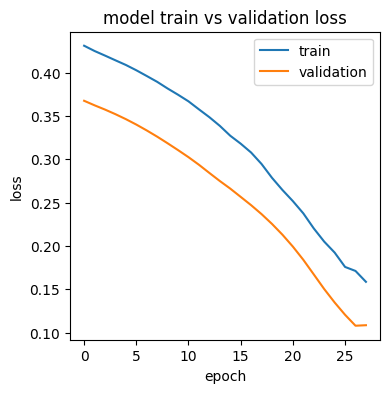

In [ ]:
# plot train and validation loss
plt.figure(figsize=(4,4))
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
lstm_preds = lstm_model.predict(X_test)

mae = mean_absolute_error(y_test, 
                          lstm_preds)
mape = mean_absolute_percentage_error(y_test, 
                                      lstm_preds)
mse = mean_squared_error(y_test, 
                         lstm_preds)
r2 = r2_score(y_test, 
              lstm_preds)
print("MAE of LSTM model:", mae)
print("MAPE of LSTM model:", mape)
print("MSE of LSTM model:", mse)
print("R2 score of LSTM model:", r2)

models_performance["LSTM"] = [mae, mape, mse, r2]

MAE of LSTM model: 0.10850627386651099
MAPE of LSTM model: 0.748309108855426
MSE of LSTM model: 0.02362642527861252
R2 score of LSTM model: -0.16757143851558953


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



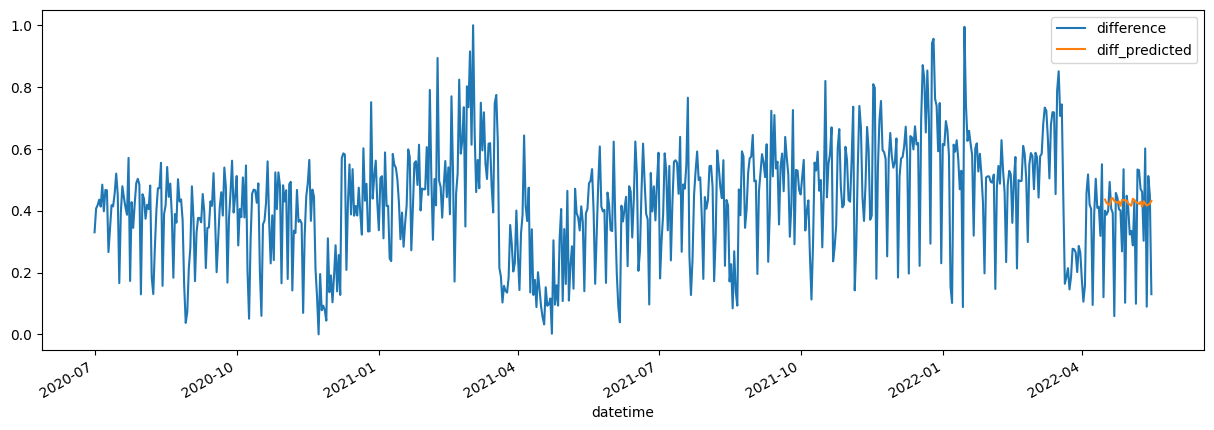

In [ ]:
df_train, df_test = df_normalized[:-y_test.shape[0]],\
df_normalized[-y_test.shape[0]:]

# Predicted output will be in new colomn called diff predicted
df_test['diff_predicted'] = lstm_preds
# combining the 
diff_all = pd.concat([df_test, df_train], sort=False)

_ = diff_all[['difference','diff_predicted']].plot(figsize=(15, 5))

### CNN-LSTM

This one is particularly useful for hourly data, since there's more noise in there:

## GNB

# Model Evaluation

$$\text{MAPE}=\frac{1}{m}Σ_{i = 0}^m\frac{|y_i - \hat{y}_i|}{y_i}$$

In [ ]:
models_names = models_performance.keys()

In [ ]:
models_performance["XGBoost (simple)"] = [mae, mape, mse, r2]

html_table='''
<table border="1" class="center">
    <thead>
        <tr >
            <th rowspan="2"></th>
            <th colspan="4">Performance</th>
        </tr>
        <tr>
            <th>MAE</th>
            <th>MAPE</th>
            <th>MSE</th>
            <th>R^2 Score</th>
        </tr>
    </thead>
    <tbody>
        '''

for key in models_names:
  if key == "order":
    continue
  else:
    html_table+=f'''<tr>
            <th>{key}</th>
            <td>{models_performance[key][0]:.2f} </td>
            <td>{models_performance[key][1]:.2f} </td>
            <td>{models_performance[key][2]:.2f} </td>
            <td>{models_performance[key][3]:.2f} </td>
        </tr>'''

html_table +='''        
    </tbody>
</table>
'''

display(HTML(html_table))

In [ ]:
models_performance["XGBoost (simple)"]

[0.10850627386651099,
 0.748309108855426,
 0.02362642527861252,
 -0.16757143851558953]

# References

- These documents hosted on Medium by [Marco Peixeiro](https://ca.linkedin.com/in/marco-peixeiro) provide useful basic information on understanding classical time series analysis, with the following order:
    - [How to Model Time Series in Python](https://towardsdatascience.com/how-to-model-time-series-in-python-9983ebbf82cf)
    - [Time Series Forecasting with Autoregressive Processes](https://towardsdatascience.com/time-series-forecasting-with-autoregressive-processes-ba629717401)
    - [Defining the Moving Average Model for Time Series Forecasting in Python](https://towardsdatascience.com/defining-the-moving-average-model-for-time-series-forecasting-in-python-626781db2502)
    - [Advanced Time Series Analysis with ARMA and ARIMA](https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d)
    - [Time Series Forecasting with SARIMA in Python](https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b)
    - [The Complete Guide to Time Series Analysis and Forecasting](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775)

- To learn about time grouping like what we did above check out [this](https://towardsdatascience.com/how-to-group-data-by-different-time-intervals-using-python-pandas-eb7134f9b9b0) useful link also posted on Medium.

- A Quick [Cheat Sheet](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/) of classical methods

# 

`Chromedriver` is needed to be included in the path of glory!